In [2]:
from scipy import sparse
import numpy as np
import itertools
import copy

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from scipy.stats import gaussian_kde
from tqdm import tqdm_notebook
from seaborn import kdeplot

import sys
sys.path.append("..")
import utils

from statsmodels.distributions import ECDF

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [3]:
train, test, fps = utils.load_time_split(year=2015, return_fingerprints=True)

##The following is to calculate AVE bias:
def fast_jaccard(X, Y=None):
    """credit: https://stackoverflow.com/questions/32805916/compute-jaccard-distances-on-sparse-matrix"""
    if isinstance(X, np.ndarray):
        X = sparse.csr_matrix(X)
    if Y is None:
        Y = X
    else:
        if isinstance(Y, np.ndarray):
            Y = sparse.csr_matrix(Y)
    assert X.shape[1] == Y.shape[1]

    X = X.astype(bool).astype(int)
    Y = Y.astype(bool).astype(int)
    intersect = X.dot(Y.T)
    x_sum = X.sum(axis=1).A1
    y_sum = Y.sum(axis=1).A1
    xx, yy = np.meshgrid(x_sum, y_sum)
    union = ((xx + yy).T - intersect)
    return (1 - intersect / union).A



In [4]:
from scipy.stats.mstats import rankdata

In [5]:
row_idx, col_idx = test.nonzero()
nnranks = list()

idx_list = list()
for c in range(train.shape[1]):
    positives =train[:,c].nonzero()[0]
    idx_list.append(positives)

In [6]:
row = 743
col = 102

In [13]:
test_ligand = fps[row]
all_distances =fast_jaccard(test_ligand, fps)[0]
closest_distances = list()
for idx in idx_list:
    closest_distance = all_distances[idx].min()
    closest_distances.append(closest_distance)

In [30]:
(np.argsort(all_distances)==248782).nonzero()[0]

# array([134772,    743,  93929,   1604, 246382,    765,    659,    474,
#          1253, 134727,    884,    954, 280467, 280517, 280466])

array([19])

In [22]:
train[134772].nonzero()[1]

array([146], dtype=int32)

In [23]:
train[743].nonzero()[1]

array([146], dtype=int32)

In [27]:
all_distances[idx_list[95]].argmin()

3265

In [28]:
idx_list[95][3265]

248782

In [16]:
np.argsort(closest_distances)

array([146, 172,  95, 102, 100, 103,  82,  90, 174, 105,  97,   2, 130,
       213, 116,  50, 211, 115, 135, 227,  66,  68,  75, 119,  86, 143,
       160, 173, 106, 201,  98,  76,  80, 124,  45, 196,   9,  84, 208,
        78, 195, 203, 109,  10,  55,  85,   0, 150,  58,  40,  71,  91,
        93, 112, 164,  18,  94,  38, 149, 132,  21, 218, 142, 107,  96,
       214, 207, 138, 233,   7, 225, 219,  46, 181, 190, 156, 171, 186,
        92,  51, 210,  88, 192,   4, 131, 139, 108, 220, 169, 141, 111,
       170, 180, 231,   3, 151,  13, 179, 162,  35, 226,  56, 238, 228,
       126,  41,  48, 202, 224,  79, 128, 205, 239,  53,  73, 155, 187,
        16, 158, 217, 167, 194, 159,  43, 154,   6,  72, 215,  70,  11,
       221,  81,  29, 234, 229, 209, 206,  61,  54, 232,  99, 104,  12,
       152, 148, 163, 216,  19, 137, 147,  36, 178, 123,  31, 204,  17,
        67,  39, 117,   1,  15, 125,  49, 199, 145,  74, 185, 110, 241,
       122, 182,  24,  89, 189, 222, 176, 157, 236, 140,  83, 11

In [18]:
(train[row]==1).nonzero()[1]

array([146], dtype=int32)

In [9]:
closest_distances = np.ma.masked_array(closest_distances, mask=(train[row]==1).toarray()[0])


In [12]:
rankdata(closest_distances)[col]

2.5

In [1]:

    

for row, col, ran in tqdm.tqdm_notebook(zip(row_idx, col_idx, ranks), total=len(ranks)):
    
    test_ligand = fps[row]
    all_distances =fast_jaccard(test_ligand, fps)[0]
    closest_distances = list()
    for idx in idx_list:
        closest_distance = all_distances[idx].min()
        closest_distances.append(closest_distance)
    
    #mask the targets that are known positives so we only calculate rank amongst unknown. 
    closest_distances = np.ma.masked_array(closest_distances, mask=(train[row]==1).toarray()[0])
    
    prediction_ranks = rankdata(closest_distances)
    
    rank = prediction_ranks[col]
    nnranks.append(rank)
    print(rank, ran)
#     curr_rank =0
#     observed_labels = []
#     for r in all_distances_sorted:
#         labels = train[r].nonzero()[1]
#         unseen_labels = labels[~np.isin(labels, observed_labels)]
#         if len(unseen_labels)>0:
#             observed_labels+=list(unseen_labels)
#             curr_rank+=len(unseen_labels)
#         if col in observed_labels:
#             print(curr_rank, ran)
#             nnranks.append(curr_rank)
#             break
            
    #train_ligands = fps[train[:,col].nonzero()[0]]
    #distances = fast_jaccard(test_ligand, train_ligands)[0]
    #distances_list.append(distances[np.argpartition(distances, range(10))[:10]])
    #print(row, col)
                            

NameError: name 'test' is not defined

In [4]:
#nnranks = np.array(nnranks)
nnranks = np.load('nnranks.npy')

Text(0, 0.5, 'Warp rankings')

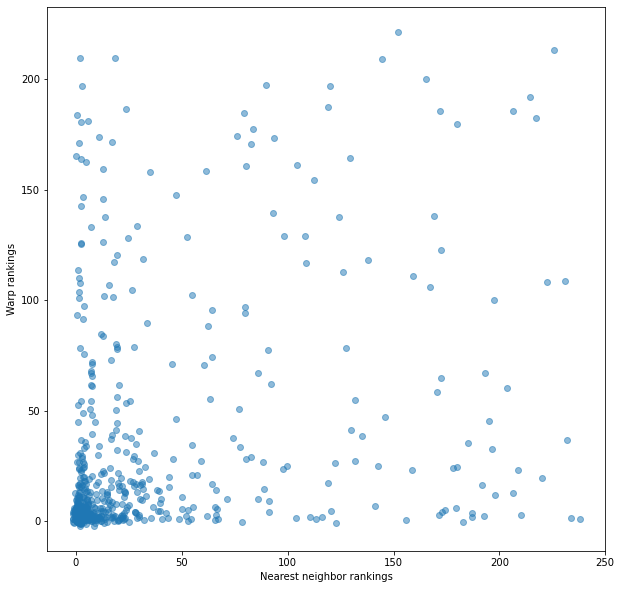

In [30]:
ranks = np.load('./processed_data/2015_hpo_lightfm_warp.npy')
#ranks = np.load('./processed_data/2015_label_correlation.npy')
#ranks = np.load('./processed_data/2015_hpo_implicit_bpr.npy')
plt.figure(figsize=(10,10))
plt.scatter(np.array(nnranks)+np.random.randn(len(nnranks)), 
            np.array(ranks)+np.random.randn(len(nnranks)), 
            alpha=0.5)

plt.xlabel('Nearest neighbor rankings')
plt.ylabel('Warp rankings')

#plt.xlim(0, 250)
#plt.ylim(0, 250)
# plt.plot([-6,6],[-6,6])
#plt.yscale('log')
#plt.xscale('log')

In [31]:
(ranks<nnranks).sum()

324

In [32]:
(ranks>nnranks).sum()

334

Text(0, 0.5, 'Label correlation ranks')

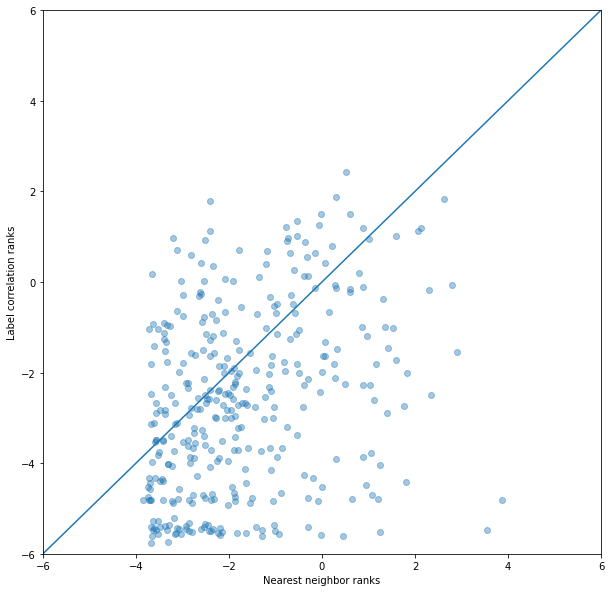

In [34]:
from scipy.special import logit 
mask = nnranks>5


plt.figure(figsize=(10,10))
jitter = 0.09
plt.scatter(logit(nnranks/243)[mask]+np.random.randn(len(nnranks[mask]))*jitter, 
            logit(ranks[:len(nnranks)]/243)[mask]+np.random.randn(len(nnranks[mask]))*jitter,
           alpha=0.4)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.plot([-6,6],[-6,6])
plt.xlabel('Nearest neighbor ranks')
plt.ylabel('Label correlation ranks')


In [ ]:
# def fold(arr):
#     folded_arr = arr[:,:int(arr.shape[1]/2)] + arr[:,int(arr.shape[1]/2):]
#     return folded_arr
# folded_arr = fold(fps)
# folded_arr = fold(folded_arr)
# folded_arr = fold(folded_arr)

In [408]:
import lightfm
name ='hpo_lightfm_warp'
params = utils.read_params(name)
cid, tid = utils.get_lightfm_indexing(train)

#first iteration:
model = lightfm.LightFM(no_components = params['no_components'],
                           loss='warp',
                           max_sampled=params['max_sampled'],
                           learning_rate=params['learning_rate'])
print('fitting')
model.fit(train, 
          user_features=fps,
          epochs=params['epochs'])
print('predicting',)
pred_matrix2 = np.reshape(
        model.predict(np.repeat(cid, len(tid)), 
                            np.tile(tid, len(cid)),
                           user_features=fps),
                              (len(cid), len(tid)))

# for i in range(6):
#     model = lightfm.LightFM(no_components = params['no_components'],
#                            loss='warp',
#                            max_sampled=params['max_sampled'],
#                            learning_rate=params['learning_rate'])
#     print('fitting', i)
#     model.fit(train, 
#           user_features=folded_arr,
#           epochs=params['epochs'])
#     print('predicting', i)
#     pred_matrix2 += np.reshape(
#         model.predict(np.repeat(cid, len(tid)), 
#                             np.tile(tid, len(cid)),
#                            user_features=folded_arr),
#                               (len(cid), len(tid)))

fitting
predicting


In [410]:
wbr = utils.evaluate_predictions(pred_matrix2, test, train)

In [390]:
# def fold(arr):
#     folded_arr = arr[:,:int(arr.shape[1]/2)] + arr[:,int(arr.shape[1]/2):]
#     return folded_arr
# folded_arr = fold(fps)
# folded_arr = fold(folded_arr)
# folded_arr = fold(folded_arr)

In [373]:
import pymc3 as pm
def calc_hpd(ranks, statistic=np.mean):
    with pm.Model() as model:
        #prior on statistic of interest:
        a = pm.Normal('a', mu=statistic(ranks), sigma=10.0)
        #'nuisance' parameter:
        b = pm.HalfNormal('b', sigma=10.0)
        #likelihood:
        if statistic==np.mean:
            y = pm.Normal('y', mu=a, sigma=b, observed=ranks)
        elif statistic==np.median:
            y = pm.Laplace('y', mu=a, b=b,observed=ranks)
        trace = pm.sample(draws=500, tune=500, chains=2, target_accept=0.9)

    return trace

In [461]:
mean_dict = dict()

mask = nnranks>0

ranks = np.load('./processed_data/2015_hpo_lightfm_warp.npy')
logit_transformed_ranks = logit(ranks/243)[mask]
mean_dict['warp']=calc_hpd(logit_transformed_ranks)

ranks = np.load('./processed_data/2015_label_correlation.npy')
logit_transformed_ranks = logit(ranks/243)[mask]
mean_dict['labcorr']=calc_hpd(logit_transformed_ranks)

logit_transformed_ranks = logit(nnranks/243)[mask]
mean_dict['nn']=calc_hpd(logit_transformed_ranks)

logit_transformed_ranks = logit(wbr/243)
mean_dict['wbr']=calc_hpd(logit_transformed_ranks)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 9 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.


In [462]:
median_dict = dict()

ranks = np.load('./processed_data/2015_hpo_lightfm_warp.npy')
logit_transformed_ranks = logit(ranks[mask]/243)
median_dict['warp']= calc_hpd(logit_transformed_ranks, np.median)

ranks = np.load('./processed_data/2015_label_correlation.npy')
logit_transformed_ranks = logit(ranks/243)[mask]
median_dict['labcorr']= calc_hpd(logit_transformed_ranks, np.median)

logit_transformed_ranks = logit(nnranks/243)[mask]
median_dict['nn']= calc_hpd(logit_transformed_ranks, np.median)

logit_transformed_ranks = logit(wbr/243)[mask]
median_dict['wbr']= calc_hpd(logit_transformed_ranks, np.median)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.


In [469]:
for key in mean_dict.keys():
    print(key, expit(mean_dict[key]['a'].mean())*243, expit(pm.hpd(mean_dict[key]['a']))*243)

warp 7.796118312879116 [6.82602165 8.78093502]
labcorr 6.174300033605962 [5.45189152 6.92645616]
nn 7.657848044550785 [6.72624834 8.75122756]
wbr 8.217405751755816 [7.2008576  9.27642446]


In [470]:
for key in median_dict.keys():
    print(key, expit(median_dict[key]['a'].mean())*243, expit(pm.hpd(median_dict[key]['a']))*243)

warp 4.87442486553095 [4.422152   5.18787686]
labcorr 3.6512106352888374 [3.05942025 4.11671993]
nn 4.314433756811486 [3.67258954 5.15162192]
wbr 5.2675880353254385 [4.79793967 6.05419266]


In [493]:
nnranks[np.isinf(logit(nnranks/243) / logit(ranks/243))]

array([130.5])

In [494]:
ranks[np.isinf(logit(nnranks/243) / logit(ranks/243))]

array([121.5])

In [496]:
logit(130.5/243)

0.1484200051182734

In [497]:
logit(121.5/243)

0.0

In [498]:
ranks = np.load('./processed_data/2015_label_correlation.npy')

b = calc_hpd( logit(nnranks/243) - logit(ranks/243) )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.


In [502]:
expit(pm.hpd(b['a']))

array([0.52088074, 0.58731258])

In [448]:
np.exp(pm.hpd(b['a']))

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)


array([0.74590933, 0.9562644 ])

<AxesSubplot:>

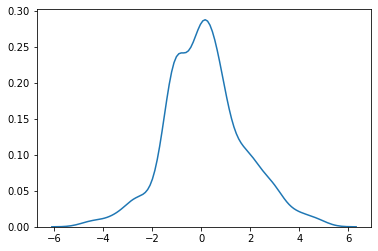

In [472]:
#plt.plot(nnranks / ranks)
#plt.yscale('log')
kdeplot(np.log(nnranks/ranks))


(0.0, 50.0)

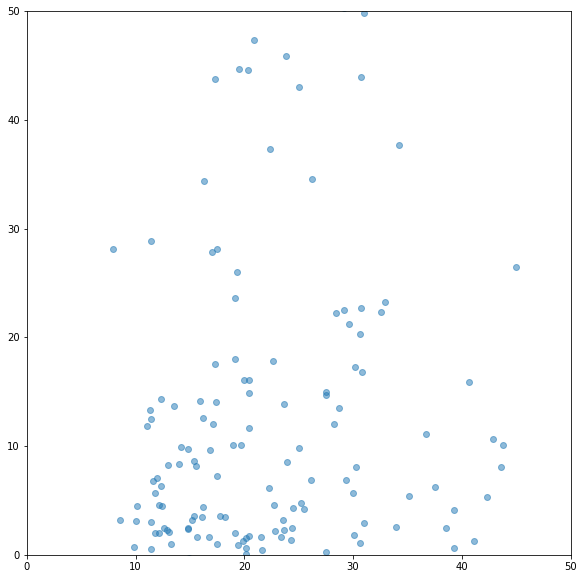

In [451]:
#ranks = np.load('./processed_data/2015_hpo_lightfm_warp.npy')
ranks = np.load('./processed_data/2015_label_correlation.npy')
#ranks = np.load('./processed_data/2015_hpo_implicit_bpr.npy')

mask = nnranks>10
x = nnranks[mask]
y = ranks[mask]

plt.figure(figsize=(10,10))
plt.scatter(x+np.random.randn(len(x)), 
            y+np.random.randn(len(y)), 
            alpha=0.5)

plt.axis('scaled')
plt.xlim(0, 50)
plt.ylim(0, 50)
# plt.plot([-6,6],[-6,6])

In [54]:
print(patks)

[0.4945652173913043, 0.375, 0.3163716814159292, 0.3034825870646766, 0.2826086956521739, 0.2747875354107649, 0.25688073394495414, 0.24605678233438485, 0.24496644295302014, 0.22491349480968859, 0.21908127208480566]


In [58]:
ranks = np.load('./processed_data/2015_hpo_lightfm_warp.npy')
ranks = np.load('./processed_data/2015_label_correlation.npy')

0 p at k: 0.4945652173913043
1 p at k: 0.375
2 p at k: 0.3163716814159292
3 p at k: 0.3034825870646766
4 p at k: 0.2826086956521739
5 p at k: 0.2747875354107649
6 p at k: 0.25688073394495414
7 p at k: 0.24605678233438485
8 p at k: 0.24496644295302014
9 p at k: 0.22491349480968859
10 p at k: 0.21908127208480566


(0.0, 20.0)

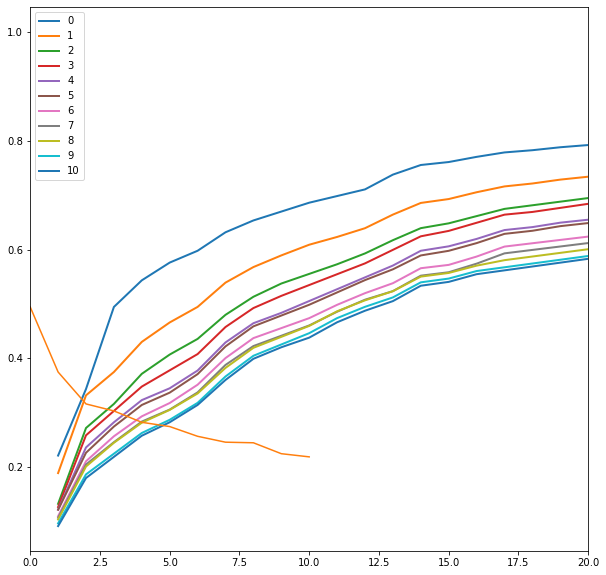

In [62]:
def plot_ecdf(ax, cutoff):
    ##Plot histogram:
    n, x = np.histogram(ranks[nnranks>cutoff], bins = np.linspace(1,243,243))
    

    ##Plot empirical cumulative distribution function
    ecdf = np.cumsum(n)/n.sum()
    ax.plot(x[:-1],ecdf, linewidth=2, label=cutoff)

    #ax.plot([0,3],[ecdf[2],ecdf[2]], linestyle=':',label=cutoff)
    print(cutoff, 'p at k:', ecdf[2])
    return ecdf[2]
    
fig, ax = plt.subplots(1)
fig.set_figwidth(10)   
fig.set_figheight(10)
patks = list()
for cutoff in [0,1,2,3,4,5,6,7,8,9,10]:
    patk = plot_ecdf(ax, cutoff)
    patks.append(patk)
    
ax.legend()
ax.plot([0,1,2,3,4,5,6,7,8,9,10],patks)
plt.xlim(0,20)

In [63]:
objs = [0,1,2,3,4,5,6,7,8,9,10]

totobjs = len(objs)
count = 0
for obj in objs:
    None
    count+=1
    print(count/totobjs)

0.09090909090909091
0.18181818181818182
0.2727272727272727
0.36363636363636365
0.45454545454545453
0.5454545454545454
0.6363636363636364
0.7272727272727273
0.8181818181818182
0.9090909090909091
1.0


0 p at k: 0.4782608695652174
1 p at k: 0.41535776614310643
2 p at k: 0.40289256198347106
3 p at k: 0.271505376344086
4 p at k: 0.24404761904761904
5 p at k: 0.22115384615384615
6 p at k: 0.2195945945945946
7 p at k: 0.22058823529411764
8 p at k: 0.2230769230769231
9 p at k: 0.21810699588477367
10 p at k: 0.21212121212121213


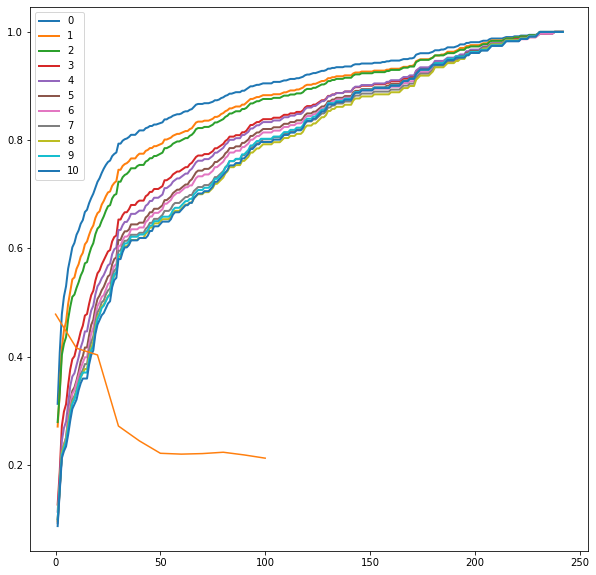

In [52]:
def plot_ecdf(ax, cutoff):
    ##Plot histogram:
    n, x = np.histogram(nnranks[ranks>cutoff], bins = np.linspace(1,243,243))
    

    ##Plot empirical cumulative distribution function
    ecdf = np.cumsum(n)/n.sum()
    ax.plot(x[:-1],ecdf, linewidth=2, label=cutoff)

    #ax.plot([0,3],[ecdf[2],ecdf[2]], linestyle=':',label=cutoff)
    print(cutoff, 'p at k:', ecdf[2])
    return ecdf[2]
    
fig, ax = plt.subplots(1)
fig.set_figwidth(10)   
fig.set_figheight(10)
patks = list()
for cutoff in [0,1,2,3,4,5,6,7,8,9,10]:
    patk = plot_ecdf(ax, cutoff)
    patks.append(patk)
ax.legend()
ax.plot([0,10,20,30,40,50,60,70,80,90,100],patks)

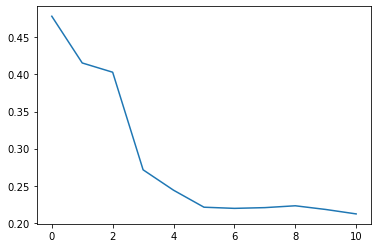

In [48]:
plt.plot(patks)

p at k: 0.4945652173913043


(0.0, 20.0)

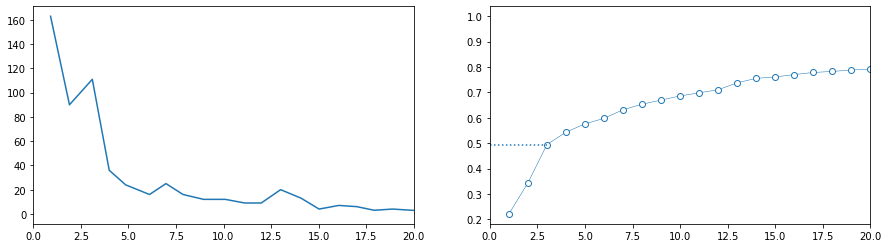

In [37]:
#ranks = np.load('./processed_data/2015_hpo_lightfm_warp.npy')
ranks = np.load('./processed_data/2015_label_correlation.npy')
#ranks = np.load('./processed_data/2015_hpo_implicit_bpr.npy')

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
##Plot histogram:
n, x = np.histogram(ranks[nnranks>0], bins = np.linspace(1,243,243))
ax[0].plot(x[:-1]+np.random.uniform(-0.15,0.15,len(n)),n,)

##Plot empirical cumulative distribution function
ecdf = np.cumsum(n)/n.sum()
ax[1].plot(x[:-1],ecdf, '-o', mfc='white', mew=1, linewidth=0.5)

ax[1].plot([0,3],[ecdf[2],ecdf[2]],c='C0', linestyle=':',label='Label correlation\nECDF at rank 5')
print('p at k:', ecdf[2])


# n, x = np.histogram(np.array(nnranks)[np.array(nnranks)>10], bins = np.linspace(1,243,243))
# ax[0].plot(x[:-1]+np.random.uniform(-0.15,0.15,len(n)),n,)

# ##Plot empirical cumulative distribution function
# ecdf = np.cumsum(n)/n.sum()
# ax[1].plot(x[:-1],ecdf, '-o', mfc='white', mew=1, linewidth=0.5)

# ax[1].plot([0,3],[ecdf[2],ecdf[2]],c='C0', linestyle=':',label='Label correlation\nECDF at rank 5')
# print('p at k:', ecdf[2])

ax[0].set_xlim(0,20)
ax[1].set_xlim(0,20)
# ax[0].grid()
# ax[1].grid()


In [284]:
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [208]:
ranks = utils.evaluate_predictions(output, test, train)

<AxesSubplot:>

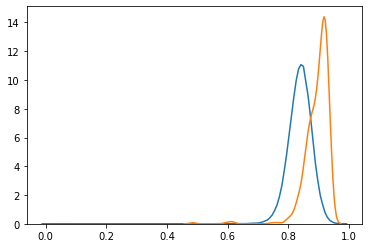

In [116]:
from scipy.spatial.distance import squareform
sample = np.random.choice(fps.shape[0], 500)
d = squareform(fast_jaccard(fps[sample]))
kdeplot(d)
kdeplot(distances)

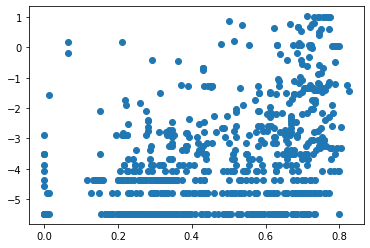

In [108]:
from scipy.special import logit
plt.scatter([i[0] for i in distances_list], logit(ranks/243))

In [96]:
distances[np.argpartition(distances, range(10))[:10]]

array([0.48598131, 0.59649123, 0.61206897, 0.616     , 0.74637681,
       0.76612903, 0.79527559, 0.79831933, 0.8       , 0.80487805])

In [95]:
distances.min()

0.485981308411215

In [88]:
fast_jaccard(test_ligand, test_ligand)

array([[0.]])

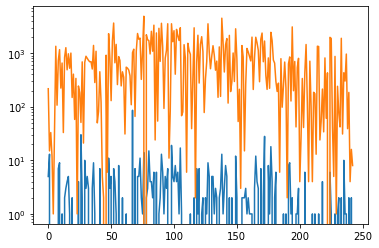

In [41]:
plt.plot(np.array(test.sum(0))[0])
plt.plot(train[(train.sum(1)>1)].sum(0))
plt.yscale('log')

In [50]:
np.array(test.sum(0))[0][train[(train.sum(1)>1)].sum(0)<50]

array([13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  2.,  0.])

In [49]:
np.array(test.sum(0)).sum()

736.0

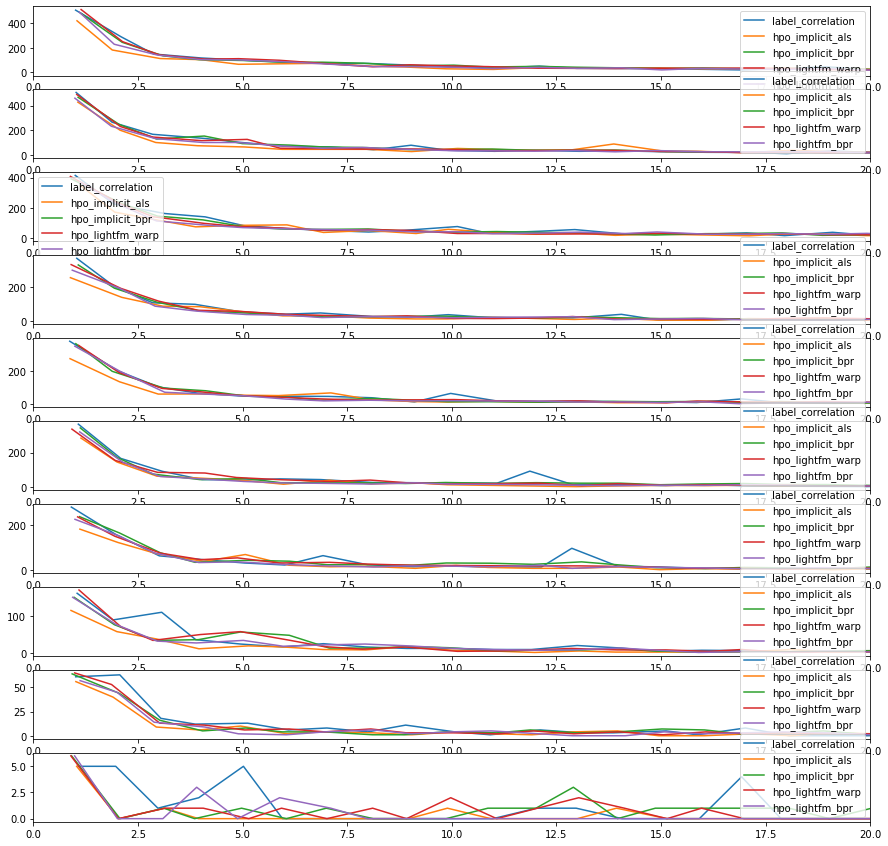

In [21]:
import numpy as np
from scipy.special import logit, expit
import matplotlib.pyplot as plt

yrs = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
num_targets = [225, 228, 231, 234, 237, 240, 242, 243, 243, 243]
filenames = ['label_correlation', 'hpo_implicit_als', 'hpo_implicit_bpr',
             'hpo_lightfm_warp', 'hpo_lightfm_bpr']
count = 0
fig, ax = plt.subplots(len(yrs), 1)
fig.set_figwidth(15)
fig.set_figheight(15)
for year, num in zip(yrs, num_targets):
    for name in filenames:
        ranks = np.load('./processed_data/'+str(year)+'_'+name+'.npy')
        n, x = np.histogram(ranks, bins = np.linspace(1,num,num))
        ax[count].plot(x[:-1]+np.random.uniform(-0.15,0.15,len(n)),n, label=name)
        #ax2.plot(x[:-1]+np.random.uniform(-0.15,0.15,len(n)),n,'-o', mfc='white', mew=1.5, label=name, linewidth=0.5)

        ##Plot empirical cumulative distribution function
        #ecdf = np.cumsum(n)/n.sum()
        #ax[count].plot(x[:-1]+np.random.uniform(-0.1,0.1,len(n)),ecdf, label=name)
        

        #logit_transformed_ranks = logit(ranks/num)
        #ax[count].hist(logit_transformed_ranks, bins=55)
    ax[count].set_xlim(0,20)
    ax[count].legend()
    count+=1
    

In [146]:
import sys
sys.path.append("..")
import utils 
train, test = utils.load_time_split(year=2015)

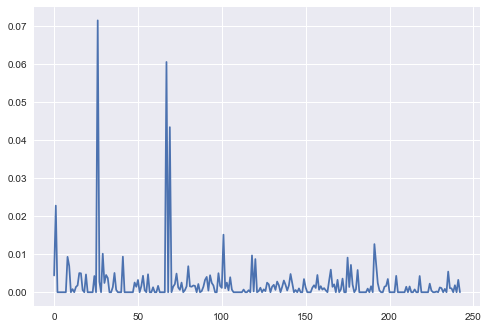

In [147]:
plt.plot(np.array(test.sum(0) / train.sum(0))[0])

In [134]:
train.sum(0)

matrix([[1133.,  570.,  668.,  475., 1801.,  638., 1552., 1377.,  751.,
         1305.,  821., 1244., 1354., 1457., 1660.,  794., 1005., 1746.,
         1043.,  427.,  711.,  879., 1282., 1241.,  937.,  754.,  419.,
          712.,  649.,  986., 1235., 1102.,  803.,  850.,  774., 2207.,
         1774., 1569., 1177.,  946.,  831.,  748.,  211., 1029.,  496.,
           53., 1381.,  702., 4309., 2094., 1550., 4156., 4420.,  923.,
         1928.,  937., 1692., 1131., 1293., 1540., 1504., 1672.,  598.,
          577.,  615.,  893., 1786., 1418., 1483.,  161., 1200., 3416.,
         2353., 2243., 1600., 1614., 5529.,  733., 3663., 1938., 2189.,
         2593., 2761., 1130., 3607., 1169., 2779.,  659., 3478., 1415.,
         4008., 1488., 2334., 1118., 1220., 3964., 1163.,  644., 3792.,
         3024., 3493.,  528., 3877., 2370., 1991., 4306., 1470.,  644.,
         1752.,  910.,  759., 4962., 1586., 1422., 1260., 2442., 3795.,
         1349.,  723., 4516.,  802., 1733., 3280., 1689., 2624.,

In [1]:
import numpy as np
from scipy.special import logit, expit
import matplotlib.pyplot as plt

yrs = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
num_targets = [225, 228, 231, 234, 237, 240, 242, 243, 243, 243]
filenames = ['label_correlation', 'hpo_implicit_als', 'hpo_implicit_bpr',
             'hpo_lightfm_warp', 'hpo_lightfm_bpr']

def calc_hpd(ranks, statistic=np.mean):
    with pm.Model() as model:
        #prior on statistic of interest:
        a = pm.Normal('a', mu=statistic(ranks), sigma=10.0)
        #'nuisance' parameter:
        b = pm.HalfNormal('b', sigma=10.0)
        #likelihood:
        if statistic==np.mean:
            y = pm.Normal('y', mu=a, sigma=b, observed=ranks)
        elif statistic==np.median:
            y = pm.Laplace('y', mu=a, b=b,observed=ranks)
        trace = pm.sample(draws=500, tune=500, chains=2, target_accept=0.9)

    return trace

In [2]:
import pymc3 as pm

In [3]:
trace_dict = dict()
for name in filenames:
    trace_dict[name]= list()
    for year, num in zip(yrs, num_targets):
        ranks = np.load('./processed_data/'+str(year)+'_'+name+'.npy')
        logit_transformed_ranks = logit(ranks/244)
        median_trace = calc_hpd(logit_transformed_ranks, np.median)
        trace_dict[name].append(median_trace)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 20 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 10 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 11 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 10 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 9 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 9 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 9 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 10 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 7 seconds.


In [29]:
plt.style.use('seaborn')

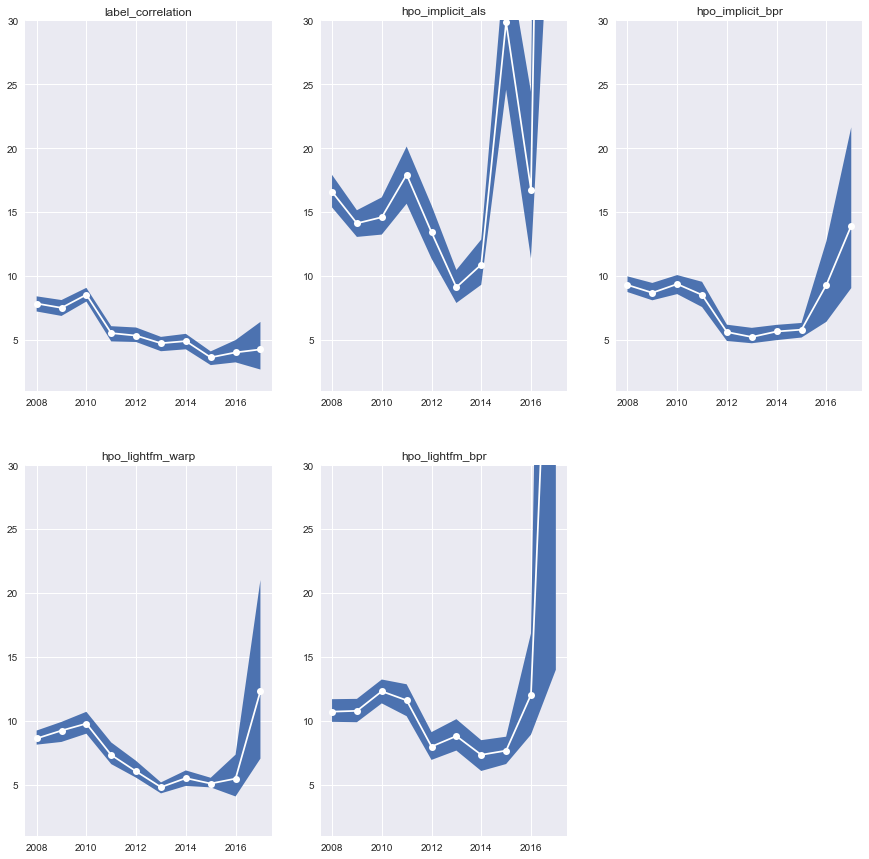

In [57]:
#fig, ax = plt.subplots(2, 3)

fig = plt.figure()
#fig.set_figheight(25)
#fig.set_figwidth(15)
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)


fig.set_figheight(15)
fig.set_figwidth(15)

#for name, a in zip(filenames, [ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1]]):
for name, a in zip(filenames, [ax1, ax2, ax3, ax4, ax5]):
    lows = list()
    highs = list()
    middles = list()
    for count, year, num in zip(range(len(yrs)), yrs, num_targets):
        trace = trace_dict[name][count]
        hpd = expit(pm.hpd(trace['a']))*num
        highs.append(hpd[1])
        lows.append(hpd[0])
        middles.append(expit(trace['a'].mean())*num)
        
#         hpd = expit(pm.hpd(trace['a']))
#         highs.append(hpd[1])
#         lows.append(hpd[0])
#         middles.append(expit(trace['a'].mean()))
    a.fill_between(yrs, y1=lows, y2=highs, label=name)
    a.plot(yrs, middles,  '-o', c='white',)
    a.set_ylim(1, 30)
    a.set_title(name)
    #.legend()
plt.show()


In [63]:
from scipy.stats import gaussian_kde
def calc_kde(ranks, xs=np.linspace(0,243,243)):
    #kde:
    density = gaussian_kde(ranks)
    density.covariance_factor= lambda : 0.25
    density._compute_covariance()
    return density(xs)



In [64]:
num_targets

[225, 228, 231, 234, 237, 240, 242, 243, 243, 243]

3.64684220024193 [3.01193675 4.08173255]
29.98985168893959 [24.5754592  35.85745708]
5.808720693761323 [5.18621177 6.32705727]
5.09250252987482 [4.78880616 5.54082687]
7.686901901537723 [6.61520841 8.754185  ]


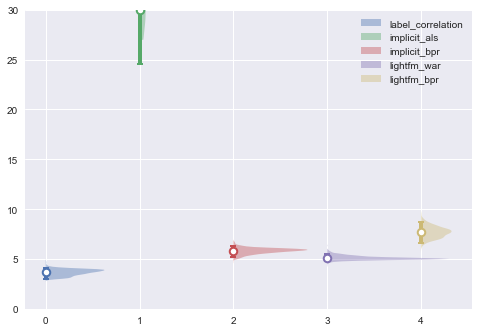

In [102]:
fig, ax = plt.subplots()
#2015 is the 7th yr
yr=7

for count, name in enumerate(filenames):
    trace = trace_dict[name][yr]

    untransformed_samples = expit(trace['a'])*num_targets[yr]
    m = np.mean(untransformed_samples)
    hpd = pm.hpd(untransformed_samples)
    print(m, hpd)
    xs = np.linspace(m-3,m+3,100)
    density = calc_kde(untransformed_samples, xs=xs)/2

    ax.errorbar(count, m, yerr = np.array([m-hpd[0], hpd[1]-m])[:,None],
                           fmt='o', mfc='white', mew=2, linewidth=4, markersize=7.5, capsize=3)
    ax.fill_betweenx(xs,density+count,count, alpha=0.4,label=name.strip('hpo_'))
    
ax.set_ylim(0,30)
ax.legend()

4.916894216245914 [4.26621155 5.47516677]
10.935091483255103 [ 9.29206015 12.83070353]
5.670390663896595 [4.98344583 6.1783956 ]
5.5223835288684535 [4.89130953 6.10266926]
7.364068146001028 [6.02771229 8.43594177]


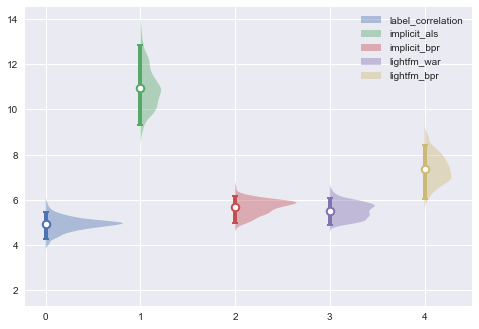

In [100]:
fig, ax = plt.subplots()
#2015 is the 7th yr
yr=6

for count, name in enumerate(filenames):
    trace = trace_dict[name][yr]

    untransformed_samples = expit(trace['a'])*num_targets[yr]
    m = np.mean(untransformed_samples)
    hpd = pm.hpd(untransformed_samples)
    print(m, hpd)
    xs = np.linspace(m-3,m+3,100)
    density = calc_kde(untransformed_samples, xs=xs)/2

    ax.errorbar(count, m, yerr = np.array([m-hpd[0], hpd[1]-m])[:,None],
                           fmt='o', mfc='white', mew=2, linewidth=4, markersize=7.5, capsize=3)
    ax.fill_betweenx(xs,density+count,count, alpha=0.4,label=name.strip('hpo_'))
    
#ax.set_ylim(0,20)
ax.legend()

In [93]:
ranks = np.load('./processed_data/'+str(yrs[yr])+'_'+'label_correlation'+'.npy')

(0.0, 20.0)

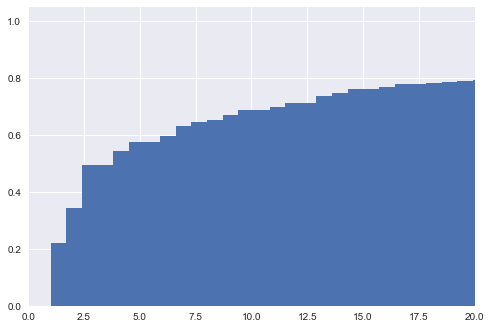

In [94]:

_=plt.hist(ranks, bins=254, cumulative=True, density=True)
plt.xlim(0,20)

In [95]:
ranks = np.load('./processed_data/'+str(year)+'_'+name+'.npy')

(array([0.22146739, 0.3423913 , 0.49456522, 0.49456522, 0.54347826,
        0.57608696, 0.57608696, 0.59782609, 0.63043478, 0.64673913,
        0.65353261, 0.66983696, 0.6861413 , 0.6861413 , 0.69836957,
        0.71059783, 0.71059783, 0.73777174, 0.7486413 , 0.76086957,
        0.76086957, 0.76766304, 0.77853261, 0.77853261, 0.7826087 ,
        0.78668478, 0.78804348, 0.79211957, 0.79483696, 0.80027174,
        0.80027174, 0.80434783, 0.80978261, 0.80978261, 0.81521739,
        0.81793478, 0.81929348, 0.82336957, 0.82744565, 0.82744565,
        0.82744565, 0.82880435, 0.82880435, 0.83152174, 0.83288043,
        0.83288043, 0.83288043, 0.83695652, 0.83695652, 0.84103261,
        0.84103261, 0.8423913 , 0.84375   , 0.84375   , 0.84375   ,
        0.84375   , 0.84375   , 0.84375   , 0.8451087 , 0.85054348,
        0.85054348, 0.85733696, 0.86005435, 0.86005435, 0.86413043,
        0.86413043, 0.86413043, 0.87092391, 0.87092391, 0.87907609,
        0.88179348, 0.88179348, 0.88315217, 0.88

In [17]:
#normal tools:
from scipy import sparse
import numpy as np
import copy
import sys
sys.path.append("..")
import utils

#learning libraries:
import implicit
import lightfm


In [29]:
results = dict()

for year in [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]:
    train, test = utils.load_time_split(year=year)
    prediction_matrix = utils.train_label_correlation(train)
    ranks= utils.evaluate_predictions(prediction_matrix, sparse.csr_matrix(test),sparse.csr_matrix(train))
    results[year]=ranks

  1%|          | 251/37287 [00:00<00:14, 2502.74it/s]

y_in shape is: (138998, 228)


  1%|          | 322/42693 [00:00<00:13, 3217.07it/s]

y_in shape is: (157161, 231)


  1%|          | 316/47096 [00:00<00:14, 3157.85it/s]

y_in shape is: (174055, 234)


  1%|          | 304/51936 [00:00<00:17, 3032.00it/s]

y_in shape is: (190924, 237)


  1%|          | 312/57629 [00:00<00:18, 3118.51it/s]

y_in shape is: (214547, 240)


  0%|          | 279/66347 [00:00<00:24, 2681.49it/s]

y_in shape is: (247501, 242)


  0%|          | 302/74115 [00:00<00:24, 3017.07it/s]

y_in shape is: (289126, 243)


  0%|          | 316/82818 [00:00<00:26, 3157.95it/s]

y_in shape is: (328332, 243)


  0%|          | 281/85435 [00:00<00:31, 2729.71it/s]

y_in shape is: (336973, 243)


100%|██████████| 336973/336973 [00:49<00:00, 6804.63it/s]


In [55]:
year = 2008
train, test = utils.load_time_split(year=year)
prediction_matrix = utils.train_label_correlation(train)
ranks= utils.evaluate_predictions(prediction_matrix, sparse.csr_matrix(test),sparse.csr_matrix(train))
results[year]=ranks

  1%|          | 257/32318 [00:00<00:12, 2522.77it/s]

y_in shape is: (122744, 225)


100%|██████████| 122744/122744 [00:20<00:00, 6059.19it/s]


In [57]:
from scipy.stats import sem
z=1.96
highs = list()
lows = list()
middles = list()
for year in [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]:
    train, test = utils.load_time_split(year=year)
    num_targets = train.shape[1]
    ranks = results[year] / num_targets
    log_ranks = np.log10(ranks)
    s = sem(log_ranks)
    m = log_ranks.mean()
    low = 10**(m-s*z)*num_targets
    high = 10**(m+s*z)*num_targets
    print(10**m*num_targets, low, high)
    
    highs.append(high)
    lows.append(low)
    middles.append(10**m*num_targets)
    #print(10**log_ranks.mean()*num_targets)
    

9.194867907033192 8.655469338334436 9.767881153866808
8.865719110383447 8.33552181725561 9.429640647272263
8.755299542231029 8.2330263573022 9.310703834465713
7.758292894485843 7.155004630632428 8.412448592826312
7.068771343279941 6.509448082086744 7.6761543641588625
5.85866988338976 5.385023872227818 6.373975978000283
5.867641605027213 5.364448470532684 6.418034993563383
5.694168735484293 5.1054812790576 6.350734791872888
6.097804869871744 5.084457363928806 7.31311555384934
5.009232169974868 3.077243423602167 8.15418329933041


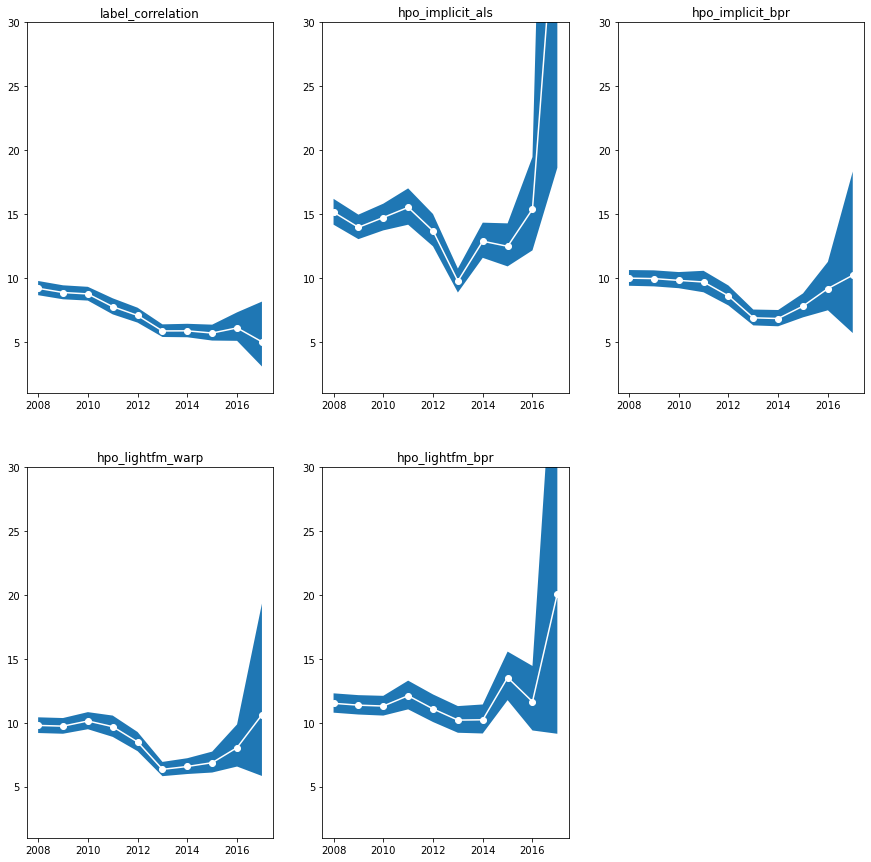

In [53]:
yrs = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
num_targets = [225, 228, 231, 234, 237, 240, 242, 243, 243, 243]
filenames = ['label_correlation', 'hpo_implicit_als', 'hpo_implicit_bpr',
             'hpo_lightfm_warp', 'hpo_lightfm_bpr']

#fig, ax = plt.subplots(2, 3)

fig = plt.figure()

ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)

from scipy.stats import sem 

fig.set_figheight(15)
fig.set_figwidth(15)
z = 1.959964

for name, a in zip(filenames, [ax1, ax2, ax3, ax4, ax5]):
    lows = list()
    highs = list()
    middles = list()
    for count, year, num in zip(range(len(yrs)), yrs, num_targets):
        ranks = np.load('./processed_data/'+str(year)+'_'+name+'.npy')/num
        log_ranks = np.log10(ranks)
        s = sem(log_ranks)
        m = log_ranks.mean()
        low = 10**(m-s*z)*num
        high = 10**(m+s*z)*num


        highs.append(high)
        lows.append(low)
        middles.append(10**m*num)
        

    a.fill_between(yrs, y1=lows, y2=highs, label=name)
    a.plot(yrs, middles,  '-o', c='white',)
    a.set_ylim(1, 30)
    a.set_title(name)
    #.legend()
plt.show()


In [120]:
num_targets[7]

243

In [111]:
ranks

array([0.00411523, 0.02469136, 0.34156379, 0.35802469, 0.01646091,
       0.02469136, 0.02880658, 0.3127572 , 0.41152263, 0.41975309,
       0.3909465 , 0.42386831, 0.46502058, 0.40329218, 0.63374486,
       0.60493827, 0.57201646, 0.00411523, 0.42386831, 0.93004115,
       0.01646091, 0.00411523, 0.00411523, 0.01646091, 0.00411523,
       0.88888889, 0.00411523])

In [83]:
from scipy.stats import norm

year = 2015
train, test = utils.load_time_split(year=year)
num_targets = train.shape[1]
ranks = results[year] / num_targets
log_ranks = np.log10(ranks)
s = sem(log_ranks)
m = log_ranks.mean()

norm.fit(log_ranks)

(-1.6301759411344163, 0.6555528412346223)

0.323
0.331
0.306
0.319
0.339
0.34900000000000003
0.356
0.34800000000000003
0.359
0.34


(0.0, 0.5)

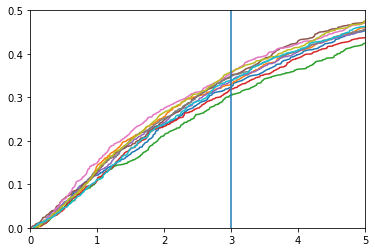

In [93]:
for _ in range(10):
    samples = norm(-1.63, 0.65).rvs(1000)
    ec = ECDF(10**samples*num_targets)
    plt.plot(ec.x, ec.y)
    print(ec.y[np.where(ec.x>3)[0][0]])
plt.xlim(0, 5)
plt.axvline(3)
plt.ylim(0, 0.5)

In [90]:
np.where(ec.x>3)[0][0]

344

(0.0, 10.0)

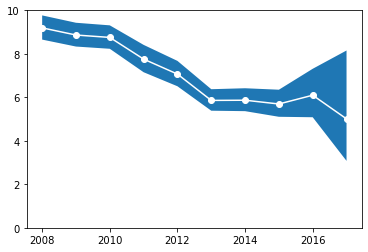

In [58]:
yrs = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
plt.fill_between(yrs, y1=lows, y2=highs)
plt.plot(yrs, middles,  '-o', c='white',)

plt.ylim(0,10)

(0.0, 20.0)

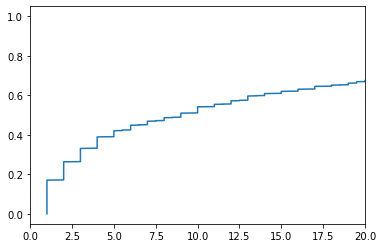

In [28]:
ec = ECDF(ranks)
plt.plot(ec.x, ec.y)
plt.xlim(0,20)

In [3]:
filenames = ['hpo_implicit_als', 'hpo_implicit_bpr',
             'hpo_lightfm_warp', 'hpo_lightfm_bpr']

In [25]:
df = pd.DataFrame(columns=['Algorithm', 'Hyperparameter', 'Value'])
rownum=0
for name in filenames:
    params = utils.read_params(name)
    for key, value in params.items():
        df.loc[rownum] = [name[4:], key, value]
        rownum+=1

In [43]:
f = open('hi.md', 'w')
f.write(df.to_markdown())
f.close()


In [256]:
def plot_fig_label(ax, lab):
    ax.text(0, 1.15, lab, transform=ax.transAxes,
        fontsize=24, va='top', ha='left')

In [404]:
fps = sparse.load_npz('morgan.npz')
smiles = pd.read_csv('../data/pchembl_chemicals.csv')['canonical_smiles']

In [406]:
def fast_dice(X, Y=None):
    if isinstance(X, np.ndarray):
        X = sparse.csr_matrix(X).astype(bool).astype(int)
    if Y is None:
        Y = X
    else:
        if isinstance(Y, np.ndarray):
            Y = sparse.csr_matrix(Y).astype(bool).astype(int)

    intersect = X.dot(Y.T)
    #cardinality = X.sum(1).A
    cardinality_X = X.getnnz(1)[:,None] #slightly faster on large matrices - 13s vs 16s for 12k x 12k
    cardinality_Y = Y.getnnz(1) #slightly faster on large matrices - 13s vs 16s for 12k x 12k
    return (1-(2*intersect) / (cardinality_X+cardinality_Y.T)).A


##The following is to calculate AVE bias:
def fast_jaccard(X, Y=None):
    """credit: https://stackoverflow.com/questions/32805916/compute-jaccard-distances-on-sparse-matrix"""
    if isinstance(X, np.ndarray):
        X = sparse.csr_matrix(X)
    if Y is None:
        Y = X
    else:
        if isinstance(Y, np.ndarray):
            Y = sparse.csr_matrix(Y)
    assert X.shape[1] == Y.shape[1]

    X = X.astype(bool).astype(int)
    Y = Y.astype(bool).astype(int)
    intersect = X.dot(Y.T)
    x_sum = X.sum(axis=1).A1
    y_sum = Y.sum(axis=1).A1
    xx, yy = np.meshgrid(x_sum, y_sum)
    union = ((xx + yy).T - intersect)
    return (1 - intersect / union).A

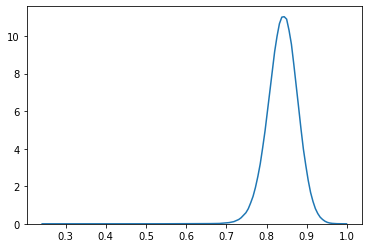

In [302]:
randidx = np.random.choice(337951, 1000, replace=False)
sample = fps[randidx]
similarities = fast_jaccard(sample, sample)
from scipy.spatial.distance import squareform
kdeplot(squareform(similarities))

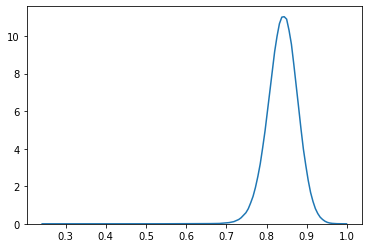

In [303]:
from scipy.spatial.distance import squareform
kdeplot(squareform(similarities))

In [2]:
interaction_matrix = sparse.load_npz('../data/interaction_matrix_pchembl.npz')

In [3]:
L = utils.makeCorrelations(interaction_matrix)
L=L.toarray()

  0%|          | 281/85681 [00:00<00:32, 2616.31it/s]

y_in shape is: (337951, 243)


100%|██████████| 85681/85681 [00:27<00:00, 3113.35it/s]


In [4]:
train, test = utils.load_time_split()

In [6]:
interaction_matrix

<337951x243 sparse matrix of type '<class 'numpy.float64'>'
	with 483643 stored elements in Compressed Sparse Row format>

In [7]:
L = utils.makeCorrelations(train)
L=L.toarray()

  1%|          | 218/42693 [00:00<00:19, 2175.88it/s]

y_in shape is: (157161, 231)


100%|██████████| 42693/42693 [00:13<00:00, 3151.89it/s]


In [8]:

y = train.toarray()

In [9]:
import tqdm
from sklearn.metrics import label_ranking_loss
# get ligands with more than one label.
# Because you can't use the correlation matrix when you've removed the only known positive.
multiple_labels = np.sum(y,axis=1)>1

#this removes the influence of each ligand individually from the co-occurrence graph,
#In theory this prevents bias, but it is so small it is not detectible.
def subtractLigand(L, row, tot_instances):
    P = copy.copy(L) #don't want to change the values in L or it will change over time. 
                    #take a copy each time we want to subtract a ligand, to keep L constant.
    for j,k in itertools.permutations(np.where(row==1)[0], 2):
        P[j][k] -= (1)/(tot_instances[k])  
    return 1-P

tot_instances = np.sum(y, axis=0)

trials=1000

rloss = list()
rank_list = list()
hit_list = list()
miss_list = list()
#for idx in np.random.choice(multiple_labels.nonzero()[0], trials, replace=False):
for idx in tqdm.tqdm_notebook(multiple_labels.nonzero()[0]):
    print(idx,end='\r')
    labels = y[idx]
    L1 = subtractLigand(L, y[idx], tot_instances) #remove influence of this ligand on the correlation matrix:
    ones = np.where(labels==1)[0]
    zeros = np.where(labels==0)[0]
    
    scores = np.zeros(labels.shape[0])
    for o in ones:
        labels = copy.copy(y[idx])
        labels[o]=0
        probs_pos = 1-np.prod(L1[o][labels==1])
        scores[o]=probs_pos
    for z in zeros:
        labels = copy.copy(y[idx])
        probs_pos = 1-np.prod(L1[z][labels==1])
        scores[z]=probs_pos
    ranks_unadjusted = np.argsort(-scores).argsort()[labels.astype(bool)]+1
    #ranks_unadjusted = rankdata(-scores)[labels.astype(bool)]
    
    #now increase the worse ranked positives by the number of positives in front of it
    #for example if two ligands ranked 1, 2, we count it as 1,1
    #this is because we don't want to penalise perfect ranking of two ligands in a row. 
    #ranks_adj = ranks_unadjusted-(rankdata(ranks_unadjusted)-1)
    

    ranks_adj = ranks_unadjusted-(ranks_unadjusted).argsort().argsort()
    
    hit_list += list(scores[labels.astype(bool)])
    miss_list += list(scores[~labels.astype(bool)])
    rank_list += list(ranks_adj)

    rloss.append(label_ranking_loss([labels], [scores]))

    
rank_list = np.array(rank_list)
print('##############################')
print('### Ranking loss is: %s ###' % (np.around(np.mean(rloss), 3)))
print('##############################')

KeyboardInterrupt: 

(0.0, 20.0)

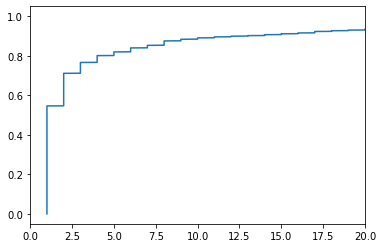

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF
ec =ECDF(rank_list)
plt.plot(ec.x,ec.y)
plt.xlim(0,20)

In [560]:
hit_arr = np.array(hit_list)
miss_arr = np.array(miss_list)

In [582]:
x = np.linspace(0,1,50)
# cals = list()
# for cutoff in x:
#     num_hits = (hit_arr>=cutoff) & (hit_arr<=(cutoff+0.02))
#     num_miss = (miss_arr>=cutoff) & (miss_arr<=(cutoff+0.02))
#     cal = num_hits.sum() / (num_hits.sum()+num_miss.sum())
#     cals.append(cal)

In [602]:
x = np.linspace(0,1,21)
h = np.histogram(hit_arr, bins=x)
m = np.histogram(miss_arr, bins=x)

In [603]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

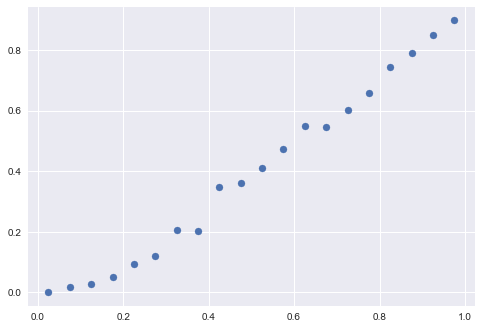

In [605]:
plt.scatter(x[:-1]+0.025, h[0]/(m[0]+h[0]))

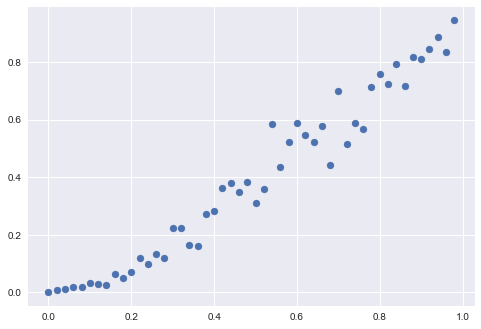

In [580]:

plt.scatter(x,cals)

In [578]:
num_miss.sum()

708

(0.0, 20.0)

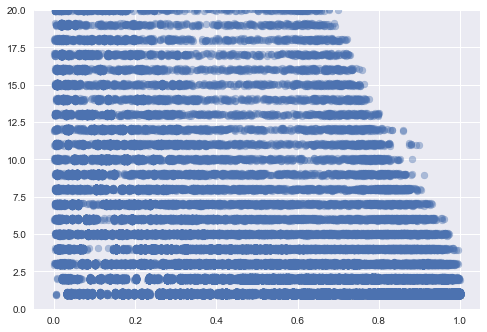

In [486]:
plt.scatter(score_list, rank_list+np.random.uniform(-0.1,0.1,len(score_list)), alpha=0.4)
plt.ylim(0,20)

In [487]:
rank_arr = np.array(rank_list)
score_arr = np.array(score_list)

In [549]:
x =np.linspace(1,0,100)
metric = list()
for cutoff in x:
    ranks = rank_arr[score_arr>=cutoff]
    n = len(ranks)
    val =(ranks<=1).sum()/n
    metric.append(val)
    

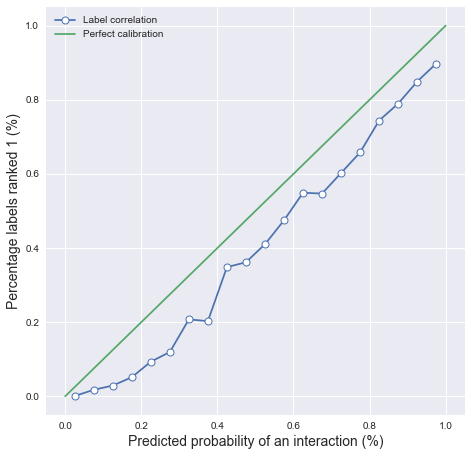

In [609]:
fig, ax = plt.subplots()
fig.set_figheight(7.5)
fig.set_figwidth(7.5)

# for ranking in [1,2,3]:
#     metric = list()
#     for cutoff in x:
#         ranks = rank_arr[score_arr>=cutoff]
#         n = len(ranks)
#         val =(ranks<=ranking).sum()/n
#         metric.append(val)
#ax.plot(x*100, np.array(metric)*100, '-o', mfc='white', mew=1, label='Label correlation')
ax.plot(x[:-1]+0.025, h[0]/(m[0]+h[0]), '-o', mfc='white', mew=1, label='Label correlation')

ax.set_ylabel('Percentage labels ranked 1 (%)', fontsize=14)
ax.set_xlabel('Predicted probability of an interaction (%)', fontsize=14)
ax.plot([0,1],[0,1], label='Perfect calibration')
ax.legend()
fig.savefig('calibration.pdf')

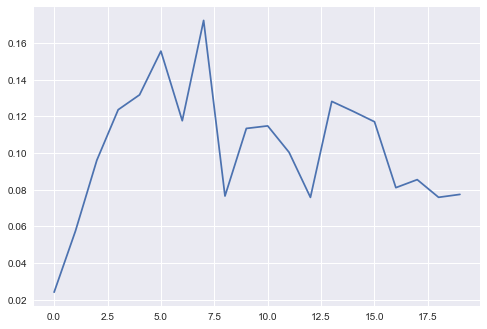

In [614]:
plt.plot(( x[:-1]+0.025) - h[0]/(m[0]+h[0]))

In [618]:
(( x[:-1]+0.025) - h[0]/(m[0]+h[0])).mean()

0.10238247583745377

In [612]:
 x[:-1]+0.025

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

(array([0.93586207, 0.97793103, 0.99103448, 0.99103448, 0.99632184,
        0.99701149, 0.99701149, 0.99908046, 0.99954023, 1.        ]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

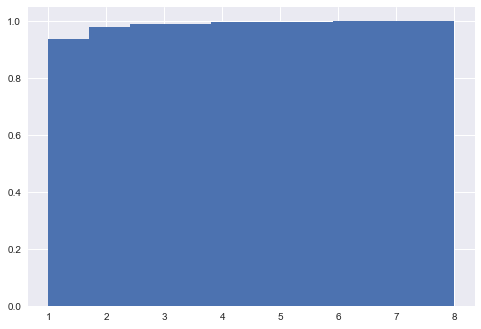

In [458]:
plt.hist(rank_list[score_list>0.9], bins=10, cumulative=True, density=True)

In [449]:
scores[labels.astype(bool)]

array([0.10311165, 0.09964623])

In [447]:
rank_list

array([88,  9, 39, ...,  1,  6,  6])

In [392]:
213-40

173

In [63]:
def calc_hpd(ranks, statistic=np.mean):
    with pm.Model() as model:
        #prior on statistic of interest:
        a = pm.Normal('a', mu=statistic(ranks), sigma=10.0)
        #'nuisance' parameter:
        b = pm.HalfNormal('b', sigma=10.0)
        #likelihood:
        if statistic==np.mean:
            y = pm.Normal('y', mu=a, sigma=b, observed=ranks)
        elif statistic==np.median:
            y = pm.Laplace('y', mu=a, b=b,observed=ranks)
        trace = pm.sample(draws=500, tune=500, chains=2, target_accept=0.9)

    return trace

In [65]:
import pymc3 as pm

In [237]:
mean_trace = calc_hpd(np.array(rank_list), np.mean)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:20<00:00, 96.28draws/s] 


In [393]:
?np.save

In [238]:
median_trace = calc_hpd(np.array(rank_list), np.median)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [01:36<00:00, 20.80draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


In [74]:
plt.style.use('seaborn')

In [202]:
gaussian_kde

(0.0, 1.0)

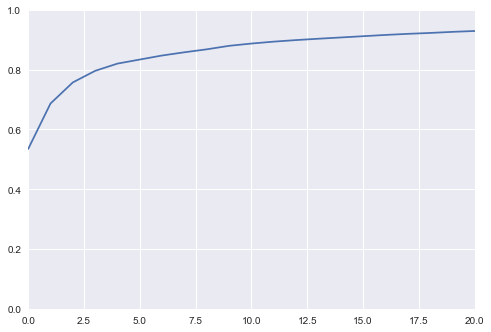

In [244]:
plt.plot(n.cumsum()/n.sum())
plt.xlim(0,20)
plt.ylim(0,1)

5.7643897146310525 [5.70735347 5.81728499]
1.0002484382786776 [0.99995381 1.00070301]
p at k: 0.7572361511498749


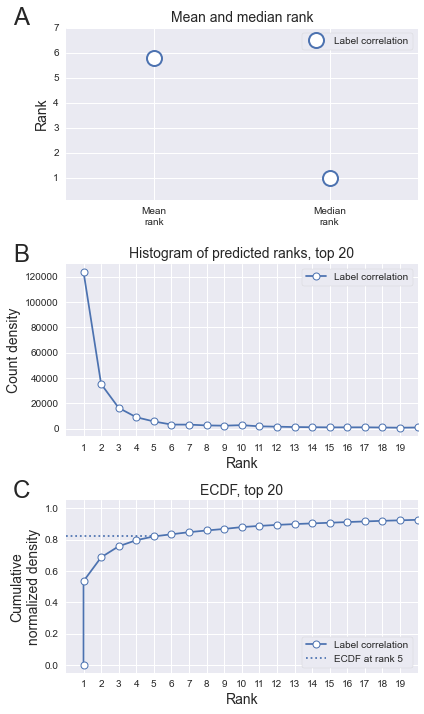

In [445]:
def plot_fig_label(ax, lab):
    ax.text(-0.15, 1.12, lab, transform=ax.transAxes,
        fontsize=24, va='top', ha='left')

fig, ax = plt.subplots(nrows=3,ncols=1)
fig.set_figheight(10)
fig.set_figwidth(6)

label='Label correlation'
for count,trace,name in zip([0,1], [mean_trace, median_trace], ['mean rank', 'median rank']):
    m = np.mean(trace['a'])
    hpd = pm.hpd(trace['a'])
    print(m, hpd)
    xs = np.linspace(m-3,m+3,100)
    density = calc_kde(trace['a'], xs=xs)

    ax[0].errorbar(count, m, yerr = np.array([m-hpd[0], hpd[1]-m])[:,None],mfc='white',mew=2,
                           fmt='o', c='C0',linewidth=4, markersize=15, capsize=3, label=label)
    
    label=None

ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['Mean\nrank', 'Median\nrank'])
ax[0].set_xlim(-0.5,1.5)
#ax[0].errorbar(-10,3, label='Label correlation')
ax[0].legend(frameon=True, fancybox=True, framealpha=1)
ax[0].set_ylabel('Rank', fontsize=14)
ax[0].set_ylim(0.1,7)
ax[0].set_title('Mean and median rank', fontsize=14)
plot_fig_label(ax[0], 'A')

n, x = np.histogram(np.array(rank_list), bins = np.linspace(1,243,243))
#bin_centers = 0.5*(x[1:]+x[:-1])
#ax[1].plot(bin_centers,n,'-o', mfc='white', label='Label correlation')
#ax[1].plot(x[:-1],n,'-o', mfc='white', label='Label correlation')
ax[1].plot(x[:-1],n,'-o', mfc='white', mew=1, label='Label correlation')
#ax[1].scatter(bin_centers,n,label='Label correlation')
ax[1].set_xlim(0,20)
ax[1].set_xticks(np.arange(1,20))
ax[1].set_xlabel('Rank', fontsize=14)
ax[1].set_ylabel('Count density',fontsize=14)
ax[1].set_title('Histogram of predicted ranks, top 20',fontsize=14)
ax[1].legend(frameon=True, fancybox=True, framealpha=1)
plot_fig_label(ax[1], 'B')

ecdf = np.cumsum(n)/n.sum()
ax[2].plot([1]+list(x[:-1]),[0]+list(ecdf), '-o', mfc='white', mew=1, label='Label correlation')
ax[2].set_xlim(0.0,20)
ax[2].set_xticks(np.arange(1,20))
ax[2].plot([0,5],[ecdf[4],ecdf[4]],c='C0', linestyle=':', label='ECDF at rank 5')
print('p at k:', ecdf[2])
ax[2].legend(frameon=True, fancybox=True, framealpha=1)
ax[2].set_ylabel('Cumulative\nnormalized density', fontsize=14)
ax[2].set_xlabel('Rank',fontsize=14)
ax[2].set_title('ECDF, top 20',fontsize=14)
plot_fig_label(ax[2], 'C')


plt.tight_layout()

plt.savefig('label_correlation_loo.pdf')

In [431]:
bop.

TypeError: get_label() takes 1 positional argument but 2 were given

In [ ]:
import matplotlib.pyplot as plt
import pymc3 as pm
from scipy.stats import gaussian_kde
import numpy as np
plt.style.use('seaborn')
from statsmodels.distributions import ECDF

def calc_hpd(ranks, statistic=np.mean):
    with pm.Model() as model:
        #prior on statistic of interest:
        a = pm.Normal('a', mu=statistic(ranks), sigma=10.0)
        #'nuisance' parameter:
        b = pm.HalfNormal('b', sigma=10.0)
        #likelihood:
        if statistic==np.mean:
            y = pm.Normal('y', mu=a, sigma=b, observed=ranks)
        elif statistic==np.median:
            y = pm.Laplace('y', mu=a, b=b,observed=ranks)
        trace = pm.sample(draws=500, tune=500, chains=2, target_accept=0.9)

    return trace

def calc_kde(ranks, xs=np.linspace(0,243,243)):
    #kde:
    density = gaussian_kde(ranks)
    density.covariance_factor= lambda : 0.25
    density._compute_covariance()
    return density(xs)

#def calc_ecdf(ranks):
#    ecdf = [(ranks<i).sum()/len(ranks) for i in range(0, 243)]
#    return ecdf

def plot_fig_label(ax, lab):
    ax.text(0, 1.15, lab, transform=ax.transAxes,
        fontsize=24, va='top', ha='left')


In [443]:
rank_list.shape

(231373,)

In [309]:
filenames = ['label_correlation', 'hpo_implicit_als', 'hpo_implicit_bpr',
             'hpo_lightfm_warp', 'hpo_lightfm_bpr']

p at k: 0.3319570602807597


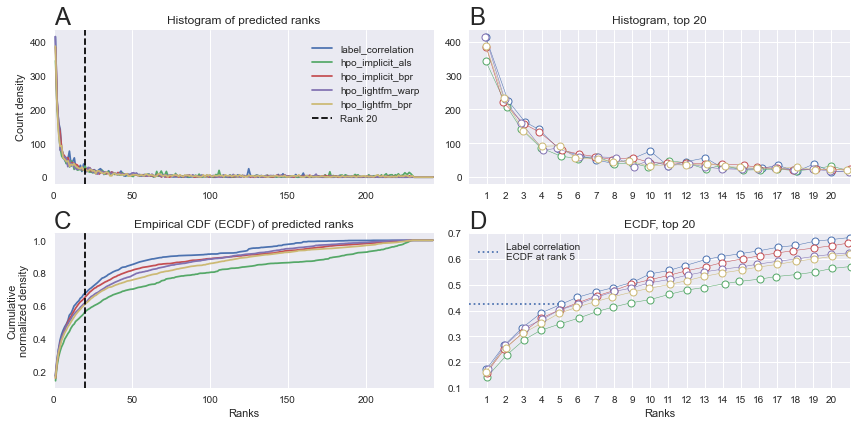

In [446]:
def plot_fig_label(ax, lab):
    ax.text(0, 1.15, lab, transform=ax.transAxes,
        fontsize=24, va='top', ha='left')


fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(12)
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]

for name in filenames:
    ranks = np.load(name+'.npy')

    ##Plot histogram:
    n, x = np.histogram(ranks, bins = np.linspace(1,244,244))
    ax1.plot(x[:-1]+np.random.uniform(-0.15,0.15,len(n)),n, label=name)
    ax2.plot(x[:-1]+np.random.uniform(-0.15,0.15,len(n)),n,'-o', mfc='white', mew=1, label=name, linewidth=0.5)

    ##Plot empirical cumulative distribution function
    ecdf = np.cumsum(n)/n.sum()
    ax3.plot(x[:-1]+np.random.uniform(-0.1,0.1,len(n)),ecdf)
    ax4.plot(x[:-1]+np.random.uniform(-0.1,0.1,len(n)),ecdf, '-o', mfc='white', mew=1, linewidth=0.5)
    if name == 'label_correlation':
        ax4.plot([0,5],[ecdf[4],ecdf[4]],c='C0', linestyle=':',label='Label correlation\nECDF at rank 5')
        print('p at k:', ecdf[2])
        
ax1.set_title('Histogram of predicted ranks')
ax1.set_ylabel('Count density')
ax1.yaxis.grid()
ax1.axvline(20, linestyle='--', c='k', label='Rank 20')
ax1.set_xlim(0,244)
plot_fig_label(ax1, 'A')

ax2.set_xlim(0,21)
ax2.set_title('Histogram, top 20')
#ax2.yaxis.grid()
ax2.set_xticks(np.arange(1,21,1))


plot_fig_label(ax2, 'B')

ax3.set_xlim(0,244)
ax3.set_title('Empirical CDF (ECDF) of predicted ranks')
ax3.set_ylabel('Cumulative\nnormalized density')
ax3.yaxis.grid()
ax3.axvline(20, linestyle='--', c='k')
ax3.set_xlabel('Ranks')
plot_fig_label(ax3, 'C')

ax4.set_xlim(0,21)
ax4.set_ylim(0.1, 0.7)
ax4.set_title('ECDF, top 20')
#ax4.yaxis.grid()
ax4.legend()
ax4.set_xticks(np.arange(1,21,1))
ax4.set_xlabel('Ranks')

plot_fig_label(ax4, 'D')
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.tight_layout()

fig.savefig('distributions.pdf')



In [271]:
from scipy.stats import laplace, norm

In [270]:
laplace.fit(np.array(rloss))

(0.002074688805530626, 0.02070041788662231)

In [272]:
norm.fit(np.array(rloss))

(0.02104199448315733, 0.06252160625008123)

In [268]:
np.array(rloss).mean()

0.02104199448315733

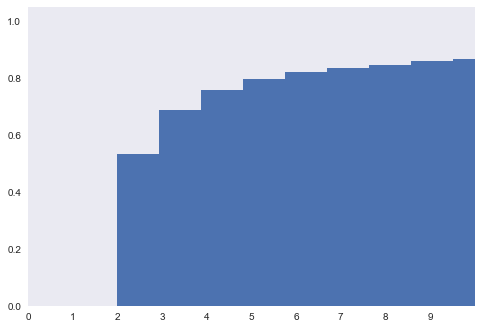

In [175]:
_ = plt.hist(np.array(rank_list), bins=243, cumulative=True, density=True)
plt.xlim(0,10)
_ = plt.xticks(range(10))
plt.grid()

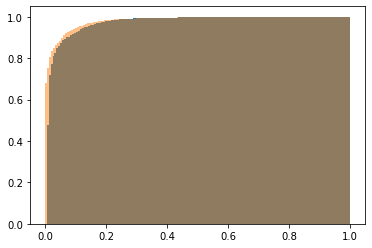

In [263]:
_ = plt.hist(np.array(rank_list)/np.array(rank_list).max(), bins=155, cumulative=True, density=True)
_ = plt.hist(rloss, bins=155, cumulative=True, density=True, alpha=0.5)

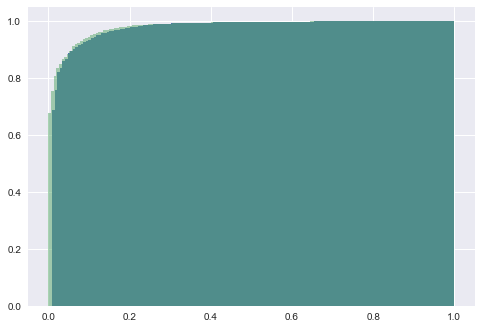

In [176]:
_ = plt.hist(np.array(rank_list)/np.array(rank_list).max(), bins=155, cumulative=True, density=True)
_ = plt.hist(rloss, bins=155, cumulative=True, density=True, alpha=0.5)

(array([ 6358., 11687.,  6263.,  4626.,  6418.,  5415.,  2932.,  3928.,
         5620.,     0., 11502.,     0.,     0., 20035.,     0.,     0.,
            0.,     0., 35865.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 53968.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0., 56756.]),
 array([0.00411523, 0.02222222, 0.04032922, 0.05843621, 0.07654321,
        0.09465021, 0.1127572 , 0.1308642 , 0.14897119, 0.16707819,
        0.18518519, 0.20329218, 0.22139918, 0.23950617, 0.25761317,
        0.27572016, 0.29382716, 0.31193416, 0.33004115, 0.34814815,
        0.36625514, 0.38436214, 0.40246914, 0.42057613, 0.43868313,
        0.45679012, 0.47489712, 0.49300412, 0.51111111, 0.52921811,
        0.5473251 , 0.5654321 , 0.58353909, 0.60164609, 0.61975309,
        0.63786008, 0.6559

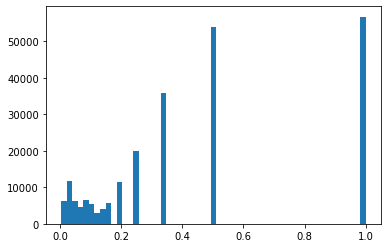

In [105]:
plt.hist(1/np.array(rloss), bins=55)

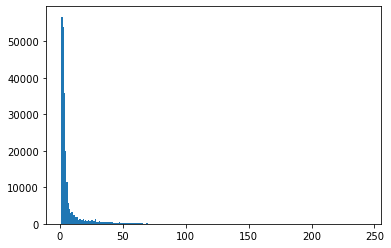

In [240]:
_ = plt.hist(rloss, bins=243)

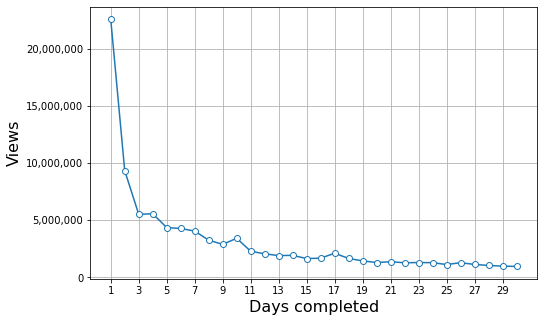

In [323]:
import matplotlib as mpl
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
ax.plot(np.arange(30)+1, views, '-o', mfc='white')
ax.grid()
ax.set_xticks(np.arange(0,30,2)+1)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
_ =ax.set_ylabel('Views', fontsize=16)
_ = ax.set_xlabel('Days completed', fontsize=16)

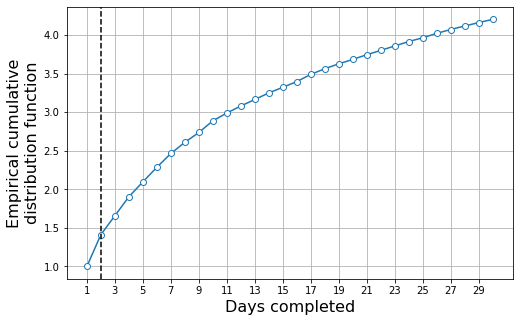

In [62]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)

ax.grid()
ax.set_xticks(np.arange(0,30,2)+1)
ax.plot(np.arange(30)+1, np.cumsum(views)/views[0], '-o', mfc='white')
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
_ =ax.set_ylabel('Empirical cumulative\ndistribution function', fontsize=16)
_ = ax.set_xlabel('Days completed', fontsize=16)
ax.axvline(2, c='k', linestyle='--')

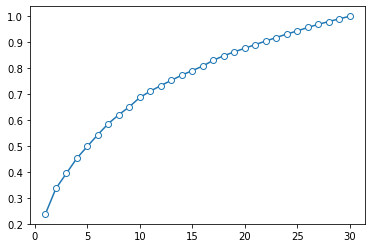

In [310]:
plt.plot(np.arange(30)+1, np.cumsum(views)/views.sum(), '-o', mfc='white')

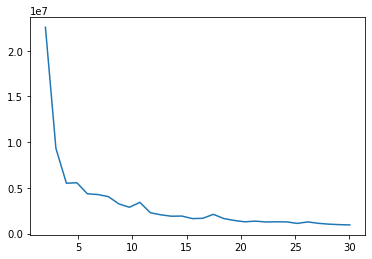

In [309]:
a,b=np.histogram(d,bins=30 )
plt.plot(b[:-1],a)

In [149]:
from scipy.optimize import minimize
from scipy.special import factorial
from scipy import stats


def poisson_(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)


def negative_log_likelihood(params, data):
    """
    The negative log-Likelihood-Function
    """

    lnl = - np.sum(np.log(poisson_(data, params[0])))
    return lnl

def negative_log_likelihood(params, data):
    ''' better alternative using scipy '''
    return -stats.poisson.logpmf(data, params[0]).sum()


# get poisson deviated random numbers
data = np.array(rloss)-1

# minimize the negative log-Likelihood

result = minimize(negative_log_likelihood,  # function to minimize
                  x0=np.ones(1),            # start value
                  args=(data,),             # additional arguments for function
                  method='Powell',          # minimization method, see docs
                  )
# result is a scipy optimize result object, the fit parameters 
# are stored in result.x
print(result)


   direc: array([[-0.01780932]])
     fun: 2064565.9527515436
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 2
  status: 0
 success: True
       x: array(6.233411)


In [145]:
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

def fit_function(a, k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return a*poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function,np.arange(30), views)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 15)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()

TypeError: fit_function() takes 3 positional arguments but 31 were given

In [147]:
(views/10).astype(int)

array([2257049,  932534,  551285,  556283,  435363,  427426,  404636,
        325081,  288392,  341726,  228504,  205643,  190534,  192098,
        164330,  167650,  210996,  164929,  143981,  129367,  136800,
        127365,  129510,  128423,  111823,  128045,  112852,  103718,
         98195,   95278])

In [56]:
ywt = [166802,82536,66469,51524,60354,49863,9871,30399,41038,37672,
        35059,39624,34595,21715,30892,25538,26693,34461,
        24135,22479,17244,22989,22544,17369,18359,20345,
        22100,11539,26516,22129,17829,21899]
ywt = np.array(ywt)

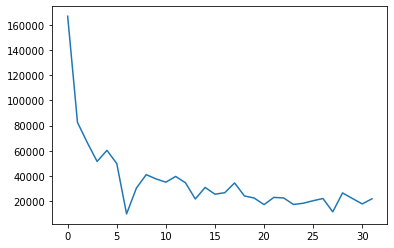

In [57]:
plt.plot(ywt)

In [115]:
(np.array(rloss)-1).mean()

6.23341098572435

In [47]:
views = [22570492,9325342,5512854,5562831,4353639,4274261,4046361,3250815,2883926,3417262 ,2285048,
         2056437,1905341,1920983,1643300,1676501,2109967,1649299,1439810 ,1293674,
         1368001,1273653,1295109,1284235,1118238,1280456 ,1128527,1037188,981952,952783]
views = np.array(views)

In [60]:
np.subtract.reduce(views)

-49757301

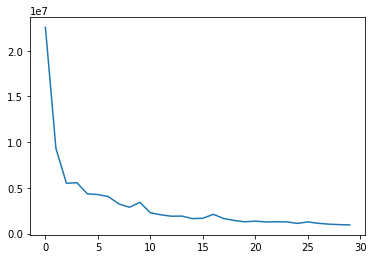

In [61]:
plt.plot(views)

In [150]:
# get poisson deviated random numbers
data = views

# minimize the negative log-Likelihood

result = minimize(negative_log_likelihood,  # function to minimize
                  x0=np.ones(1),            # start value
                  args=(data,),             # additional arguments for function
                  method='Powell',          # minimization method, see docs
                  )

In [153]:
result

   direc: array([[773.21778631]])
     fun: 42931737.852416925
 message: 'Optimization terminated successfully.'
    nfev: 76
     nit: 2
  status: 0
 success: True
       x: array(3163276.18667885)

In [183]:
d = np.array([])
for count, v in enumerate(views):
    dat = np.ones(v)+(count+1)
    d = np.concatenate([d, dat])

In [187]:
np.mean(d)

9.522777087067485

In [192]:
x = np.arange(30)

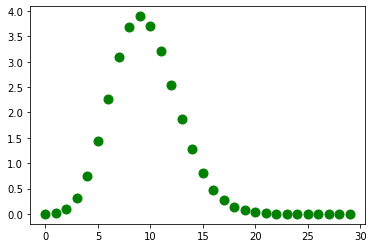

In [193]:
plt.plot(x, poisson.pmf(x, np.mean(d))*len(x), 'go', markersize=9)

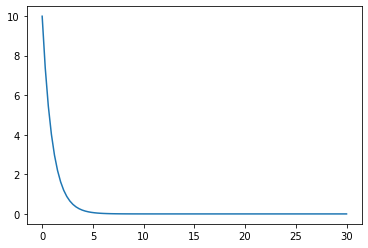

In [196]:
x = np.linspace(0.001,30,100)
plt.plot(x, 10*poisson.pmf(0, x))

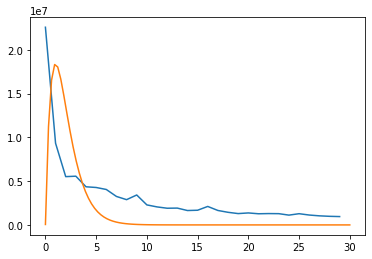

In [206]:
plt.plot(views)
plt.plot(x, 50000000*poisson.pmf(1, x))
#plt.axhline(42931737)

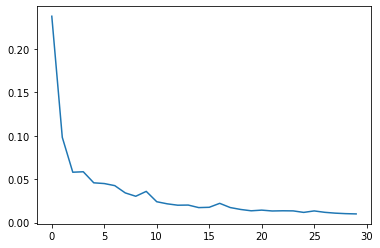

In [215]:
plt.plot(views/views.sum())

In [216]:
nd = views/views.sum()

In [227]:
from scipy.stats import expon
P = expon.fit(d)
P

(2.0, 7.522777087067485)

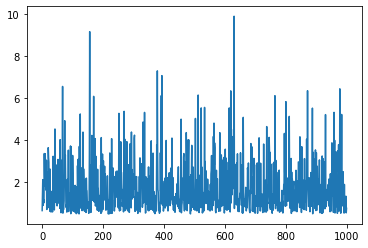

In [226]:
X = expon.rvs(loc=0.5, scale=1.2, size=1000)
plt.plot(X)

In [230]:
rX = np.linspace(1,30, 100)
rP = expon.pdf(rX, *P)

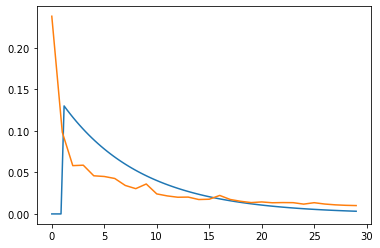

In [232]:
plt.plot(rX-1,rP)
plt.plot(nd)

In [233]:
import pymc3 as pm


In [109]:
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, np.array(rloss)-1)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 15)


NameError: name 'bin_middles' is not defined

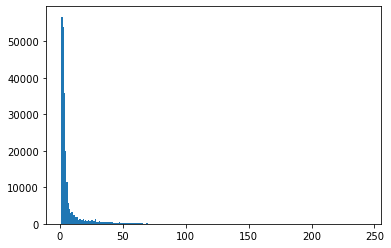

In [101]:
_ =plt.hist(rloss,bins=243)

In [82]:
print(scores[labels.astype(bool)])
print(np.argsort(-scores).argsort()[labels.astype(bool)])
print(label_ranking_loss([labels], [scores]))

[0.616179   0.85942918]
[1 0]
0.0


In [86]:
np.argsort(-scores).argsort()[labels.astype(bool)]

array([1, 0])

In [79]:
(-scores).argsort()

array([149, 142,  73, 175,  36, 133, 138,  79, 123, 224, 140, 204, 178,
        13,  11, 164, 131, 154, 236, 128,  16, 150, 180, 214, 125,  31,
         0,  89, 136,  48, 202,  72, 222, 183,  29, 148, 176,  35, 120,
       218, 155,  65, 189, 157, 196, 105, 193, 237, 199, 198, 129, 126,
       191, 205,  40,   6, 152, 215, 109, 172, 168,  28, 235, 212, 167,
        14, 194, 158,  20, 166, 159, 101,  25,  59, 144, 186, 161,  32,
         1,  24,  81, 122,  69, 240, 134,  58,  78, 239, 231,  54, 208,
        51, 241, 108,  10, 234, 147, 232, 238, 163, 156, 151, 162, 233,
       153, 165, 160, 182, 170, 200, 201, 203, 206, 207, 209, 210, 225,
       211, 213, 216, 217, 219, 220, 221, 197, 195, 226, 192, 171, 173,
       174, 230, 177, 229, 179, 169, 181, 223, 184, 185, 187, 188, 227,
       190, 228, 146, 121, 143,  42,  43,  44,  45,  46,  47,  49,  50,
        52,  41,  53,  56,  57,  60,  61,  62,  63,  64,  66,  67,  55,
        68,  39,  37,   2,   3,   4,   5,   7,   8,   9,  12,  1

In [84]:
labels.sum()

2.0

In [81]:
labels[149]

1.0

In [68]:
scores.max()

0.8594291811149591

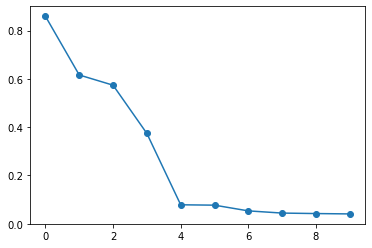

In [76]:
plt.plot(scores[(-scores).argsort()][:10], '-o')

In [77]:
scores[(-scores).argsort()][:1]

array([0.85942918])

In [ ]:
#this removes the influence of each ligand individually from the co-occurrence graph,
#In theory this prevents bias, but it is so small it is not detectible.
def subtractLigand(L, row, tot_instances):
    P = copy.copy(L) #don't want to change the values in L or it will change over time. 
                    #take a copy each time we want to subtract a ligand, to keep L constant.
    for j,k in itertools.permutations(np.where(row==1)[0], 2):
        P[j][k] -= (1)/(tot_instances[k])  
    return 1-P

tot_instances = np.sum(y, axis=0)

trials=1000

rloss = list()
for idx in np.random.choice(multiple_labels.nonzero()[0], trials, replace=False):
    print(idx,end='\r')
    labels = y[idx]
    L1 = subtractLigand(L, y[idx], tot_instances) #remove influence of this ligand on the correlation matrix:
    ones = np.where(labels==1)[0]
    zeros = np.where(labels==0)[0]
    
    scores = np.zeros(labels.shape[0])
    for o in ones:
        labels = copy.copy(y[idx])
        labels[o]=0
        probs_pos = 1-np.prod(L1[o][labels==1])
        scores[o]=probs_pos
    for z in zeros:
        labels = copy.copy(y[idx])
        probs_pos = 1-np.prod(L1[z][labels==1])
        scores[z]=probs_pos
    rloss.append(label_ranking_loss([labels], [scores]))

print('##############################')
print('### Ranking loss is: %s ###' % (np.around(np.mean(rloss), 3)))
print('##############################')

In [408]:
kdeplot(squareform(similarities), label='Random sample', linewidth=3)
for _ in range(10):
    idx = np.random.choice(interaction_matrix.shape[1])
    mask = (interaction_matrix[:,idx].toarray()==1).flatten()
    sample = fps[mask]
    temp_similarities = fast_jaccard(sample, sample)
    j,k = np.triu_indices(temp_similarities.shape[0], k=1)
    kdeplot(temp_similarities[j,k], linewidth=0.5)
    


ValueError: The matrix argument must be square.

In [2]:
year=2010

interaction_matrix = sparse.load_npz('../data/interaction_matrix_pchembl.npz')
interaction_dates = sparse.load_npz('../data/interaction_dates_pchembl.npz')

train = copy.copy(interaction_matrix)
test = copy.copy(interaction_matrix)

dates_mask = (interaction_dates.data<=year).astype(int)

#remove entries occuring from `year` and later from train matrix
train.data = train.data * dates_mask
#remove all training data from the test matrix.
test.data = test.data - train.data



row_mask = np.array((train.sum(axis=1)!=0)).reshape(1,-1)[0] #there must be a cleaner way to do that.
train = train[row_mask]
test = test[row_mask]


#similarly we must now remove any targets that have no data (or not enough) in the training matrix.
column_mask = (np.array(train.sum(0))[0] >= 20)
train = train.T[column_mask].T
test = test.T[column_mask].T


train.eliminate_zeros()
test.eliminate_zeros()

In [7]:
dat = interaction_dates.data
dat = dat[dat>1940]

Text(0, 0.5, 'Density')

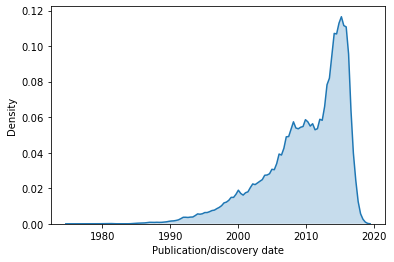

In [13]:
from seaborn import kdeplot 


kdeplot(dat, shade=True)
plt.xlabel('Publication/discovery date')
plt.ylabel('Density')



# Run label correlation to validate how ranks are indexed

In [190]:
preds = utils.train_label_correlation(train)

  1%|          | 257/42695 [00:00<00:16, 2564.98it/s]

y_in shape is: (157161, 243)


100%|██████████| 157161/157161 [00:27<00:00, 5650.65it/s]


Evaluate:

In [194]:
row_mask = np.array(test.sum(axis=1)>0).reshape(-1,)
test_masked = test[row_mask]
get_ranks = test_masked.astype(bool)

In [205]:
m=train[row_mask].astype(bool)

In [209]:
m.toarray()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [210]:
predictions = np.ma.masked_array(preds[row_mask].toarray(), mask=m.toarray())

In [212]:
from scipy.stats.mstats import rankdata
prediction_ranks = rankdata(-predictions, axis=1)

In [214]:
prediction_ranks.shape

(1164, 243)

In [218]:
prediction_ranks[get_ranks.toarray()]

array([ 9., 93., 25., ...,  4.,  2.,  4.])

In [220]:
get_ranks.nonzero()

(array([   0,    0,    0, ..., 1161, 1162, 1163], dtype=int32),
 array([ 13,  39, 175, ..., 161, 138, 161], dtype=int32))

In [222]:
prediction_ranks[0][13]

9.0

In [224]:
prediction_ranks[0][39]

93.0

In [223]:
ranks

array([ 9., 93., 25., ...,  4.,  2.,  4.])

# Get fingerprints of molecules in this time-split

In [528]:
smiles_short = smiles[row_mask]

mols = list()
for smile in tqdm.tqdm_notebook(smiles_short):
    mols.append(Chem.MolFromSmiles(smile))

RDKit ERROR: [15:12:06] SMILES Parse Error: syntax error while parsing: c1ccc2c(c1)[i+]c3ccccc23
RDKit ERROR: [15:12:06] SMILES Parse Error: Failed parsing SMILES 'c1ccc2c(c1)[i+]c3ccccc23' for input: 'c1ccc2c(c1)[i+]c3ccccc23'


In [560]:
from scipy import sparse
from rdkit.Chem import rdFingerprintGenerator

gen_mo = rdFingerprintGenerator.GetMorganGenerator()
fps_l = list()
for mol in tqdm.tqdm_notebook(mols):
    try:
        fp = np.array(gen_mo.GetFingerprint(mol))
    except:
        fp = np.zeros(2048).astype(int)
    fps_l.append(fp)
#fps_l = np.array(fps_l)
#fps_split = sparse.csr_matrix(fps_l).astype('int')

In [561]:
fps_l = np.array(fps_l)
fps_split = sparse.csr_matrix(fps_l).astype('int')

# Compare predicted ranks to structural similarity

In [411]:
fps_short = fps[row_mask]
smiles_short = smiles[row_mask]

In [694]:
ligand_idx,target_idx =test.nonzero()
ranks = np.load('label_correlation.npy')
ranks = np.load('hpo_implicit_bpr.npy')

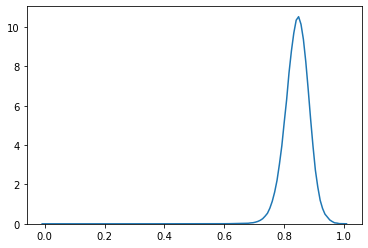

In [695]:
randidx = np.random.choice(fps_short.shape[0], 1000, replace=False)
rsample = fps_short[randidx]
rsimilarities = fast_jaccard(rsample, rsample)
kdeplot(squareform(rsimilarities))

In [698]:
import tqdm
s = list()
for ligand, target, rank in tqdm.tqdm_notebook(zip(ligand_idx, target_idx, ranks)):
    print(ligand, target, rank)
    test_fingerprint = fps_split[ligand]
    train_positives_idx,_ = train[:,target].nonzero()
    train_positives = fps_split[train_positives_idx]
    
    
    similarities = fast_dice(test_fingerprint, train_positives)
#     if np.min(similarities)==0.0:
#         break
        
    s.append(np.mean(similarities))
    #kdeplot(similarities[0])
#kdeplot(squareform(rsimilarities), linewidth=5)

0 11 2.0
0 36 23.0
0 168 18.0
0 173 36.0
0 216 104.0
63 154 4.0
95 76 2.0
283 154 5.0
460 165 224.0
738 95 14.0
789 45 67.0
911 82 13.0
911 187 87.0
932 17 15.0
983 98 15.0
1066 164 53.0
1120 60 34.0
1356 26 5.0
1388 165 73.0
1482 165 26.0
1609 7 1.0
1680 120 1.0
1680 158 3.0
1721 66 217.0
1762 158 2.0
1762 170 1.0
1961 68 143.0
2219 81 1.0
2219 115 2.0
2274 202 108.0
2295 132 1.0
2295 134 4.0
2295 155 2.0
2333 217 79.0
2466 98 170.0
2466 151 2.0
2846 81 2.0
2846 109 1.0
2846 115 3.0
2896 181 1.0
2916 81 1.0
2916 115 2.0
3063 181 1.0
3165 81 1.0
3165 115 2.0
3330 112 1.0
3615 83 1.0
4083 25 2.0
4083 127 1.0
4108 55 1.0
4510 71 1.0
4510 112 2.0
5173 181 1.0
5174 181 1.0
5635 79 179.0
5667 181 1.0
5746 181 1.0
5932 45 13.0
5967 68 17.0
5985 68 36.0
6041 68 19.0
6088 68 18.0
6193 68 20.0
6193 228 5.0
6346 43 22.0
6346 116 14.0
6402 68 26.0
6402 228 5.0
6703 68 20.0
6703 228 5.0
6827 68 25.0
6827 228 5.0
7275 109 2.0
7328 193 70.0
7592 69 32.0
7592 86 1.0
7850 43 35.0
7934 91 21.0
7952 69 

43668 151 105.0
43668 152 97.0
43668 160 107.0
43668 185 148.0
43800 72 124.0
43800 213 182.0
43911 151 2.0
43911 152 3.0
43911 160 1.0
44172 158 1.0
44189 190 4.0
44289 147 1.0
44289 161 2.0
44301 23 42.0
44301 33 15.0
44301 67 4.0
44301 147 10.0
44301 150 1.0
44323 158 1.0
44401 147 1.0
44401 161 2.0
44461 112 1.0
44504 207 53.0
44544 158 1.0
44683 158 1.0
44825 85 25.0
44909 125 1.0
44941 109 2.0
45002 98 179.0
45186 165 157.0
45308 49 38.0
45308 101 54.0
45487 137 102.0
45487 185 98.0
45629 181 1.0
45834 149 174.0
46022 51 4.0
46361 9 3.0
46436 150 1.0
46440 123 14.0
46492 198 132.0
46535 72 6.0
46535 131 12.0
46536 150 1.0
46562 9 5.0
46639 9 5.0
46639 14 11.0
46639 28 16.0
46639 33 9.0
46639 72 13.0
46639 131 21.0
46639 165 61.0
46639 213 17.0
46677 121 4.0
46724 9 3.0
46724 72 6.0
46724 131 14.0
46724 165 147.0
46861 151 60.0
46861 152 59.0
46861 185 71.0
47075 67 4.0
47075 142 9.0
47209 132 2.0
47209 163 3.0
47263 9 2.0
47285 72 1.0
47285 131 11.0
47309 9 9.0
47309 11 2.0
47309

89246 149 32.0
89449 13 2.0
89702 51 19.0
89798 98 5.0
89847 32 46.0
89847 194 3.0
89912 88 2.0
90138 147 1.0
90313 77 4.0
90387 79 211.0
90569 86 11.0
90740 159 1.0
90840 77 4.0
91101 165 169.0
91128 77 6.0
91128 87 4.0
91180 77 7.0
91234 224 58.0
91506 77 6.0
92040 163 2.0
92144 26 6.0
92389 131 14.0
92585 99 145.0
92748 121 181.0
93134 77 2.0
93601 220 4.0
93643 72 1.0
94070 88 2.0
94209 60 30.0
95108 86 5.0
95512 229 204.0
95605 7 2.0
95605 153 1.0
95641 147 1.0
95641 161 2.0
95716 158 1.0
95763 65 209.0
95763 76 164.0
95763 84 197.0
95763 87 203.0
95775 229 132.0
95781 67 21.0
95781 135 13.0
95781 142 30.0
95781 168 18.0
96804 165 230.0
97215 165 2.0
97440 165 9.0
97880 69 1.0
97880 105 2.0
97923 77 7.0
98069 125 1.0
98791 9 11.0
98791 11 15.0
98791 26 14.0
98791 28 1.0
98791 43 38.0
98791 116 7.0
98791 124 24.0
98791 129 3.0
98791 189 8.0
98791 190 4.0
99365 65 2.0
99515 24 7.0
99533 0 20.0
99533 33 13.0
99533 66 8.0
99533 67 17.0
99533 102 7.0
99533 150 12.0
99533 176 4.0
99533 

129848 0 15.0
129848 9 6.0
129848 11 3.0
129848 28 1.0
129848 32 42.0
129848 67 16.0
129848 72 10.0
129848 82 35.0
129848 113 18.0
129848 121 41.0
129848 122 49.0
129848 126 9.0
129848 133 5.0
129848 135 25.0
129848 141 21.0
129848 142 23.0
129848 147 46.0
129848 161 64.0
129848 168 13.0
129848 169 28.0
129848 173 7.0
129848 176 22.0
129848 182 40.0
129848 189 2.0
129848 194 8.0
129848 202 56.0
129848 204 17.0
129848 208 12.0
129848 212 47.0
129848 225 4.0
130078 7 218.0
130078 60 15.0
130078 65 224.0
130078 96 135.0
130078 113 16.0
130078 148 3.0
130614 33 25.0
130614 60 20.0
130626 0 18.0
130626 4 35.0
130626 9 14.0
130626 28 2.0
130626 32 41.0
130626 43 30.0
130626 67 10.0
130626 72 9.0
130626 82 32.0
130626 116 6.0
130626 118 12.0
130626 122 51.0
130626 126 13.0
130626 129 1.0
130626 133 5.0
130626 135 16.0
130626 141 22.0
130626 143 19.0
130626 147 24.0
130626 157 15.0
130626 161 37.0
130626 169 33.0
130626 176 17.0
130626 182 40.0
130626 187 63.0
130626 190 3.0
130626 192 7.0
130

156672 120 12.0
156672 158 13.0
156672 170 11.0
156704 154 3.0
156727 47 10.0
156727 120 13.0
156727 158 23.0
156727 170 11.0
156805 154 3.0
156904 131 11.0
157114 154 3.0


In [636]:
# from rdkit import Chem
# from rdkit.Chem import Draw
# from rdkit.Chem.Draw import IPythonConsole
# from scipy.spatial.distance import dice

# test_smiles = smiles_short.iloc[ligand]
# train_positives_smiles = smiles_short.iloc[train_positives_idx]

# gen_mo = rdFingerprintGenerator.GetMorganGenerator()
# m1 = Chem.MolFromSmiles(test_smiles)
# f1 = np.array(gen_mo.GetFingerprint(m1))
# m2 = Chem.MolFromSmiles(smiles_short.iloc[train_positives_idx[np.argmin(similarities)]])
# f2 = np.array(gen_mo.GetFingerprint(m2))

# Draw.MolsToGridImage([m1, m2])

In [691]:
from statsmodels.distributions.empirical_distribution import ECDF


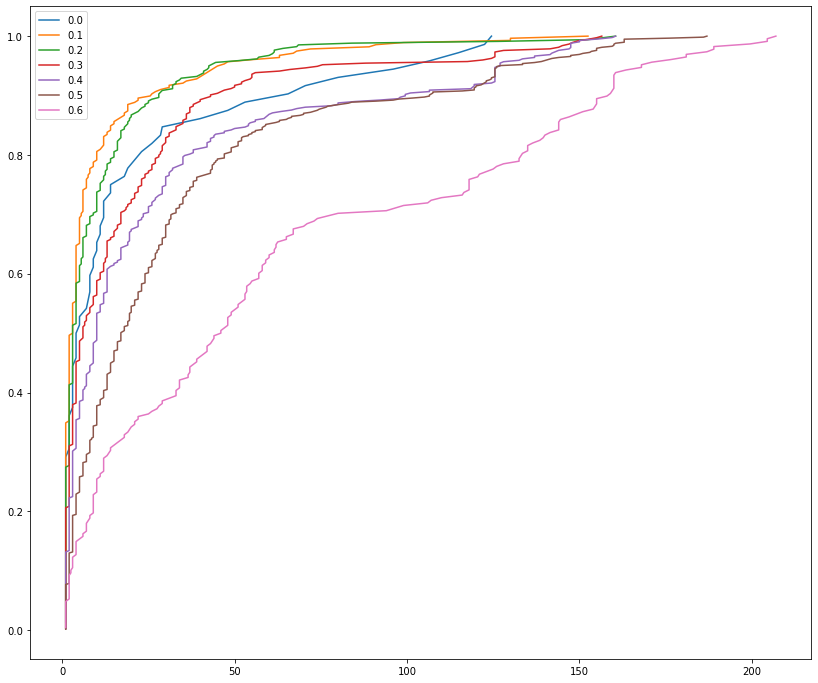

In [693]:
plt.figure(figsize=(14,12))
for start in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    if start==0.6:
        end = 1
    else:
        end = start+0.1
    mask = (np.array(s)>start) & (np.array(s)<end)
    ranks_m = ranks[mask]
    s_m = np.array(s)[mask]
    ecdf = ECDF(ranks_m)
    plt.plot(ecdf.x, ecdf.y, label=start)
#     print(np.median(ranks_m))
#     x, y = np.histogram(ranks_m, bins=55)
#     plt.plot(y[:-1], x/x.max(), label=start, linewidth=3)    
plt.legend()

In [704]:
d = pd.DataFrame()
d['ranks']=ranks
d['s']=s

In [723]:
i = pd.qcut(s, 8)

In [731]:
a, b= pd.qcut(s, 8, retbins=True)

In [732]:
b

array([0.39012341, 0.66328549, 0.68343303, 0.69747671, 0.70991222,
       0.72155357, 0.73819818, 0.76129265, 0.99839084])

(0, 20)

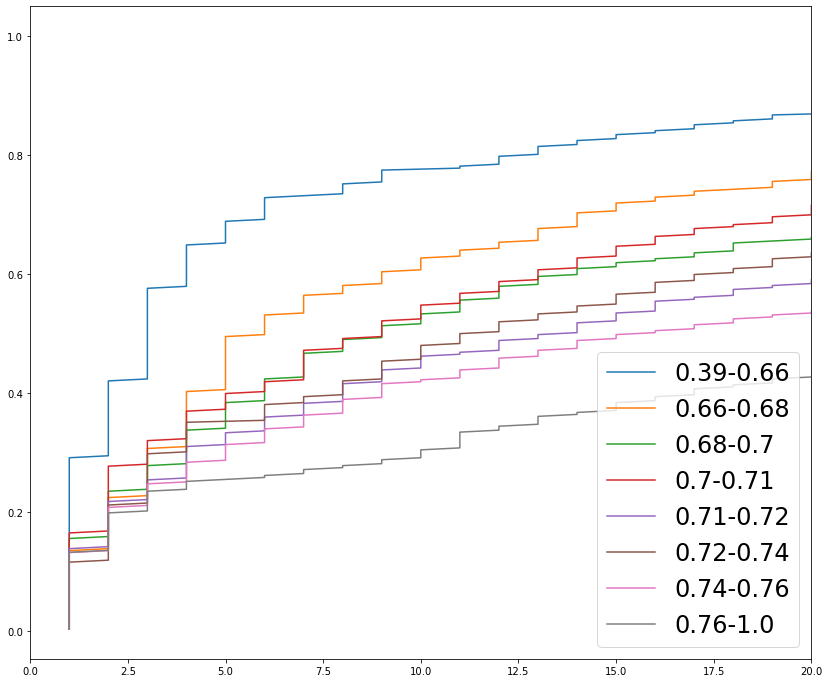

In [741]:
plt.figure(figsize=(14,12))
_, bins = pd.qcut(s, 8, retbins=True)
for interval in range(len(bins)-1):
    mask = (np.array(s)>bins[interval]) & (np.array(s)<bins[interval+1])
    ranks_m = ranks[mask]
    s_m = np.array(s)[mask]
    ecdf = ECDF(ranks_m)
    plt.plot(ecdf.x, ecdf.y, label=str(np.around(bins[interval],2))+'-'+str(np.around(bins[interval+1], 2)))

plt.legend(fontsize=24)
plt.xlim(0,20)

In [699]:
plt.figure(figsize=(14,12))
for start in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    if start==0.6:
        end = 1
    else:
        end = start+0.1
    mask = (np.array(s)>start) & (np.array(s)<end)
    ranks_m = ranks[mask]
    s_m = np.array(s)[mask]
    ecdf = ECDF(ranks_m)
    plt.plot(ecdf.x, ecdf.y, label=start)
#     print(np.median(ranks_m))
#     x, y = np.histogram(ranks_m, bins=55)
#     plt.plot(y[:-1], x/x.max(), label=start, linewidth=3)    
plt.legend()

ZeroDivisionError: float division by zero

<Figure size 1008x864 with 0 Axes>

(array([169.,  62.,  73.,  44.,  43.,  35.,  32.,  32.,  29.,  29.,  15.,
         19.,  20.,  19.,  15.,  14.,   8.,   9.,   6.,   6.,   4.,   3.,
          1.,   0.,   2.,   3.,   2.,   1.,   7.,   1.,   3.,  11.,  10.,
         15.,   0.,   9.,   5.,   5.,   7.,   4.,   6.,   8.,  13.,   5.,
          2.,   1.,   2.,   0.,   2.,   3.,   2.,   0.,   1.,   0.,   3.]),
 array([  1.        ,   4.74545455,   8.49090909,  12.23636364,
         15.98181818,  19.72727273,  23.47272727,  27.21818182,
         30.96363636,  34.70909091,  38.45454545,  42.2       ,
         45.94545455,  49.69090909,  53.43636364,  57.18181818,
         60.92727273,  64.67272727,  68.41818182,  72.16363636,
         75.90909091,  79.65454545,  83.4       ,  87.14545455,
         90.89090909,  94.63636364,  98.38181818, 102.12727273,
        105.87272727, 109.61818182, 113.36363636, 117.10909091,
        120.85454545, 124.6       , 128.34545455, 132.09090909,
        135.83636364, 139.58181818, 143.32727273, 14

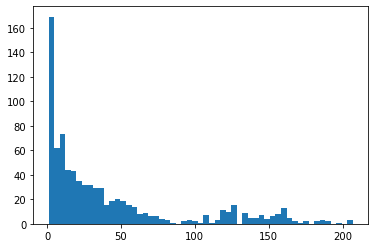

In [688]:
plt.hist(ranks_m, bins=55)

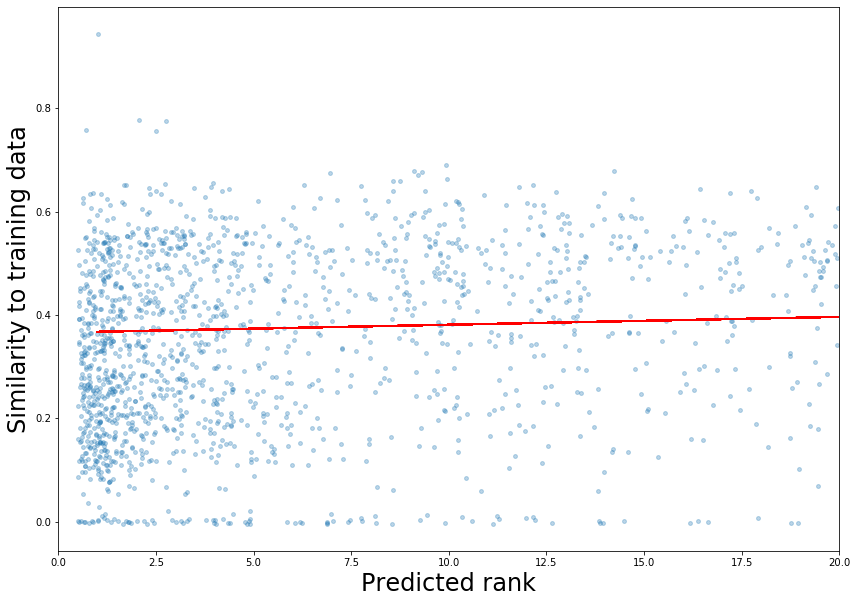

In [641]:
#kdeplot(ranks, s)
plt.figure(figsize=(14,10))
plt.scatter(ranks+np.random.uniform(-0.5, 0.5, len(ranks)), 
            np.array(s)+np.random.uniform(-0.005, 0.005, len(ranks)), s=15, alpha=0.3)
plt.xlim(0,20)
plt.xlabel('Predicted rank', fontsize=24)
plt.ylabel('Similarity to training data', fontsize=24)
plt.plot(ranks, intercept + slope*ranks, 'r', label='fitted line')

In [369]:
from scipy.stats import linregress
from statsmodels.regression.quantile_regression import QuantReg
qr = QuantReg(s_m, np.vstack([np.ones(len(ranks_m)), ranks_m]).T)
res = qr.fit(0.5)
res.summary()

In [650]:
qr = QuantReg(s_m, np.vstack([np.ones(len(ranks_m)), ranks_m]).T)

In [651]:
res = qr.fit(0.5)

In [652]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:              0.04234
Model:                       QuantReg   Bandwidth:                     0.07234
Method:                 Least Squares   Sparsity:                       0.5059
Date:                Tue, 14 Apr 2020   No. Observations:                 1620
Time:                        16:03:58   Df Residuals:                     1618
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2964      0.009     31.799      0.000       0.278       0.315
x1             0.0108      0.001      8.902      0.000       0.008       0.013
==============================================================================
"""

In [394]:
intercept, slope = res.params

In [653]:
slope, intercept, r_value, p_value, std_err =linregress(ranks_m, s_m)
linregress(ranks, s)


LinregressResult(slope=0.0013860116081385037, intercept=0.34988940411151864, rvalue=0.30364255216640523, pvalue=7.846712412946286e-53, stderr=8.840807368859117e-05)

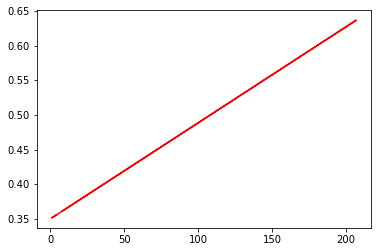

In [367]:
plt.plot(ranks, intercept + slope*ranks, 'r', label='fitted line')

In [343]:
from scipy.stats import pearsonr

In [359]:
pearsonr(ranks, s)

(0.30364255216640496, 7.84671241293409e-53)

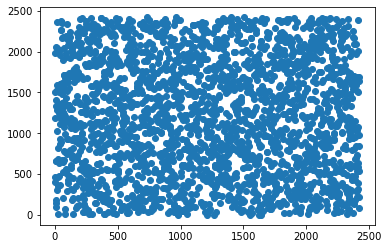

In [360]:
plt.scatter(np.argsort(ranks), np.argsort(s))

In [361]:
from scipy.stats import rankdata

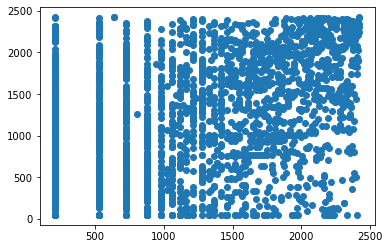

In [362]:
plt.scatter(rankdata(ranks), rankdata(s))

In [337]:
np.argmax(s)

1356

In [265]:
ligand_idx

array([     0,      0,      0, ..., 156805, 156904, 157114], dtype=int32)

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


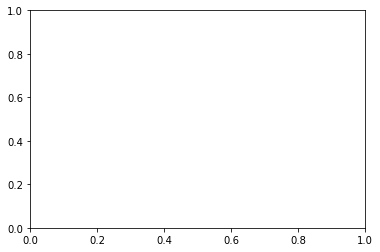

In [266]:
_ix = 221

test_fingerprint = fps_short[ligand_idx[_ix]]
train_positives_idx,_ = train[:,target_idx[_ix]].nonzero()
train_positives = fps_short[train_positives_idx]
    

similarities = fast_dice(test_fingerprint, train_positives)
s.append(np.mean(similarities))
kdeplot(similarities[0])

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

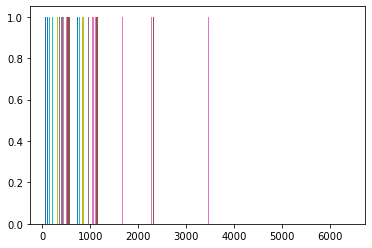

In [273]:
plt.hist(train.sum(0).flatten())

In [278]:
b =np.array(train.sum(0))[0]

In [279]:
b[b.argsort()]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       2.000e+00, 3.000e+00, 9.000e+00, 9.000e+00, 1.700e+01, 1.900e+01,
       2.200e+01, 4.800e+01, 5.200e+01, 5.400e+01, 5.700e+01, 6.100e+01,
       7.200e+01, 8.100e+01, 8.500e+01, 9.300e+01, 9.700e+01, 9.800e+01,
       1.360e+02, 1.390e+02, 1.400e+02, 1.450e+02, 1.520e+02, 1.620e+02,
       1.620e+02, 1.840e+02, 1.910e+02, 1.930e+02, 1.980e+02, 1.980e+02,
       2.010e+02, 2.050e+02, 2.050e+02, 2.120e+02, 2.170e+02, 2.380e+02,
       2.420e+02, 2.470e+02, 2.640e+02, 2.640e+02, 2.640e+02, 2.720e+02,
       2.740e+02, 2.790e+02, 2.960e+02, 2.980e+02, 3.010e+02, 3.090e+02,
       3.090e+02, 3.110e+02, 3.120e+02, 3.150e+02, 3.160e+02, 3.210e+02,
       3.240e+02, 3.300e+02, 3.370e+02, 3.390e+02, 3.480e+02, 3.510e+02,
       3.640e+02, 3.710e+02, 3.780e+02, 3.800e+02, 3.870e+02, 4.170e+02,
       4.330e+02, 4.430e+02, 4.450e+02, 4.490e+02, 4.530e+02, 4.560e+02,
       4.570e+02, 4.590e+02, 4.660e+02, 4.660e+02, 

In [94]:
import random
prev = 0.;
record = list()
for i in range(0,10000):
        new = 0.99*prev + 2*random.uniform(0,1) - 1
        record.append(new/2. + 0.5)
        prev = new
        
a = np.array(record)

In [95]:
from skimage.measure import block_reduce

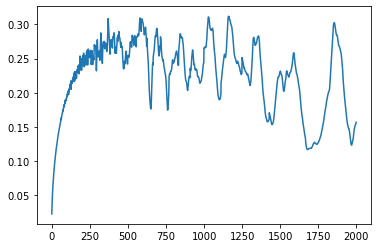

In [107]:
plt.plot([sem(block_reduce(a, (i,), func=np.mean)) for i in range(1,2000)])

In [105]:
from scipy.stats import sem

In [99]:
a.shape

(10000,)

In [88]:
train, test = utils.load_time_split()

In [89]:
allnames = pd.read_csv('../data/subset_targets', header=None)

In [90]:
numligs = np.array(test.sum(0))[0]

In [91]:
numligs.shape

(243,)

In [92]:
allnames['numligs']=numligs

In [96]:
allnames.sort_values('numligs', ascending=False).iloc[:20]

,0,numligs
105,HERG,71.0
161,Histone deacetylase 8,56.0
165,Carbonic anhydrase XII,56.0
84,Serotonin 2a (5-HT2a) receptor,54.0
74,Arachidonate 5-lipoxygenase,47.0
79,Serine/threonine-protein kinase Aurora-B,44.0
36,Tyrosine-protein kinase receptor FLT3,37.0
138,Vascular endothelial growth factor receptor 2,36.0
150,Rho-associated protein kinase 2,36.0
71,Serotonin 1a (5-HT1a) receptor,36.0


In [75]:
allnames

,Leucine-rich repeat serine/threonine-protein kinase 2
0,Bromodomain-containing protein 4
1,Nuclear receptor ROR-gamma
2,Nicotinamide phosphoribosyltransferase
3,Corticotropin releasing factor receptor 1
4,Prostanoid EP1 receptor
...,...
237,Glucose-dependent insulinotropic receptor
238,Prostaglandin E synthase
239,Mitogen-activated protein kinase kinase kinase 14
240,Smoothened homolog


In [4]:
def calc_ecdf(ranks):
    ecdf = [(ranks<i).sum()/len(ranks) for i in range(0, 243)]
    return ecdf

def calc_kde(ranks, xs=np.linspace(0,243,243)):
    #kde:
    density = gaussian_kde(ranks)
    density.covariance_factor= lambda : 0.25
    density._compute_covariance()
    return density(xs)

In [5]:
##First we will take the three best performing algorithms and
##take the geometric average of their rankings:
ranks = [np.load(name+'.npy') for name in ['label_correlation', 'hpo_implicit_bpr', 'hpo_lightfm_warp']]
geo_avg = np.power(ranks[0]*ranks[1]*ranks[2], 1/3)

##Now we can proceed to graph all the rankings:
##Filenames for the algos to load parameters:
filenames = ['geometric_avg', 'label_correlation', 'hpo_implicit_als', 'hpo_implicit_bpr',
             'hpo_lightfm_warp', 'hpo_lightfm_bpr']

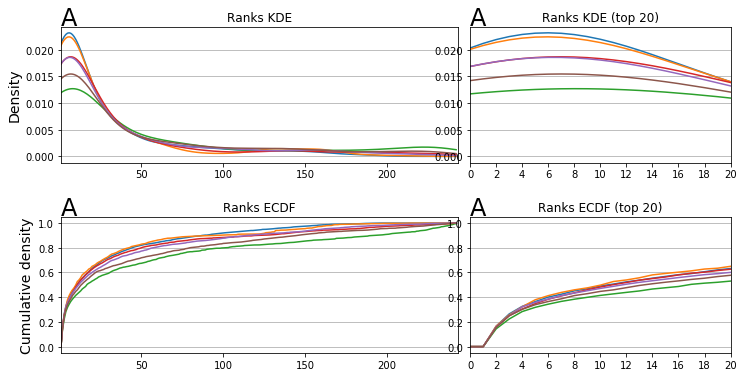

In [30]:
##Plot second figure:
fig = plt.figure(figsize=(12,6), constrained_layout=True)
grid = plt.GridSpec(2, 5, wspace=0.1, hspace=0.4)
ax1 = fig.add_subplot(grid[0, :3])
ax2 = fig.add_subplot(grid[0, 3:])
ax3 = fig.add_subplot(grid[1, :3])
ax4 = fig.add_subplot(grid[1, 3:]);
ax = [ax1, ax2, ax3, ax4]

def plot_fig_label(ax, lab):
    ax.text(-0.0, 1.15, lab, transform=ax.transAxes,
        fontsize=24, va='top', ha='left')

for name in filenames:
    ranks = np.load(name+'.npy')
    kde = calc_kde(ranks)
    ecdf = calc_ecdf(ranks)
    ax1.plot(kde, label=name)
    ax2.plot(kde, label=name)
    ax3.plot(ecdf, label=name)
    ax4.plot(ecdf, label=name)

ax1.set_xlim(1,243)
ax1.set_title('Ranks KDE')
ax1.set_ylabel('Density', fontsize=14)
ax1.yaxis.grid()
plot_fig_label(ax1, 'A')

ax2.set_xlim(1,20)
ax2.set_title('Ranks KDE (top 20)')
ax2.yaxis.grid()
ax2.set_xticks(np.arange(0,21,2))
plot_fig_label(ax2, 'A')

ax3.set_xlim(1,243)
ax3.set_title('Ranks ECDF')
ax3.set_ylabel('Cumulative density', fontsize=14)
ax3.yaxis.grid()
plot_fig_label(ax3, 'A')

ax4.set_xlim(1,20)
ax4.set_title('Ranks ECDF (top 20)')
ax4.yaxis.grid()
ax4.set_xticks(np.arange(0,21,2))
plot_fig_label(ax4, 'A')


In [159]:
import matplotlib.pyplot as plt
import pymc3 as pm
from scipy.stats import gaussian_kde
import numpy as np
plt.style.use('seaborn')


def calc_hpd(ranks, statistic=np.mean):
    with pm.Model() as model:
        #prior on statistic of interest:
        a = pm.Normal('a', mu=statistic(ranks), sigma=10.0)
        #'nuisance' parameter:
        b = pm.HalfNormal('b', sigma=10.0)
        #likelihood:
        if statistic==np.mean:
            y = pm.Normal('y', mu=a, sigma=b, observed=ranks)
        elif statistic==np.median:
            y = pm.Laplace('y', mu=a, b=b,observed=ranks)

        trace = pm.sample(draws=500, tune=500, chains=2, target_accept=0.9)
        
    return trace

def calc_kde(ranks, xs=np.linspace(0,243,243)):
    #kde:
    density = gaussian_kde(ranks)
    density.covariance_factor= lambda : 0.25
    density._compute_covariance()
    return density(xs)

# def calc_ecdf(ranks):
#     ecdf = [(ranks<i).sum()/len(ranks) for i in range(0, 243)]
#     return ecdf

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [160]:
r_lc = np.load('label_correlation.npy')
median_lc = calc_hpd(r_lc, np.median)
r_ibpr = np.load('hpo_implicit_bpr.npy')
median_ibpr = calc_hpd(r_ibpr, np.median)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1093.73draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 814.35draws/s] 


ValueError: operands could not be broadcast together with shapes (100,) (200,) 

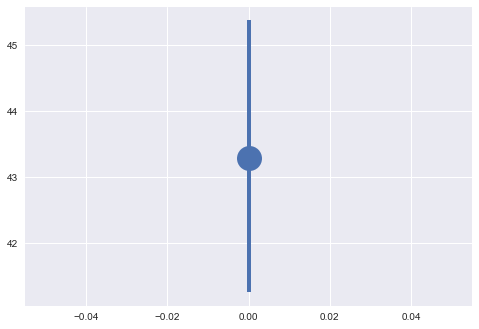

In [74]:
plt.errorbar(0, m, yerr = np.array([m-hpd[0], hpd[1]-m])[:,None],fmt='o', linewidth=4, markersize=25, capsize=3)
plt.fill_betweenx(xs,d,0, alpha=0.4)

In [ ]:
d

In [11]:
##First we will take the three best performing algorithms and
##take the geometric average of their rankings:
ranks = [np.load(name+'.npy') for name in ['label_correlation', 'hpo_implicit_bpr', 'hpo_lightfm_warp']]
geo_avg = np.power(ranks[0]*ranks[1]*ranks[2], 1/3)
np.save('geometric_avg', geo_avg)

##Now we can proceed to graph all the rankings:
##Filenames for the algos to load parameters:
filenames = ['geometric_avg', 'label_correlation', 'hpo_implicit_als', 'hpo_implicit_bpr',
             'hpo_lightfm_warp', 'hpo_lightfm_bpr']

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 858.62draws/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1392.45draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 855.63draws/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 886.17draws/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains 

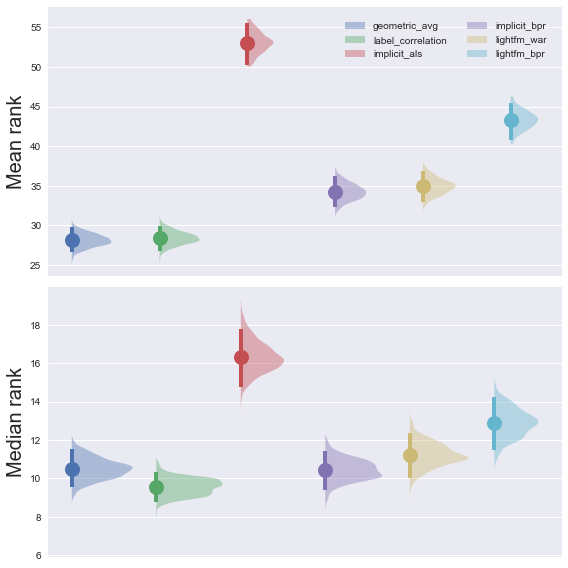

In [101]:
##Plot first figure:
fig, ax = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(8)

for count, name in enumerate(filenames):
    ranks = np.load(name+'.npy')
    mean_trace = calc_hpd(ranks, np.mean)
    median_trace = calc_hpd(ranks, np.median)
    
    for j,trace in zip([0,1], [mean_trace, median_trace]):
        m = np.mean(trace['a'])
        hpd = pm.hpd(trace['a'])
        xs = np.linspace(m-3,m+3,100)
        density = calc_kde(trace['a'], xs=xs)
        
        ax[j].errorbar(count, m, yerr = np.array([m-hpd[0], hpd[1]-m])[:,None],
                       fmt='o', linewidth=4, markersize=15, capsize=3)
        ax[j].fill_betweenx(xs,density+count,count, alpha=0.4,label=name.strip('hpo_'))


ax[0].set_ylabel('Mean rank', fontsize=20)
ax[0].set_xticks([])
ax[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, ncol=2)

ax[1].set_ylabel('Median rank', fontsize=20)
ax[1].set_xticks([])

plt.tight_layout()

In [10]:
def calc_kde(ranks, xs=np.linspace(0,243,243)):
    #kde:
    density = gaussian_kde(ranks)
    density.covariance_factor= lambda : 0.25
    density._compute_covariance()
    return density(xs)

In [7]:
def plot_fig_label(ax, lab):
    ax.text(0, 1.15, lab, transform=ax.transAxes,
        fontsize=24, va='top', ha='left')

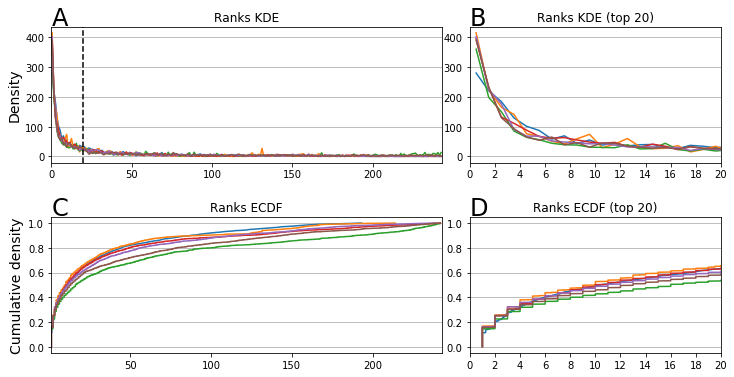

In [139]:
##Plot second figure:
fig = plt.figure(figsize=(12,6))
grid = plt.GridSpec(2, 5, wspace=0.25, hspace=0.4)
ax1 = fig.add_subplot(grid[0, :3])
ax2 = fig.add_subplot(grid[0, 3:])
ax3 = fig.add_subplot(grid[1, :3])
ax4 = fig.add_subplot(grid[1, 3:]);
ax = [ax1, ax2, ax3, ax4]


for name in filenames:
    ranks = np.load(name+'.npy')
    inverse_ranks = 1/ranks
    #kde = calc_kde(inverse_ranks, xs= np.linspace(0,1.5,100))
    ecdf = ECDF(ranks)
    
    #ax1.plot(np.linspace(0,1.5,100), kde, label=name)
    #ax1.hist(ranks, bins=243, alpha=0.5)
    
    #n,x,_ = plt.hist(ranks, bins = np.linspace(0,243,243), histtype=u'step' )
    n,x =np.histogram(ranks, bins = np.linspace(0,243,243))
    bin_centers = 0.5*(x[1:]+x[:-1])
    ax1.plot(bin_centers,n)
    ax2.plot(bin_centers,n)
    #ax2.plot(kde, label=name)
    #ax2.hist(ranks, bins=243, alpha=0.5)
    
#     ax3.scatter(ecdf.x, ecdf.y, label=name)
#     ax4.scatter(ecdf.x, ecdf.y, label=name)
    ax3.plot(ecdf.x, ecdf.y, label=name)
    ax4.plot(ecdf.x, ecdf.y, label=name)

ax1.set_xlim(0,243)
ax1.set_title('Ranks KDE')
ax1.set_ylabel('Density', fontsize=14)
ax1.yaxis.grid()
ax1.axvline(20, linestyle='--', c='k')
plot_fig_label(ax1, 'A')

ax2.set_xlim(1,20)
ax2.set_title('Ranks KDE (top 20)')
ax2.yaxis.grid()
ax2.set_xticks(np.arange(0,21,2))
plot_fig_label(ax2, 'B')

ax3.set_xlim(1,243)
ax3.set_title('Ranks ECDF')
ax3.set_ylabel('Cumulative density', fontsize=14)
ax3.yaxis.grid()
plot_fig_label(ax3, 'C')

ax4.set_xlim(1,20)
ax4.set_title('Ranks ECDF (top 20)')
ax4.yaxis.grid()
ax4.set_xticks(np.arange(0,21,2))
plot_fig_label(ax4, 'D')


(array([980., 323., 122., 104., 119.,   0.,  93.,   0., 130.,   0.,   0.,
          0., 233.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 390.]),
 array([0.00413223, 0.04396694, 0.08380165, 0.12363636, 0.16347107,
        0.20330579, 0.2431405 , 0.28297521, 0.32280992, 0.36264463,
        0.40247934, 0.44231405, 0.48214876, 0.52198347, 0.56181818,
        0.60165289, 0.6414876 , 0.68132231, 0.72115702, 0.76099174,
        0.80082645, 0.84066116, 0.88049587, 0.92033058, 0.96016529,
        1.        ]),
 <a list of 25 Patch objects>)

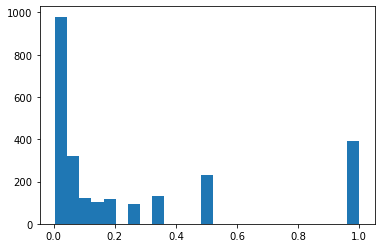

In [128]:
plt.hist(inverse_ranks, bins=25)

In [ ]:
for name in filenames:
    ranks = np.load(name+'.npy')
    plt.hist(ranks, bins=243, alpha=0.5)
    

geometric_avg 0.491579791499599
ModeResult(mode=array([1.]), count=array([280]))
label_correlation 0.5272654370489174
ModeResult(mode=array([1.]), count=array([415]))
hpo_implicit_als 0.42742582197273454
ModeResult(mode=array([1.]), count=array([360]))
hpo_implicit_bpr 0.5020048115477145
ModeResult(mode=array([1.]), count=array([395]))
hpo_lightfm_warp 0.4883720930232558
ModeResult(mode=array([1.]), count=array([402]))
hpo_lightfm_bpr 0.4599037690457097
ModeResult(mode=array([1.]), count=array([390]))


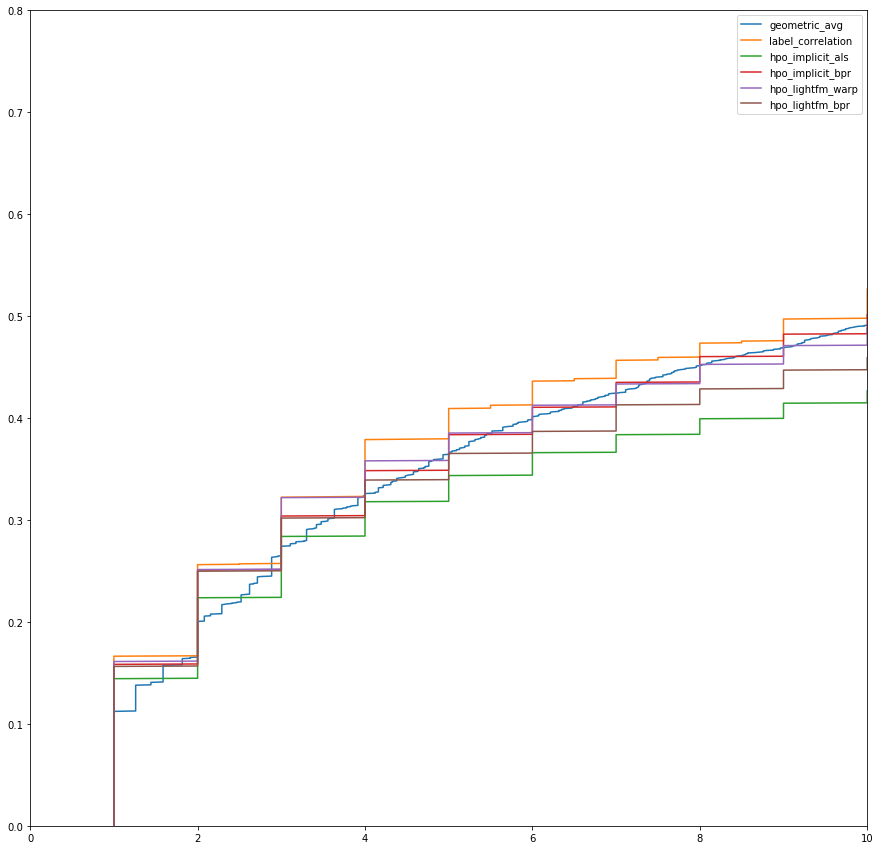

In [154]:
plt.figure(figsize=(15,15))
for name in filenames:
    ranks = np.load(name+'.npy')
    ecdf = ECDF(ranks)
    print(name, ecdf.y[np.where(ecdf.x>10)[0][0]])
    print(mode(ranks))
    #print(name, len(ranks[ranks<=1])/len(ranks))
    #kde = calc_kde(ranks)
    #ecdf = calc_ecdf(ranks)
    #print(np.arange(243)[(np.array(ecdf)>0.8)][0])
    plt.plot(ecdf.x, ecdf.y, label=name)
    
plt.xlim(0,10)
plt.ylim(0,0.8)
plt.legend()

In [152]:
from scipy.stats import mode

In [145]:
np.where(ecdf.x>5)[0][0]

912

In [144]:
ecdf.y[912]

0.3656776263031275

In [37]:
np.arange(243)[(np.array(ecdf)>0.8)]

array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242])

In [17]:
with pm.Model() as model:
    #prior on statistic of interest:
    a = pm.Normal('a', mu=np.median(ranks), sigma=10.0)
    #'nuisance' parameter:
    b = pm.HalfNormal('b', sigma=10.0)

    y = pm.Laplace('y', mu=a, b=b,observed=ranks)

    trace = pm.sample(draws=500, tune=500, chains=2, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1225.29draws/s]


In [76]:
density = gaussian_kde(trace['a'])
m = np.mean(trace['a'])
xs = np.linspace(m-3,m+3,100)
density.covariance_factor= lambda : 0.25
density._compute_covariance()
d = density(xs)

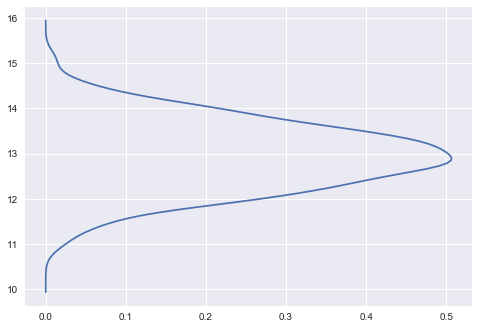

In [78]:
plt.plot(d,xs)

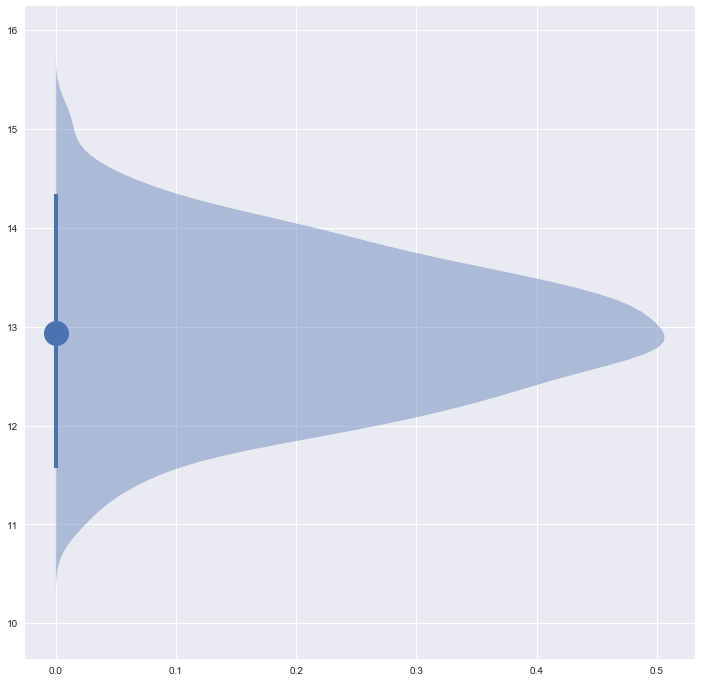

In [79]:
#plt.plot(d,xs)
plt.figure(figsize=(12,12))
hpd = pm.hpd(trace['a'])

plt.errorbar(0, m, yerr = np.array([m-hpd[0], hpd[1]-m])[:,None],fmt='o', linewidth=4, markersize=25, capsize=3)
plt.fill_betweenx(xs,d,0, alpha=0.4)

In [46]:
plt.errorbar(count, y, yerr=np.array([y-hpd[0], hpd[1]-y])[:,None],
                      label=fp,
                      fmt='o',
                      linewidth=4,
                     markersize=15, mfc='white', capsize=3)

array([11.5715218 , 14.34474948])

In [48]:
hpd

array([11.5715218 , 14.34474948])

In [53]:
np.array([m-hpd[0], hpd[1]-y])

array([1.3682401738086263, Elemwise{sub,no_inplace}.0], dtype=object)

In [56]:
hpd[1]-m

1.4049875053226621

In [2]:
filenames = ['label_correlation', 'hpo_implicit_als', 'hpo_implicit_bpr',
             'hpo_lightfm_warp', 'hpo_lightfm_bpr']



ranks  = [np.load(name+'.npy') for name in filenames]

In [3]:
def calc_kde(ranks):
    #kde:
    density = gaussian_kde(ranks)
    xs = np.linspace(0,243,243)
    density.covariance_factor= lambda : 0.25
    density._compute_covariance()
    return density(xs)

def calc_ecdf(ranks):
    ecdf = [(ranks<i).sum()/len(ranks) for i in range(0, 243)]
    return ecdf

In [4]:
geometric_average_ranks = np.power(ranks[0]*ranks[2] * ranks[3], 1/3)

In [5]:
geometric_average_ranks

array([ 4.62606501, 68.57839959, 41.90758213, ...,  3.30192725,
        3.41995189,  3.30192725])

NameError: name 'ECDF' is not defined

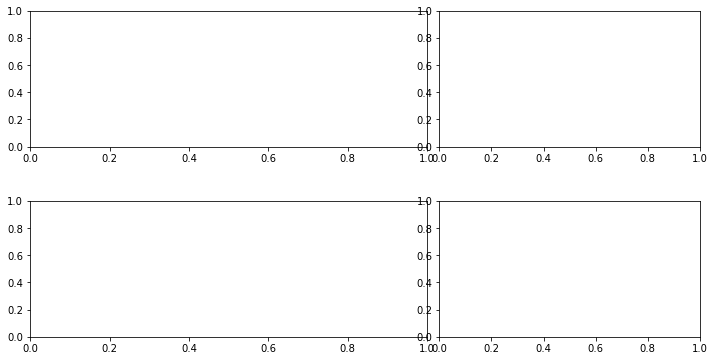

In [103]:
fig = plt.figure(figsize=(12,6))
grid = plt.GridSpec(2, 5, wspace=0.1, hspace=0.4)
ax1 = fig.add_subplot(grid[0, :3])
ax2 = fig.add_subplot(grid[0, 3:])
ax3 = fig.add_subplot(grid[1, :3])
ax4 = fig.add_subplot(grid[1, 3:]);
ax = [ax1, ax2, ax3, ax4]
for name in filenames:
    ra = np.load(name+'.npy')
    kde = calc_kde(ra)
    #ecdf = calc_ecdf(ra)
    ecdf = ECDF(ra)
    ax1.plot(kde, label=name)
    ax2.plot(kde, label=name)
    ax3.plot(ecdf, label=name)
    ax4.plot(ecdf, label=name)
    
kde = calc_kde(geometric_average_ranks)
ecdf = calc_ecdf(geometric_average_ranks)
ax1.plot(kde, label='geo')
ax2.plot(kde, label='geo')
ax3.plot(ecdf, label='geo')
ax4.plot(ecdf, label='gep')

ax1.set_xlim(0,243)
ax1.set_title('Ranks KDE')
ax1.set_ylabel('Density', fontsize=14)
ax1.yaxis.grid()

ax2.set_xlim(0,20)
ax2.set_title('Ranks KDE (top 20)')
ax2.yaxis.grid()

ax3.set_xlim(0,243)
ax3.set_title('Ranks ECDF')
ax3.set_ylabel('Cumulative density', fontsize=14)
ax3.yaxis.grid()

ax4.set_xlim(0,20)
ax4.set_title('Ranks ECDF (top 20)')
ax4.yaxis.grid()

plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

NameError: name 'prediction_ranks' is not defined

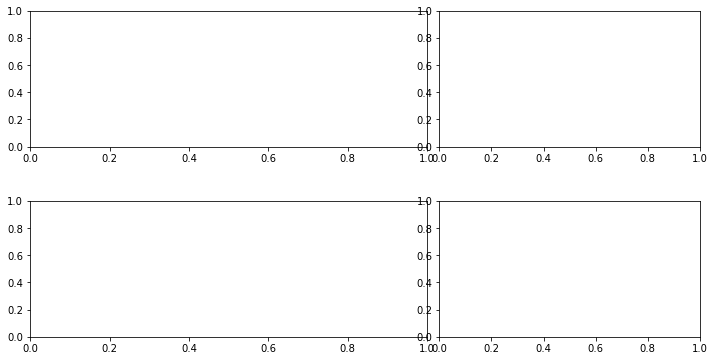

In [8]:
fig = plt.figure(figsize=(12,6))
grid = plt.GridSpec(2, 5, wspace=0.1, hspace=0.4)
ax1 = fig.add_subplot(grid[0, :3])
ax2 = fig.add_subplot(grid[0, 3:])
ax3 = fig.add_subplot(grid[1, :3])
ax4 = fig.add_subplot(grid[1, 3:]);
ax = [ax1, ax2, ax3, ax4]
for ra in [prediction_ranks]:
    kde = calc_kde(ra)
    ecdf = calc_ecdf(ra)
    ax1.plot(kde, label=name)
    ax2.plot(kde, label=name)
    ax3.plot(ecdf, label=name)
    ax4.plot(ecdf, label=name)
    
#kde = calc_kde(geometric_average_ranks)
#ecdf = calc_ecdf(geometric_average_ranks)
ax1.plot(kde, label='geo')
ax2.plot(kde, label='geo')
ax3.plot(ecdf, label='geo')
ax4.plot(ecdf, label='gep')

ax1.set_xlim(0,243)
ax1.set_title('Ranks KDE')
ax1.set_ylabel('Density', fontsize=14)
ax1.yaxis.grid()

ax2.set_xlim(0,20)
ax2.set_title('Ranks KDE (top 20)')
ax2.yaxis.grid()

ax3.set_xlim(0,243)
ax3.set_title('Ranks ECDF')
ax3.set_ylabel('Cumulative density', fontsize=14)
ax3.yaxis.grid()

ax4.set_xlim(0,20)
ax4.set_title('Ranks ECDF (top 20)')
ax4.yaxis.grid()

plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

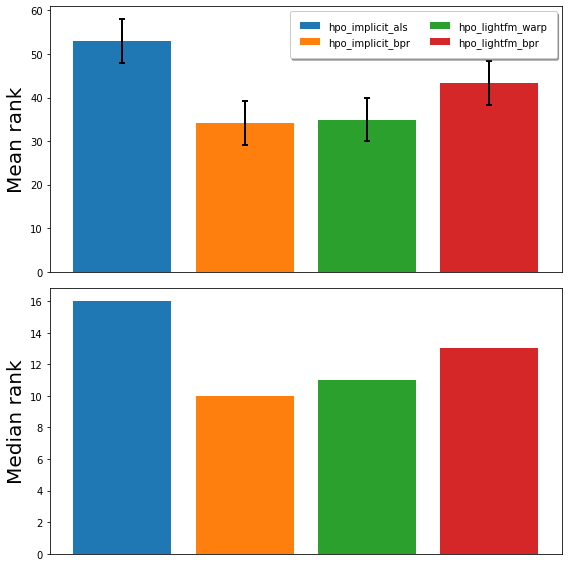

In [57]:
filenames = ['hpo_implicit_als', 'hpo_implicit_bpr',
             'hpo_lightfm_warp', 'hpo_lightfm_bpr']
##Plot first figure:
fig, ax = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(8)

for count, name in enumerate(filenames):
    ranks = np.load(name+'.npy')
    mean = np.mean(ranks)
    median = np.median(ranks)
    ax[0].bar(count, mean, label=name)
    ax[0].errorbar(count, mean, yerr=5, color='black', elinewidth=2, capsize=3, markeredgewidth=2);
    ax[1].bar(count, median, label=name)

ax[0].set_ylabel('Mean rank', fontsize=20)
ax[0].set_xticks([])
ax[1].set_ylabel('Median rank', fontsize=20)
ax[1].set_xticks([])

ax[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, ncol=2)


plt.tight_layout()
    #fig.savefig('statistics.png')
    #plt.close(fig)

In [54]:
interaction_matrix = sparse.load_npz('../data/interaction_matrix_pchembl.npz')
##interaction_matrix = np.array(interaction_matrix.todense())
#
interaction_dates = sparse.load_npz('../data/interaction_dates_pchembl.npz')
##interaction_dates = np.array(interaction_dates.todense())

The publication dates of the interactions are recorded in ChEMBL. Looking below we can see the distribution of years: 

In [9]:
#removing 'year=1' which were originally NaNs in ChEMBL:
_ = kdeplot(interaction_dates.data[interaction_dates.data>1950], shade=True)
#bonus - set 'cumulative=True' in kdeplot to visualize the amount of data that will be in the test set.
plt.axvline(2010, c='red', label='test/train split point')
plt.legend()

NameError: name 'interaction_dates' is not defined

These can thus be used to perform time-split cross validation, which simulates prospective validation. The below sets a year, and creates a training matrix with all interactions equal to or before that year, and a test matrix with all interactions from after that year. 

In [2]:
train, test = utils.load_time_split()

In [6]:
#sparse.csr_matrix(train)

In [7]:
# interaction_matrix = utils.load_subset()

In [108]:
from scipy.stats.mstats import rankdata
def evaluate_predictions(predictions, test, train):

    if isinstance(test, sparse.csr_matrix):
        test = test.toarray()
    if isinstance(train, sparse.csr_matrix):
        train = train.toarray()
    if isinstance(predictions, sparse.csr_matrix):
        predictions = predictions.toarray()

    row_mask = np.array(test.sum(axis=1)>0).reshape(-1,)
    test_masked = test[row_mask]
    get_ranks = test_masked.astype(bool) #this will select using boolean all test ranks.
    
    
    predictions = np.ma.masked_array(predictions[row_mask], mask=train[row_mask].astype(bool))
    #rankdata approach, which correctly handles ties and also thankgod can take masked arrays:
    prediction_ranks = rankdata(-predictions, axis=1)
    
    #all ranks:
    all_test_ranks = prediction_ranks[get_ranks]
    return all_test_ranks

In [133]:
if isinstance(test, sparse.csr_matrix):
    test = test.toarray()
if isinstance(train, sparse.csr_matrix):
    train = train.toarray()
predictions=copy.copy(preds)
if isinstance(predictions, sparse.csr_matrix):
    predictions = predictions.toarray()

row_mask = np.array(test.sum(axis=1)>0).reshape(-1,)
test_masked = test[row_mask]
get_ranks = test_masked.astype(bool) #this will select using boolean all test ranks.
    
    
predictions = np.ma.masked_array(predictions[row_mask], mask=train[row_mask].astype(bool))

In [140]:
prediction_ranks = rankdata(-predictions, axis=1)

In [166]:
p = np.ma.masked_array(prediction_ranks, mask=~test[row_mask].astype(bool))

In [167]:
b=p.mean(axis=1)

In [180]:
np.mean(b)

34.93995585676259

In [162]:
p.shape

(1164, 243)

In [141]:
prediction_ranks[predictions.mask]

array([0., 0., 0., ..., 0., 0., 0.])

In [3]:
%%time
train, test = utils.load_time_split()
name = 'hpo_implicit_bpr'
params = utils.read_params(name)
preds = utils.train_implicit_bpr(params, train)
#ranks = utils.evaluate_predictions(preds, test, train)
#mean, median, kde, ecdf = score_ranks(ranks)
#print(mean, median)
for _ in range(7):
    preds+=utils.train_implicit_bpr(params, train)
    #ranks = utils.evaluate_predictions(preds, test, train)
    #mean, median, kde, ecdf = score_ranks(ranks)
    #print(mean, median)


CPU times: user 20 s, sys: 1.19 s, total: 21.2 s
Wall time: 19.9 s


In [6]:
#Trying long-format evaluation:
from scipy.stats.mstats import rankdata

In [4]:
predictions = copy.copy(preds)

if isinstance(test, sparse.csr_matrix):
    test = test.toarray()
if isinstance(train, sparse.csr_matrix):
    train = train.toarray()
if isinstance(predictions, sparse.csr_matrix):
    predictions = predictions.toarray()
    
#mask the known positives so they won't be calculated in the ranking:
predictions = np.ma.masked_array(predictions, mask=train.astype(bool))




In [7]:
%%time
prediction_ranks = rankdata(-predictions, axis=0)

CPU times: user 4min 16s, sys: 2.3 s, total: 4min 18s
Wall time: 4min 20s


In [8]:
print('hello')

hello


In [16]:
idx=0
prediction_ranks[:,idx][test.astype(bool)[:,idx]]

array([2.0488e+04, 1.7760e+03, 4.9180e+03, 2.9000e+01, 5.1958e+04,
       3.3076e+04, 3.7209e+04, 2.8000e+02, 1.0440e+03, 1.4850e+03,
       5.2862e+04, 4.1968e+04, 4.8850e+03, 1.5500e+02, 4.7270e+03,
       8.5050e+03, 1.3000e+01, 6.2830e+03, 8.5700e+02, 2.3240e+03,
       1.4093e+04, 1.4190e+03, 7.9500e+02, 2.3000e+01, 2.0000e+01,
       5.1600e+02, 4.8000e+01, 1.1000e+01, 2.1000e+01, 3.3000e+01])

In [9]:
test_ranks = prediction_ranks[test.astype(bool)]

In [13]:
test_ranks

array([ 1435.,  1770., 10426., ...,   613.,  7659.,   881.])

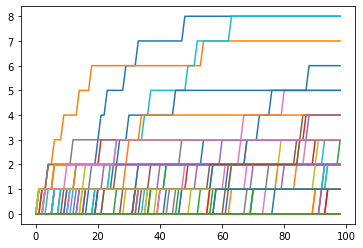

In [25]:
curve_list = list()
for idx in range(243):
    tranks = prediction_ranks[:,idx][test.astype(bool)[:,idx]]
    curve = [(tranks<i).sum() for i in range(1,100)]
    curve_list.append(curve)
    
    plt.plot(curve)
    
curve_list=np.array(curve_list)

In [48]:
percents = list()

results=list()
for j in range(99):
    results=list()
    for i in curve_list:
        results.append(i[j])
    percents.append( (np.array(results)>0).sum() / len(results))
    
#_ = plt.hist(results, bins=8, normed=True)

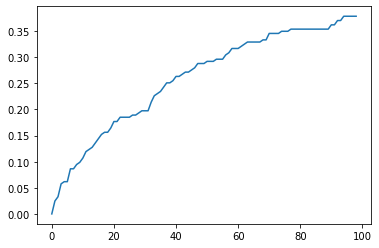

In [49]:
plt.plot(percents)

In [38]:
(np.array(results)>0).sum() / len(results)

0.26337448559670784

In [9]:
%%time
train, test = utils.load_time_split()
name = 'hpo_implicit_bpr'
params = utils.read_params(name)
preds_imp = utils.train_implicit_bpr(params, train)
#ranks = utils.evaluate_predictions(preds, test, train)
#mean, median, kde, ecdf = score_ranks(ranks)
#print(mean, median)
for _ in tqdm_notebook(range(1)):
    preds_imp+=utils.train_implicit_bpr(params, train)
    #ranks = utils.evaluate_predictions(preds, test, train)
    #mean, median, kde, ecdf = score_ranks(ranks)
    #print(mean, median)


CPU times: user 5.17 s, sys: 355 ms, total: 5.53 s
Wall time: 5.32 s


In [12]:
ranks_imp = utils.evaluate_predictions(preds_imp, test, train)

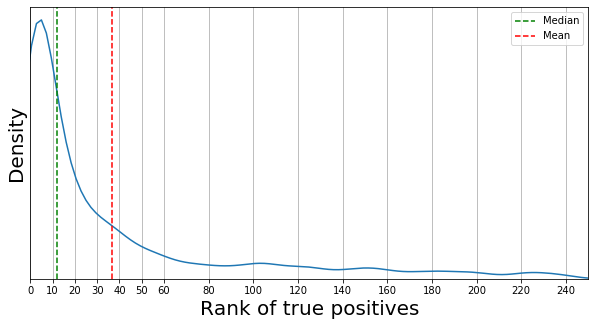

In [46]:
plt.figure(figsize=(10,5))
kdeplot(ranks_imp)
plt.xticks(np.concatenate([np.arange(0,51,10), np.arange(60,250,20)]))
plt.yticks([])
plt.xlim(0,250)
plt.grid()

plt.axvline(np.median(ranks_imp), label='Median', c='green',linestyle='--')
plt.axvline(np.mean(ranks_imp), label='Mean',c='red',linestyle='--')
plt.legend()
plt.ylabel('Density', fontsize=20)
plt.xlabel('Rank of true positives', fontsize=20)
plt.savefig('ranks_dist.png')

In [22]:
np.concatenate([np.arange(0,100,10), np.arange(100,250,20)])

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 120, 140,
       160, 180, 200, 220, 240])

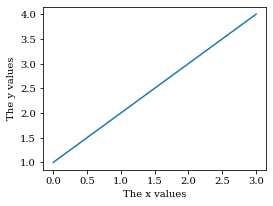

In [55]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
plt.plot([1, 2, 3, 4])
ax.set_xlabel('The x values')
ax.set_ylabel('The y values')
fig.savefig('test.png')

In [ ]:
plt.rc('font', family='serif')

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
plt.plot([1, 2, 3, 4])
ax.set_xlabel('The x values')
ax.set_ylabel('The y values')
fig.savefig('test.png')

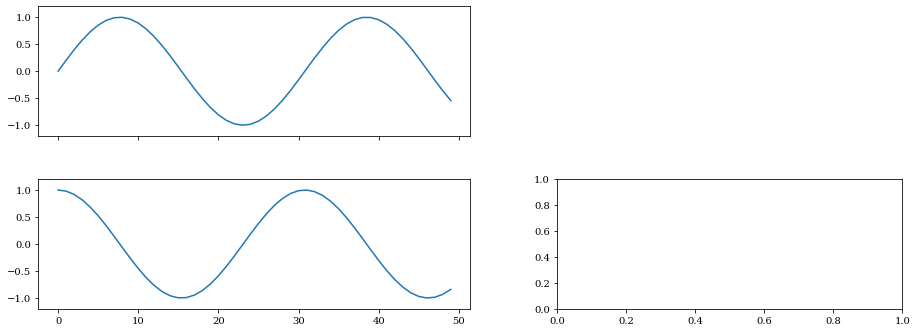

In [72]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0.0, 0.5, 0.5, 0.3],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.0, 0.1, 0.5, 0.3],
                   ylim=(-1.2, 1.2))

ax3 = fig.add_axes([0.6, 0.1, 0.4, 0.3])

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));


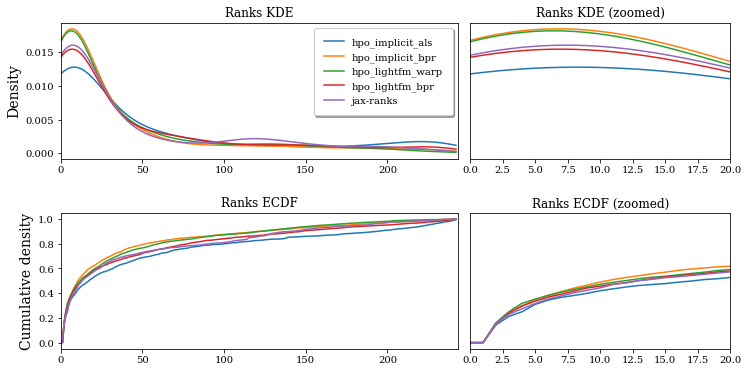

In [111]:
def calc_kde(ranks):
    #kde:
    density = gaussian_kde(ranks)
    xs = np.linspace(0,243,243)
    density.covariance_factor= lambda : 0.25
    density._compute_covariance()
    return density(xs)

def calc_ecdf(ranks):
    ecdf = [(ranks<i).sum()/len(ranks) for i in range(0, 243)]
    return ecdf

filenames = ['hpo_implicit_als', 'hpo_implicit_bpr',
             'hpo_lightfm_warp', 'hpo_lightfm_bpr', 'jax-ranks']

fig = plt.figure(figsize=(12,6))
grid = plt.GridSpec(2, 5, wspace=0.1, hspace=0.4)
ax1 = plt.subplot(grid[0, :3])
ax2 = plt.subplot(grid[0, 3:])
ax3 = plt.subplot(grid[1, :3])
ax4 = plt.subplot(grid[1, 3:]);
ax = [ax1, ax2, ax3, ax4]

for name in filenames:
    ranks = np.load(name+'.npy')
    kde = calc_kde(ranks)
    ecdf = calc_ecdf(ranks)
    ax1.plot(kde, label=name)
    ax2.plot(kde, label=name)
    ax3.plot(ecdf, label=name)
    ax4.plot(ecdf, label=name)

ax1.set_xlim(0,243)
ax1.set_title('Ranks KDE')
ax1.set_ylabel('Density', fontsize=14)

ax2.set_xlim(0,20)
ax2.set_title('Ranks KDE (top 20)')
ax2.set_yticks([])

ax3.set_xlim(0,243)
ax3.set_title('Ranks ECDF')
ax3.set_ylabel('Cumulative density', fontsize=14)

ax4.set_xlim(0,20)
ax4.set_title('Ranks ECDF (top 20)')
ax4.set_yticks([])
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

In [8]:
ranks_imp = utils.evaluate_predictions(preds_imp, test, train)

In [ ]:
#median corresponds to the minimum of the l1 norm! 
#https://statmodeling.stat.columbia.edu/2006/11/16/bayesian-inference-median/
l1norm=list()
for i in np.linspace(1,25,500):
    diffs = np.abs(i-ranks_imp)
    l1norm.append(np.sum(diffs))

In [ ]:
np.argmin(l1norm)

In [ ]:
np.linspace(1,25,500)[187]

In [ ]:
np.median(ranks_imp)

In [1]:
ranks

NameError: name 'ranks' is not defined

In [ ]:
plt.plot(np.linspace(1,25,500),l1norm)

In [5]:
ranks = np.load('jax-ranks.npy')

In [6]:
ranks

array([  4., 128.,  66., ...,   5.,   1.,   5.])

In [42]:
#Laplace distribution is related to l1 norm. 
#so we could use laplace as the likelihood for pymc3:

import pymc3 as pm

with pm.Model() as model:
    #prior:
    m = pm.Normal('m', mu=np.median(ranks), sigma=6.0)
    bee = pm.HalfNormal('bee', sigma=6.0)
    #likelihood:
    y = pm.Laplace('y', mu=m, b=bee,observed=ranks)
    #y = pm.Normal('y', mu=m, sigma=bee, observed=ranks)

In [43]:
with model:
    trace = pm.sample(draws=500, tune=500, chains=2, target_accept=0.9)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bee, m]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 733.99draws/s] 


In [49]:
from scipy import stats

n = stats.norm(0, 6)

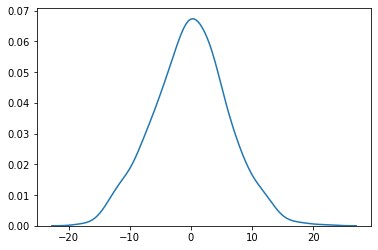

In [50]:
kdeplot(n.rvs(1000))

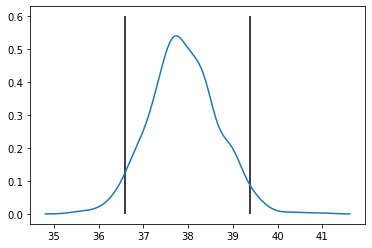

In [52]:
kdeplot(trace['bee'])
plt.vlines(pm.stats.hpd(trace['bee']),0,0.6)
#plt.axvline(np.median(ranks))

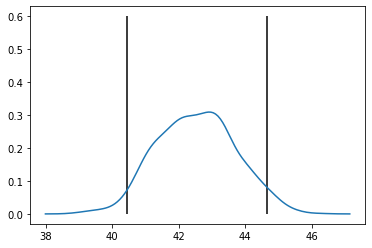

In [39]:
kdeplot(trace['m'])
plt.vlines(pm.stats.hpd(trace['m']),0,0.6)

In [24]:
def calc_hpd(ranks, statistic=np.mean):
    with pm.Model() as model:
        a = pm.Normal('a', mu=statistic(ranks), sigma=10.0)
        #'nuisance' parameter:
        b = pm.HalfNormal('b', sigma=10.0)
        #likelihood:
        if statistic==np.mean:
            y = pm.Normal('y', mu=a, sigma=b, observed=ranks)
        elif statistic==np.median:
            y = pm.Laplace('y', mu=a, b=b,observed=ranks)

        trace = pm.sample(draws=500, tune=500, chains=2, target_accept=0.9)

    return statistic(ranks), pm.stats.hpd(trace['a'])

In [36]:
bah, pah = calc_hpd(ranks, np.median)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 976.89draws/s] 


In [37]:
pah.reshape(-1,1)

array([[11.10685041],
       [13.92148214]])

<BarContainer object of 1 artists>

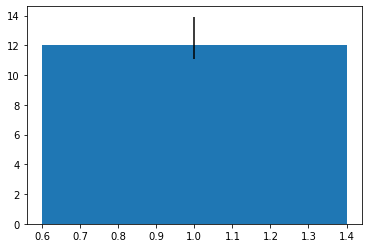

In [38]:
plt.bar(1, bah, yerr=[[bah-pah[0]], [pah[1]-bah]])

In [17]:
pm.stats.hpd(trace['m'])

array([40.72789503, 44.87369666])

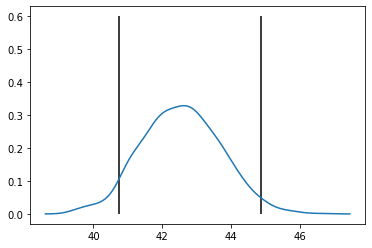

In [18]:
kdeplot(trace['m'])
plt.vlines(pm.stats.hpd(trace['m']),0,0.6)

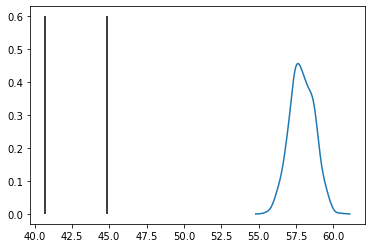

In [19]:
kdeplot(trace['bee'])
plt.vlines(pm.stats.hpd(trace['m']),0,0.6)

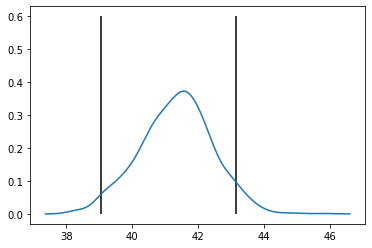

In [12]:
kdeplot(trace['m'])
plt.vlines(pm.stats.hpd(trace['m']),0,0.6)

In [ ]:
pm.plots.plot_posterior(trace, var_names=['m'])
plt.savefig('hi')

In [ ]:
kdeplot(trace['bee'])
plt.vlines(pm.stats.hpd(trace['bee']),0,0.6)

In [ ]:
from scipy import stats
plt.plot(np.linspace(-20,40,100), [stats.laplace(10.5,31).pdf(i) for i in np.linspace(-20,40,100)])


In [ ]:
pm.stats.hpd(trace['m'])

In [ ]:
pm.traceplot(trace, var_names=['m'])

In [ ]:
trace['m']

In [ ]:
import scikits.bootstrap as boot
#import numpy as np
boot.ci(ranks, np.median, n_samples=100)


In [ ]:
len(ranks)

In [ ]:
medians = list()
for _ in range(1000):
    beep = np.random.choice(ranks, 500)
    medians.append(np.median(beep))

In [ ]:
sorted(medians)[25]

In [ ]:
sorted(medians)[975]

In [ ]:
plt.hist(medians,bins=250)
#kdeplot(medians)
plt.axvline(8, c='k')
plt.axvline(13, c='k')

In [ ]:
%%time
train, test = utils.load_time_split()
name = 'hpo_lightfm_warp'
params = utils.read_params(name)
preds_lfm = utils.train_lightfm_warp(params, train)
#ranks = utils.evaluate_predictions(preds, test, train)
#mean, median, kde, ecdf = score_ranks(ranks)
#print(mean, median)
for _ in tqdm_notebook(range(8)):
    preds_lfm+=utils.train_lightfm_warp(params, train)
    #ranks = utils.evaluate_predictions(preds, test, train)
    #mean, median, kde, ecdf = score_ranks(ranks)
    #print(mean, median)


In [ ]:
ranks_lfm = utils.evaluate_predictions(preds_lfm, test, train)

In [ ]:
np.vstack([ranks_lfm, ranks_imp]).T

In [ ]:
ranks_lfm

In [ ]:
import pandas as pd
bah = pd.DataFrame(data=np.vstack([ranks_lfm, ranks_imp]).T, columns=['lfm','bpr'])
bah.to_csv('lfm_vs_bpr.csv',index=False)

In [ ]:
%%time
train, test = utils.load_time_split()
name = 'hpo_lightfm_bpr'
params = utils.read_params(name)
preds_lfm_bpr = utils.train_lightfm_bpr(params, train)
for _ in tqdm_notebook(range(8)):
    preds_lfm_bpr+=utils.train_lightfm_warp(params, train)

In [ ]:
%%time
train, test = utils.load_time_split()
name = 'hpo_implicit_als'
params = utils.read_params(name)
preds_imp_als = utils.train_implicit_als(params, train)
for _ in tqdm_notebook(range(8)):
    preds_imp_als+=utils.train_implicit_als(params, train)

In [ ]:
ranks_lfm = utils.evaluate_predictions(preds_lfm, test, train)
ranks_imp = utils.evaluate_predictions(preds_imp, test, train)
mean_lfm,median_lfm,kde_lfm,ecdf_lfm = score_ranks(ranks_lfm)
mean_imp,median_imp,kde_imp,ecdf_imp = score_ranks(ranks_imp)

In [ ]:
ranks_lfm_bpr = utils.evaluate_predictions(preds_lfm_bpr, test, train)
ranks_imp_als = utils.evaluate_predictions(preds_imp_als, test, train)

mean_lfm_bpr,median_lfm_bpr,kde_lfm_bpr,ecdf_lfm_bpr = score_ranks(ranks_lfm_bpr)
mean_imp_als,median_imp_als,kde_imp_als,ecdf_imp_als = score_ranks(ranks_imp_als)

In [ ]:
ranks_geo = (ranks_lfm*ranks_imp*ranks_lfm_bpr)**(1/3)
ranks_geo = (ranks_lfm*ranks_imp)**(1/2)
ranks_geo = (ranks_lfm*ranks_lfm_bpr)**(1/2)
mean_geo,median_geo,kde_geo,ecdf_geo = score_ranks(ranks_geo)

In [ ]:
print(mean_geo, median_geo)

In [ ]:
median_imp_als

In [ ]:
print(mean_geo, median_geo)

In [ ]:
plt.plot(kde_lfm, label='lfm_warp')
plt.plot(kde_lfm_bpr, label='lfm_bpr')
plt.plot(kde_imp, label='imp_bpr')
plt.plot(kde_imp_als, label='imp_als')
plt.plot(kde_geo, label='geo')

plt.legend()
plt.xlim(0,20)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(ecdf_lfm, label='lfm_warp')
plt.plot(ecdf_lfm_bpr, label='lfm_bpr')
plt.plot(ecdf_imp, label='imp_bpr')
plt.plot(ecdf_imp_als, label='imp_als')
plt.plot(ecdf_geo, label='geo')

plt.legend()
plt.xlim(0,20)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(ecdf_lfm, label='lfm')
plt.plot(ecdf_imp, label='imp')
plt.plot(ecdf_geo, label='geo')
plt.legend()
plt.xlim(0,20)

In [ ]:
ranks_lfm

In [ ]:
ranks_imp

In [ ]:
print(mean, median)
plt.plot(kde)

In [ ]:
def score_ranks(ranks):
    
    #normal statistics:
    mean = np.mean(ranks)
    median = np.median(ranks)

    #kde:
    density = gaussian_kde(ranks)
    xs = np.linspace(0,243,243)
    density.covariance_factor= lambda : 0.25
    density._compute_covariance()

    #empirical cumulative distribution function:
    ecdf = [(ranks<i).sum()/len(ranks) for i in range(0, 243)]

    return mean, median, density(xs), ecdf

In [ ]:
year = 2010

#turn interaction dates into a masker
dates_mask = (interaction_dates.data<=year).astype(int)

#make copies that will become train / test matrices
train = copy.copy(interaction_matrix)
test = copy.copy(interaction_matrix)

#remove 2015 and later records from train matrix
train.data = train.data * dates_mask
#remove all training data from the test matrix. 
test.data = test.data - train.data

#remove any rows from the train matrix that have zero interactions.
#this is the case any time a new ligand is discovered in 2015 or after. 
#we can't use link prediction on new ligands! It's a cold start problem. 
#so we remove all these ligands from the present analysis. 
row_mask = np.array((train.sum(axis=1)!=0)).reshape(1,-1)[0] #there must be a cleaner way to do that.
train = train[row_mask] 
test = test[row_mask]

train.eliminate_zeros()
test.eliminate_zeros()

In [ ]:
name = 'hpo_implicit_bpr'
parameter_flag=False
params = dict()
for line in open('../hyperparameter_optimization/'+name+'.dat', 'r').readlines():
    if 'Result' in line:
        parameter_flag=False
    if parameter_flag:
        words = line.split()
        params[words[0]]=float(words[1])
        print(line.split())
    if 'Best parameters' in line:
        parameter_flag=True

In [ ]:
params

In [ ]:
utils.train_implicit_bpr(train)

In [ ]:
def score_ranks(ranks):
    
    #normal statistics:
    mean = np.mean(ranks)
    median = np.median(ranks)

    #kde:
    density = gaussian_kde(ranks)
    xs = np.linspace(0,243,243)
    density.covariance_factor= lambda : 0.25
    density._compute_covariance()

    #empirical cumulative distribution function:
    ecdf = [(ranks<i).sum()/len(ranks) for i in range(0, 243)]

    return mean, median, density(xs), ecdf

In [ ]:
mean, med, kde, ecdf = plot_ranks(ranks)

In [ ]:
from matplotlib.gridspec import GridSpec
fig, ax = plt.subplots(2,2)
gs = GridSpec(2, 2, width_ratios=[[6,2],[6,2]])
for i in range(4):
    ax[i][j].set_position(gs[i].get_position(fig))


In [ ]:
gs[4]

In [ ]:
#plt.plot(ecdf)
plt.plot(kde)

In [ ]:
def find_opt_pars(filename):
    f = open('../hyperparmeter_optimization/'+filename, 'r')
    record=False
    for line in f:
        if 'Paramaters:' in line:
            return [float(i) for i in line.strip('\n').replace('[', '').replace(']', '').replace(',', '').split()[1:]]


In [ ]:
pars = find_opt_pars('hpo_implicit_bpr.dat')
pars

In [ ]:
def train_implicit_bpr(pars, inp):
    model = implicit.bpr.BayesianPersonalizedRanking(factors=int(pars[0]),
                                                 learning_rate=pars[1],
                                                 regularization=pars[2],
                                                 iterations=int(pars[3]),
                                                 use_gpu=False)
    model.fit(sparse.csr_matrix(inp), show_progress=False)
    return np.dot(model.item_factors, model.user_factors.T)


pars = find_opt_pars('hpo_implicit_bpr.dat')
implicit_bpr_preds = train_implicit_bpr(pars, train)
for _ in range(7):
    implicit_bpr_preds += train_implicit_bpr(pars, train)
implicit_bpr_ranks = utils.evaluate_predictions(implicit_bpr_preds, test)

In [ ]:
def train_implicit_als(pars, inp):
    model = implicit.als.AlternatingLeastSquares(factors=params['factors'],
                                                 regularization=params['regularization'],
                                                 iterations=params['iterations'],
                                                 num_threads=1,
                                                 use_gpu=False)
    model.fit(train)
    return np.dot(model.item_factors, model.user_factors.T)
        #evaluate by calculating mean rank:
        results.append(utils.evaluate_predictions(pred_matrix, test).mean())

    return np.mean(results)

In [ ]:
import implicit
means = list()
medians = list()
kdes = list()

model = implicit.bpr.BayesianPersonalizedRanking(factors=337,
                                                learning_rate=0.06276,
                                                regularization=0.001147,
                                                iterations=25,
                                                use_gpu=False)
model.fit(train)

imbpr_preds = np.dot(model.item_factors, model.user_factors.T)
ranks = utils.evaluate_predictions(imbpr_preds, test)
m, med, kde = plot_ranks(ranks)
means.append(m)
medians.append(med)
kdes.append(kde)

for _ in range(5):
    model = implicit.bpr.BayesianPersonalizedRanking(factors=337,
                                                learning_rate=0.06276,
                                                regularization=0.001147,
                                                iterations=25,
                                                use_gpu=False)
    model.fit(train)

    imbpr_preds += np.dot(model.item_factors, model.user_factors.T)
    ranks = utils.evaluate_predictions(imbpr_preds, test)
    m, med, kde = plot_ranks(ranks)
    means.append(m)
    medians.append(med)
    kdes.append(kde)

In [ ]:
for _ in range(10):
    model = implicit.bpr.BayesianPersonalizedRanking(factors=337,
                                                learning_rate=0.06276,
                                                regularization=0.001147,
                                                iterations=25,
                                                use_gpu=False)
    model.fit(train)

    imbpr_preds += np.dot(model.item_factors, model.user_factors.T)
    ranks = utils.evaluate_predictions(imbpr_preds, test)
    m, med, kde = plot_ranks(ranks)
    means.append(m)
    medians.append(med)
    kdes.append(kde)

In [ ]:
for k in kdes:
    plt.plot(k)

In [ ]:
plt.plot(means)

In [ ]:
plt.plot(np.arange(len(medians)),medians)

In [ ]:
import lightfm
means2 =list()
medians2=list()
kdes2=list()

##LightFM:                                                                                                                                                                     
#lightfm 'user id' (chemical id)                                                                                                                                               
cid = np.arange(train.shape[0])
#lightfm 'item id' (target id)                                                                                                                                                 
tid = np.arange(train.shape[1])
model = lightfm.LightFM(no_components = 127,
                           loss='warp',
                           max_sampled=9,
                           learning_rate=0.056129688436596194)
model.fit(sparse.csr_matrix(train), epochs=6)
lfm_prediction_matrix = model.predict(np.repeat(cid, len(tid)), np.tile(tid, len(cid)))
lfm_prediction_matrix = np.reshape(lfm_prediction_matrix, (len(cid), len(tid)))

ranks = utils.evaluate_predictions(lfm_prediction_matrix, test)
m, med, kde = plot_ranks(ranks)
means2.append(m)
medians2.append(med)
kdes2.append(kde)

for _ in range(10):
    print(_)
    model = lightfm.LightFM(no_components = 127,
                           loss='warp',
                           max_sampled=9,
                           learning_rate=0.056129688436596194)
    model.fit(sparse.csr_matrix(train), epochs=6)

    temp = model.predict(np.repeat(cid, len(tid)), np.tile(tid, len(cid)))
    lfm_prediction_matrix+=np.reshape(temp, (len(cid), len(tid)))
    
    ranks = utils.evaluate_predictions(lfm_prediction_matrix, test)
    m, med, kde = plot_ranks(ranks)
    means2.append(m)
    medians2.append(med)
    kdes2.append(kde)





In [ ]:
plt.plot(means2)

In [ ]:
plt.plot(medians2)

In [ ]:
for i in kdes2:
    plt.plot(i)

In [ ]:
ranks1 = utils.evaluate_predictions(imbpr_preds, test)
ranks2 = utils.evaluate_predictions(lfm_prediction_matrix, test)

In [ ]:
plt.scatter(ranks1, ranks2, alpha=0.2)

In [ ]:
from scipy.stats.mstats import rankdata
one = rankdata(-imbpr_preds[:,0])
two = rankdata(-lfm_prediction_matrix[:,0])

In [ ]:
one

In [ ]:
plt.scatter(one, two, alpha=0.005)

In [ ]:
indices = np.argsort(one)

plt.scatter(three[indices][:10000], one[indices][:10000], alpha=0.1)

In [ ]:
import statsmodels.api as sm
model = sm.OLS(one[indices][:10000], two[indices][:10000])
results = model.fit()f
print(results.summary())

In [ ]:
kdeplot(one,two)

# Predict label scores using label correlation

In [ ]:
##This version uses sparse matrices, which keeps everything low
##memory. But it's a bit slower because getting/setting sparse objects is in general
##slower than numpy. 
def makeCorrelations(y_in):
    assert isinstance(y_in, sparse.csr_matrix)
    tot_instances = np.array(y_in.sum(axis=0))[0]
    L = sparse.lil_matrix((y_in.shape[1], y_in.shape[1]))

    for idx in tqdm_notebook(range(y_in.shape[0]), smoothing=0.1):
        row = y_in[idx]
        if row.sum()>1:
            for j,k in itertools.permutations(row.nonzero()[1], 2):
                L[j,k] += (1)/(tot_instances[k])             
    return L

##This calculates predicted probabilities for labels (1's in the train matrix are preserved as 1's)
def makePredictions(y_in, L):
    L1 = 1-L.toarray() #working with dense array is much easier for this. 
                    #but because it's only numLabels x numLabels it's not that big.
    y_new = y_in.toarray().astype('float32') #working with a dense array again
                                             #for ease of row-wise, elementwise addition 
    for count, row in tqdm_notebook(enumerate(y_in), total=y_in.shape[0], smoothing=0.1):
        posLines = row.nonzero()[1]
        corrs = L1[:,posLines]
        probs = 1-np.prod(corrs, axis=1)
        y_new[count]+=probs #elementwise addition here. 
        y_new[count] = np.clip(y_new[count], 0, 1)
    return sparse.csr_matrix(y_new)

In [ ]:
L = makeCorrelations(train)
lc_preds = makePredictions(train, L)

In [ ]:
three = rankdata(-lc_preds.toarray()[:,0])

In [ ]:
plt.scatter(one, three, alpha=0.005)

In [ ]:
plt.scatter(two, three, alpha=0.005)

In [ ]:
bap = [1,2]
stdevs =list()
stdevs.append(np.std(bap))
for _ in range(100):
    bap.append(2)
    stdevs.append(np.std(bap))

In [ ]:
plt.plot(stdevs)

In [ ]:
def bapbap(predictions, test):
    #if isinstance(test, sparse.csr_matrix):
    #    test = test.toarray()

    #This will mask all ROWS that contain no test ligands. No point ranking
    #a row if you're aren't going to evaluate the ranks!
    #(and it works on sparse or np.array)
    row_mask = np.array(test.sum(axis=1)>0).reshape(-1,)
    test_masked = test[row_mask]
    get_ranks = test_masked.astype(bool)
    prediction_ranks = rankdata(-predictions[row_mask], axis=1)

In [ ]:
def get_ranks_masked():
    predictions = copy.copy(lc_preds)
    if isinstance(predictions, sparse.csr_matrix):
        predictions = predictions.toarray()
        
    row_mask = np.array(test.sum(axis=1)>0).reshape(-1,)
    test_masked = test[row_mask]
    get_ranks = test_masked.astype(bool)
    predictions2 = np.ma.masked_array(predictions[row_mask], mask=train.toarray()[row_mask].astype(bool))    
    prediction_ranks = rankdata(-predictions2, axis=1)
    return prediction_ranks[get_ranks.toarray()]


In [ ]:
def get_ranks_unmasked():
    predictions = copy.copy(lc_preds)
    if isinstance(predictions, sparse.csr_matrix):
        predictions = predictions.toarray()
        
    row_mask = np.array(test.sum(axis=1)>0).reshape(-1,)
    test_masked = test[row_mask]
    get_ranks = test_masked.astype(bool)
    #predictions2 = np.ma.masked_array(predictions[row_mask], mask=train.toarray()[row_mask].astype(bool))    
    prediction_ranks = rankdata(-predictions[row_mask], axis=1)
    return prediction_ranks[get_ranks.toarray()]

In [ ]:
r_masked = get_ranks_masked()
r_unmasked = get_ranks_unmasked()

In [ ]:
kdeplot(r_masked)
kdeplot(r_unmasked)

In [ ]:
r_masked

In [ ]:
r_unmasked

In [ ]:
predictions = copy.copy(lc_preds)



if isinstance(predictions, sparse.csr_matrix):
	predictions = predictions.toarray()

#predictions = np.ma.masked_array(predictions, mask=train.toarray()[row_mask].astype(bool))    
    
from scipy.stats.mstats import rankdata
row_mask = np.array(test.sum(axis=1)>0).reshape(-1,)

test_masked = test[row_mask]
get_ranks = test_masked.astype(bool)

predictions2 = np.ma.masked_array(predictions[row_mask], mask=train.toarray()[row_mask].astype(bool))    
prediction_ranks = rankdata(-predictions2, axis=1)

In [ ]:
kdeplot(prediction_ranks[get_ranks.toarray()])

In [ ]:
get_ranks.toarray()

# Predict label scores using implicit BPR:

In [ ]:
import implicit
model = implicit.bpr.BayesianPersonalizedRanking(factors=337,
                                                learning_rate=0.06276,
                                                regularization=0.001147,
                                                iterations=25,
                                                use_gpu=False)
model.fit(train)

imbpr_preds = np.dot(model.item_factors, model.user_factors.T)

In [ ]:
def return_mean_rank(preds, test):
    t = test.toarray().astype(bool)
    #order from highest to lowest:
    order = (-preds).argsort(axis=1)
    #get ranks of each ligand.
    ranks = order.argsort(axis=1)
    return ranks[t]

In [ ]:
lc_ranks = return_mean_rank(lc_preds.toarray(), test)

In [ ]:
imbpr_ranks = return_mean_rank(imbpr_preds, test)

In [ ]:
plt.figure(figsize=(15,8))
kdeplot(lc_ranks, label='Label correlation', cumulative=True)
kdeplot(imbpr_ranks, label='ImplicitBPR', cumulative=True)
plt.yscale('log')

In [104]:
from statsmodels.distributions import ECDF
ecdf = ECDF(lc_ranks)

NameError: name 'lc_ranks' is not defined

In [ ]:
lc_ranks

In [ ]:
plt.figure(figsize=(15,6))
ecdf = ECDF(lc_ranks)
plt.plot(ecdf.x, ecdf.y, label='Label correlation')
ecdf = ECDF(imbpr_ranks)
plt.plot(ecdf.x, ecdf.y, label='ImplicitBPR')

In [ ]:
plt.figure(figsize=(15,8))
#bal = [(test_ranks<i).sum()/len(test_ranks) for i in range(0, 20)]
plt.plot([(lc_ranks<i).sum()/len(lc_ranks) for i in range(0, 256)])
plt.plot([(imbpr_ranks<i).sum()/len(imbpr_ranks) for i in range(0, 256)])
plt.grid()

In [ ]:
sum([(imbpr_ranks<i).sum()/len(imbpr_ranks) for i in range(0, 256)])

In [ ]:
sum([(lc_ranks<i).sum()/len(imbpr_ranks) for i in range(0, 256)])

In [ ]:
print(np.median(pa))
print(np.median(wa))

In [ ]:
#order from highest to lowest:
order2 = (-pred_matrix2).argsort(axis=1)
#get ranks of each ligand.
ranks2 = order2.argsort(axis=1)

In [ ]:
#order from highest to lowest:
order2 = (-pred_matrix2).argsort(axis=1)
#get ranks of each ligand.
ranks2 = order2.argsort(axis=1)

In [ ]:
order

In [ ]:
order2.T

In [ ]:
kdeplot(ranks2[test.T])

In [ ]:
from lightfm import LightFM, datasets
data = datasets.fetch_movielens()


In [ ]:
data['train']

In [ ]:
ranks2[test.T]

In [ ]:
kdeplot(ranks[test])

In [ ]:
##new version, reporting the average rank of test ligands.
#order from highest to lowest:
order = (-prediction_matrix).argsort()
#get ranks of each ligand. 
ranks = order.argsort()
    
#calc rank fo each ligand
#test2 = np.array(test.todense())
test_ranks = ranks[row_mask][np.array(test[row_mask], dtype=bool)]

plt.plot(test_ranks, linewidth=0.1)

In [ ]:
ranks = [(test_ranks<i).sum()/len(test_ranks) for i in range(0, 20)]
plt.plot(ranks)
plt.grid()

In [ ]:
test.toarray().astype(bool)

In [ ]:
fig, ax = plt.subplots()

In [ ]:
import lightfm
##LightFM:                                                                                                                                                                     
#lightfm 'user id' (chemical id)                                                                                                                                               
cid = np.arange(train.shape[0])
#lightfm 'item id' (target id)                                                                                                                                                 
tid = np.arange(train.shape[1])
model = lightfm.LightFM(no_components = 127,
                           loss='warp',
                           max_sampled=9,
                           learning_rate=0.056129688436596194)
model.fit(sparse.csr_matrix(train), epochs=6)
lfm_prediction_matrix = model.predict(np.repeat(cid, len(tid)), np.tile(tid, len(cid)))
lfm_prediction_matrix = np.reshape(lfm_prediction_matrix, (len(cid), len(tid)))


In [ ]:
order_lc = (-lc_prediction_matrix).argsort()
#get ranks of each ligand. 
ranks_lc = order_lc.argsort()

order_im = (-im_prediction_matrix).argsort()
#get ranks of each ligand. 
ranks_im = order_im.argsort()

order_lfm = (-lfm_prediction_matrix).argsort()
#get ranks of each ligand. 
ranks_lfm = order_lfm.argsort()

In [ ]:
inverse_ranks_lc = 1/(order_lc.argsort()+1)
inverse_ranks_im = 1/(order_im.argsort()+1)
inverse_ranks_lfm = 1/(order_lfm.argsort()+1)

In [ ]:
inverse_combined = inverse_ranks_lc+inverse_ranks_im+inverse_ranks_lfm

In [ ]:
order_com = (-inverse_combined).argsort()
#get ranks of each ligand. 
ranks_com = order_com.argsort()
print(np.mean(ranks_com[np.array(test, dtype=bool)]))

In [ ]:
avg_ranks = (ranks_lc+ranks_im)/2

In [ ]:
print(np.mean(ranks_lc[np.array(test, dtype=bool)]))

print(np.mean(ranks_im[np.array(test, dtype=bool)]))

print(np.mean(avg_ranks[np.array(test, dtype=bool)]))

In [ ]:
##new version, reporting the average rank of test ligands.
#order from highest to lowest:
order = (-prediction_matrix).argsort()
#get ranks of each ligand. 
ranks = order.argsort()
    
#calc rank fo each ligand
#test2 = np.array(test.todense())
test_ranks = ranks[row_mask][np.array(test[row_mask], dtype=bool)]

plt.plot(test_ranks, linewidth=0.1)

In [ ]:
print(np.mean(test_ranks))
print(np.median(test_ranks))

plt.figure(figsize=(10,3))
density = gaussian_kde(test_ranks)
xs = np.linspace(0,243, 300)
density.covariance_factor = lambda : 0.25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.axhline(0, c='k')
#plt.xlim(-0.5,150)
plt.scatter(test_ranks, np.zeros(len(test_ranks))+np.random.uniform(-0.02,0.0, len(test_ranks)), alpha=0.05)

In [ ]:
ranks = [(test_ranks<i).sum()/len(test_ranks) for i in range(0, 20)]
plt.plot(ranks)
plt.grid()

In [ ]:
ranks

In [ ]:
###load data:
#train, test = utils.load_time_split()

filenames = ['hpo_implicit_als.dat', 'hpo_implicit_bpr.dat',
             'hpo_lightfm_warp.dat', 'hpo_lightfm_bpr.dat']
def find_opt_pars(filename):
    f = open('../hyperparmeter_optimization/'+filename, 'r')
    record=False
    for line in f:
        if 'Paramaters:' in line:
            return [float(i) for i in line.strip('\n').replace('[', '').replace(']', '').replace(',', '').split()[1:]]




def train_implicit_als(pars):
    model = implicit.als.AlternatingLeastSquares(factors=int(pars[0]),
                                                     regularization=pars[1],
                                                     iterations=int(pars[2]),
                                                     num_threads=1,
                                                     use_gpu=False)
    model.fit(sparse.csr_matrix(train))
    prediction_matrix=np.dot(model.item_factors, model.user_factors.T)
    test_ranks = utils.evaluate_predictions(prediction_matrix, sparse.csr_matrix(test),avg=False)
    return np.mean(test_ranks), np.median(test_ranks)

def train_implicit_bpr(pars):
    model = implicit.bpr.BayesianPersonalizedRanking(factors=int(pars[0]),
                                                 learning_rate=pars[1],
                                                 regularization=pars[2],
                                                 iterations=int(pars[3]),
                                                 use_gpu=False)

    model.fit(sparse.csr_matrix(train))
    prediction_matrix=np.dot(model.item_factors, model.user_factors.T)
    #test_ranks = utils.evaluate_predictions(prediction_matrix, sparse.csr_matrix(test),avg=False)
    return np.mean(test_ranks), np.median(test_ranks)



##LightFM:
#lightfm 'user id' (chemical id)
cid = np.arange(train.shape[0])
#lightfm 'item id' (target id)
tid = np.arange(train.shape[1])



def train_lightfm_warp(pars):
    model = lightfm.LightFM(no_components = int(pars[0]),
                           loss='warp',
                           max_sampled=int(pars[1]),
                           learning_rate=pars[2])
    model.fit(sparse.csr_matrix(train), epochs=int(pars[3]))
    prediction_matrix = model.predict(np.repeat(cid, len(tid)), np.tile(tid, len(cid)))
    prediction_matrix = np.reshape(prediction_matrix, (len(cid), len(tid)))
    test_ranks = utils.evaluate_predictions(prediction_matrix, sparse.csr_matrix(test),avg=False)
    return np.mean(test_ranks), np.median(test_ranks)

def train_lightfm_bpr(pars):
    model = lightfm.LightFM(no_components = int(pars[0]),
                           loss='bpr',
                           max_sampled=int(pars[1]),
                           learning_rate=pars[2])
    model.fit(sparse.csr_matrix(train), epochs=int(pars[3]))
    prediction_matrix = model.predict(np.repeat(cid, len(tid)), np.tile(tid, len(cid)))
    prediction_matrix = np.reshape(prediction_matrix, (len(cid), len(tid)))
    test_ranks = utils.evaluate_predictions(prediction_matrix, sparse.csr_matrix(test),avg=False)
    return np.mean(test_ranks), np.median(test_ranks)




In [ ]:
def train_implicit_bpr(pars):
    model = implicit.bpr.BayesianPersonalizedRanking(factors=int(pars[0]),
                                                 learning_rate=pars[1],
                                                 regularization=pars[2],
                                                 iterations=int(pars[3]),
                                                 use_gpu=False)

    model.fit(train)
    prediction_matrix=np.dot(model.item_factors, model.user_factors.T)
    #test_ranks = utils.evaluate_predictions(prediction_matrix, sparse.csr_matrix(test),avg=False)
    return prediction_matrix

def score_prediction_matrix(preds, test):
    t = test.toarray().astype(bool)
    #order from highest to lowest:
    order = (-preds).argsort(axis=1)
    #get ranks of each ligand.
    ranks = order.argsort(axis=1)
    return ranks[t]

#bpr:
pars = find_opt_pars(filenames[1])
preds = train_implicit_bpr(pars)
r = score_prediction_matrix(preds, test)

mean = np.mean(r)
print(mean)
median = np.median(r)
print(median)
#ecdf = [(r<i).sum()/len(r) for i in range(0, 243)]

for _ in range(16):
    preds += train_implicit_bpr(pars)
    r = score_prediction_matrix(preds, test)
    mean = np.mean(r)
    print(mean)
    median = np.median(r)
    print(median)


#    outfile.write(filenames[1]+': '+str(mean)+' '+str(median)+'\n')


In [ ]:
preds
t = test.toarray().astype(bool)

In [ ]:
#order from highest to lowest:
order = (-lc_preds.toarray()).argsort(axis=1)
#get ranks of each ligand.
ranks = order.argsort(axis=1)

In [ ]:
for j,k in zip(*test.toarray().nonzero()):
    value = lc_preds[j,k]
    if value==0:
        one = (-lc_preds.toarray()[j]).argsort()
        two = one.argsort()
        print('Found a zero, is is rank:',two[k])
    print(j,k, value)

In [ ]:
a = np.array([[4,2,7,2,1],[1,2,3,4,5]])
rank = a.argsort(axis=1).argsort(axis=1)

unique, inverse = np.unique(a, return_inverse = True, axis=0)

unique_rank_sum = np.zeros_like(unique)
np.add.at(unique_rank_sum, inverse, rank)
unique_count = np.zeros_like(unique)
np.add.at(unique_count, inverse, 1)

unique_rank_mean = unique_rank_sum.astype(np.float) / unique_count

rank_mean = unique_rank_mean[inverse]

rank_mean

In [ ]:
unique, inverse = np.unique(a, return_inverse = True, axis=1)
unique

In [ ]:
unique_rank_sum = np.zeros_like(unique)
np.add.at(unique_rank_sum, inverse, rank)
unique_rank_sum

In [ ]:
print(-lc_preds.toarray()[0][227])
one = (-lc_preds.toarray()[0]).argsort()
two = one.argsort()



In [ ]:
two[(-lc_preds.toarray()[0]==0)]

In [ ]:
plt.scatter((-lc_preds.toarray()[0]).argsort(), (-lc_preds.toarray()[0]))

In [ ]:
from scipy.stats import rankdata

plt.scatter(rankdata(-lc_preds.toarray()[0]), (-lc_preds.toarray()[0]))

In [ ]:
from scipy.stats.mstats import rankdata
rankdata(-lc_preds.toarray()[:13000], axis=1)

In [ ]:
rm = np.array(test.sum(axis=1)>0).reshape(-1,)

In [ ]:
test

In [ ]:
%%timeit
rm_ranked = rankdata(-lc_preds.toarray()[rm], axis=1)

In [ ]:
trm = test.toarray()[rm].astype(bool)

In [ ]:
test.toarray()[rm]

In [ ]:
trm

In [ ]:
rm_ranked

In [ ]:
def bapbap(predictions, test):
    
    row_mask = np.array(test.sum(axis=1)>0).reshape(-1,)
    test_masked = test[row_mask]
    get_ranks = test_masked.toarray().astype(bool) #this will select using boolean all test ranks.

    #rankdata approach, which correctly handles ties:
    prediction_ranks = rankdata(-predictions[row_mask], axis=1)

    #all ranks:
    prediction_ranks[get_ranks]
    return prediction_ranks

In [ ]:
row_mask = np.array(test.sum(axis=1)>0).reshape(-1,)
row_mask

In [ ]:
test_masked = test[row_mask]
test_masked

In [ ]:
get_ranks = test_masked.toarray().astype(bool)
get_ranks

In [ ]:
-lc_preds[row_mask].toarray()

In [ ]:
prediction_ranks = rankdata(-lc_preds[row_mask].toarray(), axis=1)

In [ ]:
lc_preds

In [ ]:
all_test_ranks = prediction_ranks[get_ranks]

In [ ]:
kdeplot(all_test_ranks)

In [ ]:
test.shape

In [ ]:
np.median(rm_ranked[trm])

In [ ]:
trm

In [ ]:
rankdata(-lc_preds.toarray()[0])[lc_preds.toarray()[0]==0]

In [ ]:
from scipy.stats.mstats import rankdata
plt.scatter(rankdata(-lc_preds.toarray()[0]), (-lc_preds.toarray()[0]), alpha=0.1)

In [ ]:
for j,k in zip(ranks, t):
    if sum(k)!=0:
        v = np.mean(j[k])
        print(v)

In [ ]:
k

In [ ]:
preds[0][t[0]]

In [ ]:
r = score_prediction_matrix(preds, test)
pr = score_prediction_matrix(lc_preds.toarray(), test)

In [ ]:
pr = rm_ranked[trm]

In [ ]:
pr

In [ ]:
plt.figure(figsize=(15,8))
mean = np.mean(r)
print(mean)
median = np.median(r)
print(median)
ecdf = [(r<i).sum()/len(r) for i in range(0, 243)]
plt.plot(ecdf, label='ImplicitBPR')



pr = score_prediction_matrix(lc_preds.toarray(), test)
mean = np.mean(pr)
print(mean)
median = np.median(pr)
print(median)
ecdf = [(pr<i).sum()/len(pr) for i in range(0, 243)]
plt.plot(ecdf, label='LabelCorr')


pr = rm_ranked[trm]
mean = np.mean(pr)
print(mean)
median = np.median(pr)
print(median)
ecdf = [(pr<i).sum()/len(pr) for i in range(0, 243)]
plt.plot(ecdf, label='LabelCorr.Avg')

plt.legend()
##plt.ylim(0,20)
plt.xlim(0,20)

In [ ]:
mean = np.mean(lc_ranks)
print(mean)
median = np.median(lc_ranks)
print(median)
ecdf = [(lc_ranks<i).sum()/len(lc_ranks) for i in range(0, 243)]


In [ ]:
plt.plot(ecdf)

In [ ]:
#kdeplot(lc_ranks)
kdeplot(r)


In [ ]:
#outfile = open('results.dat', 'w')
#outfile.write('algorithm, mean, median\n')

##implicit:
#als:
pars = find_opt_pars(filenames[0])
for _ in range(3):
    mean, median = train_implicit_als(pars)
    #outfile.write(filenames[0]+': '+str(mean)+' '+str(median)+'\n')

#bpr:
pars = find_opt_pars(filenames[1])
for _ in range(3):
    mean, median = train_implicit_bpr(pars)
    outfile.write(filenames[1]+': '+str(mean)+' '+str(median)+'\n')

##lightfm
#warp
pars = find_opt_pars(filenames[2])
for _ in range(3):
    mean, median = train_lightfm_warp(pars)
    outfile.write(filenames[2]+': '+str(mean)+' '+str(median)+'\n')

#bpr
pars = find_opt_pars(filenames[3])
for _ in range(3):
    mean, median = train_lightfm_bpr(pars)
    outfile.write(filenames[3]+': '+str(mean)+' '+str(median)+'\n')

#label correlation:
L1 = 1- utils.makeCorrelations(train)
prediction_matrix = utils.makeProbabilities(train, L1)
test_ranks = utils.evaluate_predictions(prediction_matrix, sparse.csr_matrix(test), avg=False)
outfile.write('label correl: '+str(np.mean(test_ranks))+' '+str(np.median(test_ranks))+'\n')


outfile.close()